# Proyecto: Análisis Exploratorio de los Datos y preparación de un DataSet. 

## Nombre del estudiante:  Brenda Cortes Aguilar 
## Número de control: 20120097
## Materia/Grupo: Ciencia de datos  - A

El siguiente proyecto tomará como set de datos un conjunto de información sobre los precios de las casas.
El set de datos tiene datos nulos, datos tipo objeto, anomalías, inconsistencias, por lo que es necesario conocimientos previos de EDA para poder prepararlo.
El objetivo es preparar un set de datos para poder usarlo posteriormente en un modelo de ML, no basta con solo volverlo numérico, necesitamos tener conocimientos sobre los datos mismos.
El resultado de esta exploración debe ser:
1. Gráficas y conclusiones acerca de los datos.
2. Eliminación de datos nulos, anomalías e inconsistencias.
3. Generación de un dataframe listo para usarse sobre un modelo de ML (numérico), con las variables, cuya correlación es más fuerte con la variable objetivo, identificadas.


## Análisis y exploración.

### Paso 1: Importar las librerías que se van a utilizar y mostrar las primeras y últimas 5 filas del dataset.

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('casas_dataset.csv')

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### Paso 2: Mostrar información sobre el dataset, qué tipos son, cuántos nulos hay, datos estadísticos.

<ul>
 <li>Ahora consultaremos los datos generales del data set. </li>
<ul>

<br>
<i>Dentro del listado de la información general de la data set, podemos observar que nos enfrentamos a un data set que cuenta con 81 columnas y 1460 registros.</i>

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<ul>
  <li>Consultar los tipos de dato</li>
</ul>
<br>
<i>Se observar que el data set contiene columnas de tipo "Object", "Int" y "float", podemos observar que más del 50% de nuestro data set, está representado por columnas tipo objeto. </i>

In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

<br>
<ul>
    <li>Datos nulos</li>
</ul>

<br>

<i>Al listar los datos nulos que existen por columna, podemos darnos cuenta de que, si excluimos las columnas que están nulas casi en su totalidad, en general, no se presenta número elevado en datos nulos y las columnas con un mayor dato, pueden ser consideradas para eliminarse totalmente. </i>

In [6]:
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


<ul>
  <li>Explorar los datos estadisticos de las columnas numericas</li>
</ul>

<br>

<i>Observar estos datos, nos proporcionan información esencial para entender las características de los datos, misma que nos apoyaran a tomar decisiones  acerca del cómo vamos a preparar los datos.
Por ejemplo, si observamos los números que  nos muestra los cuartiles, podemos predecir que nos encontraremos con demasiados dato atípicos en alguna columna del data set. </i>

In [7]:
columnas_numericas = df.select_dtypes(include=['number'])

for columna in columnas_numericas.columns:
    descripcion = columnas_numericas[columna].describe()
    print(f"Descripción de la columna '{columna}':")
    print(descripcion)
    print("\n")

Descripción de la columna 'Id':
count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64


Descripción de la columna 'MSSubClass':
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64


Descripción de la columna 'LotFrontage':
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


Descripción de la columna 'LotArea':
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


Descripción de la columna 'Overa

### Paso 3: Mostrar información sobre las variables "objeto" y revisar si se pueden categorizar (todavía no se categorizan, solo se exploran).

In [8]:
col_categoricas = df.select_dtypes(include=['object']).columns

for col in col_categoricas:
     print(f"Informacion de la columna {col}")
     print(f"Cantidad de datos unicos en la columna:",df[col].nunique())
     print('Lista de valores unicos: ') 
     print(df[col].unique().tolist())
     print('')

Informacion de la columna MSZoning
Cantidad de datos unicos en la columna: 5
Lista de valores unicos: 
['RL', 'RM', 'C (all)', 'FV', 'RH']

Informacion de la columna Street
Cantidad de datos unicos en la columna: 2
Lista de valores unicos: 
['Pave', 'Grvl']

Informacion de la columna Alley
Cantidad de datos unicos en la columna: 2
Lista de valores unicos: 
[nan, 'Grvl', 'Pave']

Informacion de la columna LotShape
Cantidad de datos unicos en la columna: 4
Lista de valores unicos: 
['Reg', 'IR1', 'IR2', 'IR3']

Informacion de la columna LandContour
Cantidad de datos unicos en la columna: 4
Lista de valores unicos: 
['Lvl', 'Bnk', 'Low', 'HLS']

Informacion de la columna Utilities
Cantidad de datos unicos en la columna: 2
Lista de valores unicos: 
['AllPub', 'NoSeWa']

Informacion de la columna LotConfig
Cantidad de datos unicos en la columna: 5
Lista de valores unicos: 
['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']

Informacion de la columna LandSlope
Cantidad de datos unicos en la colum

<i>Observamos que en la gran mayoría de las columnas, presentan valores únicos que van desde 1-6 y algunas cuantas más con un número más grande, pero razonable, es decir que podríamos considerar que la gran mayoría de ella es candidata para la categorización. 
Sin embargo, es muy claro que las columnas representan características de un "casa" u "vivienda", pero dentro de los registros se expresan demasiadas abreviaturas, que, posiblemente más adelante, podrían llegar a representar un reto enorme.</i>

### Paso 4: Mostrar información sobre las correlaciones (variables numéricas), la variable/columna objetivo es "SalePrice".

<Axes: >

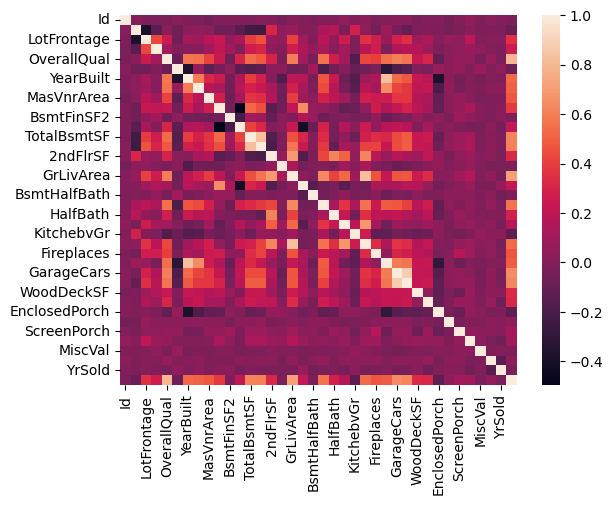

In [9]:
sns.heatmap(df.corr(numeric_only=True))

<i>Al imprimir la matriz de correlación podemos darnos cuenta de que es poco un complicado visualizar con claridad por la cantidad de valores que posee, sin embargo, ya que conocemos cuál es nuestra variable objetivo, podemos filtrarla para visualizar mejor la correlación que existe entre la columna objetivo y todas las demás. </i>

In [10]:
print(df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchebvGr      -0.135907
Name: SalePr

<i>Existen varias columnas que presentan una correlación positiva fuerte, una de ella es 'OverallQual', la cual nos podría indicar que a medida que la calidad general de la casa aumenta, el precio de venta también tiende a aumentar.</i>

### Paso 5: Muestra de gráficas de las variables numéricas y categóricas. 
Puede ser boxplot para las numéricas y de conteo/histograma para las categóricas.

<ul>
  <li>Boxplot columnas numericas</li>
</ul>

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


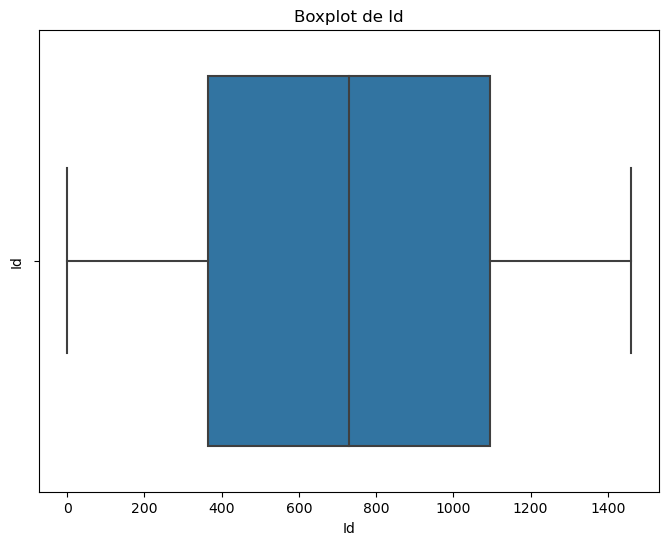

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


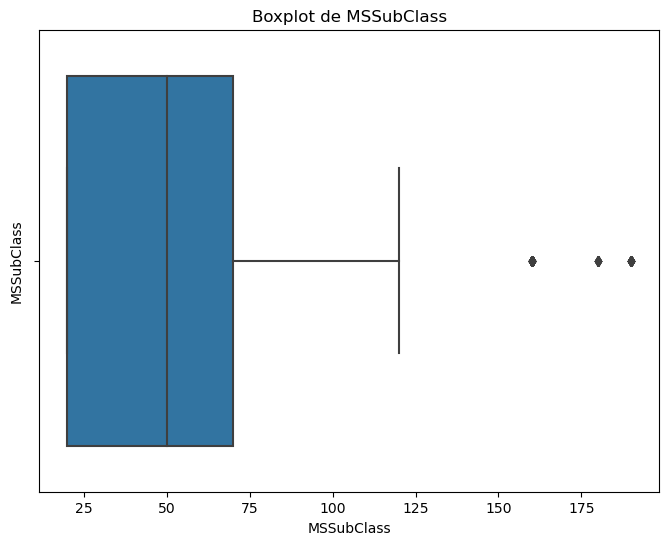

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


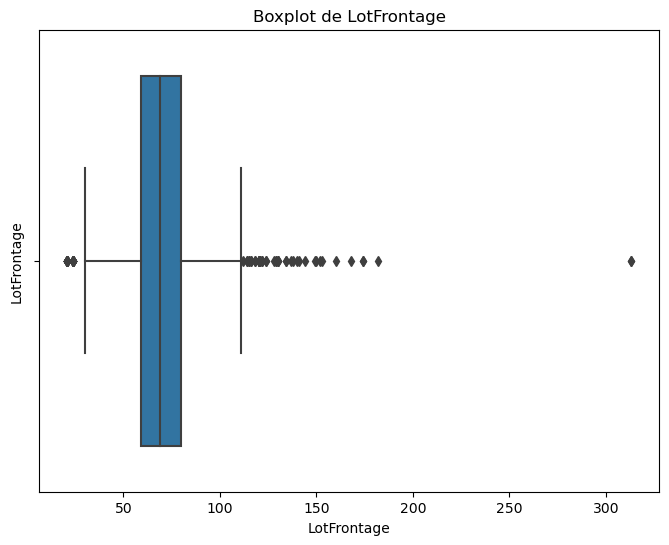

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


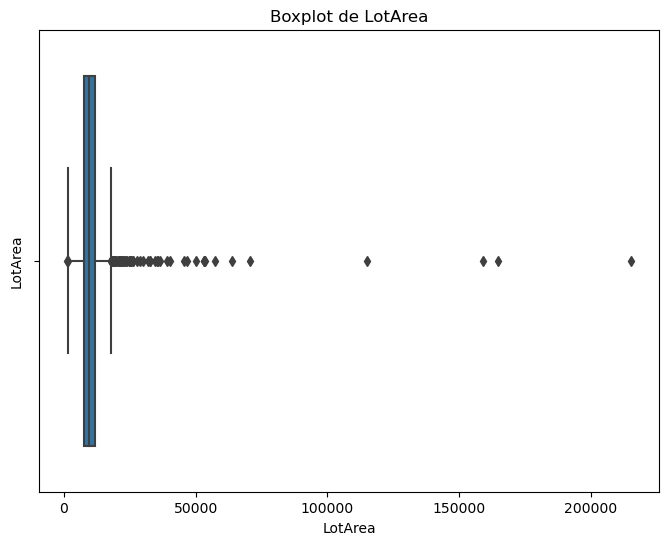

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


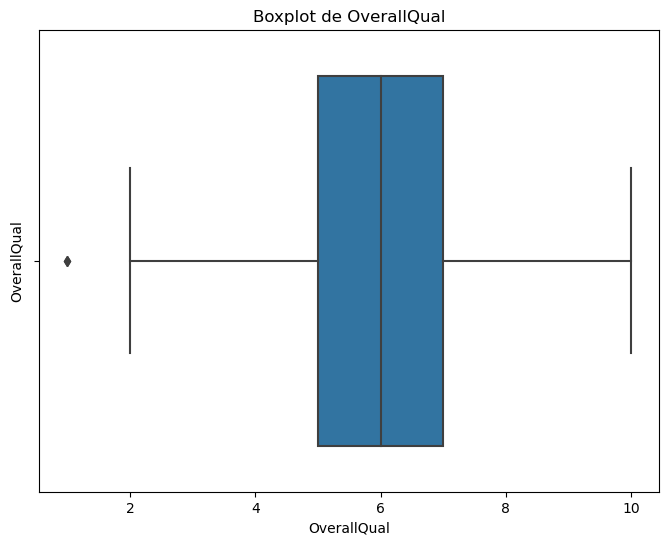

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


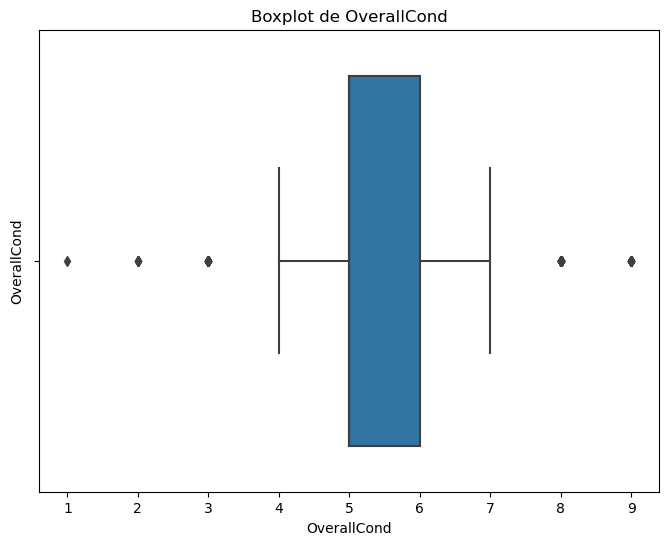

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


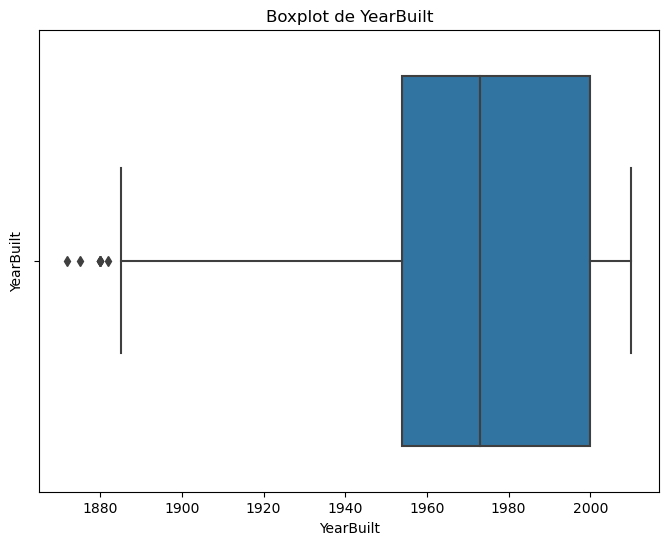

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


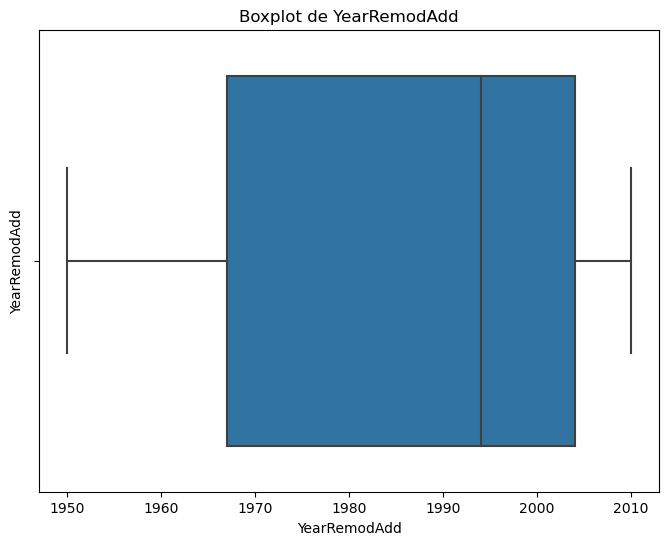

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


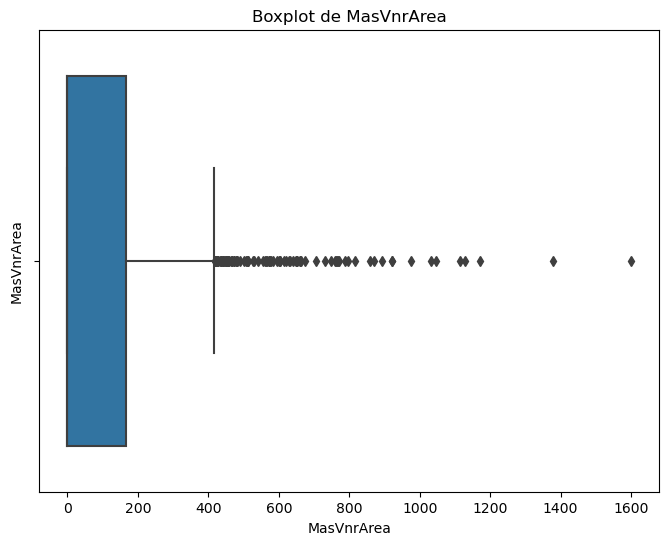

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


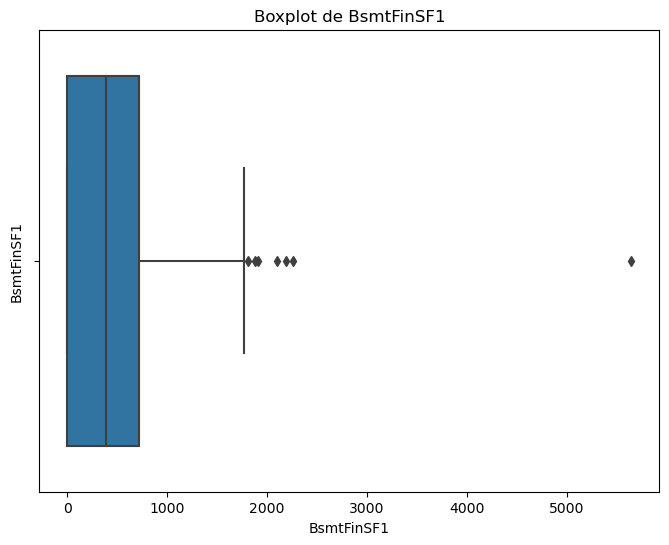

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


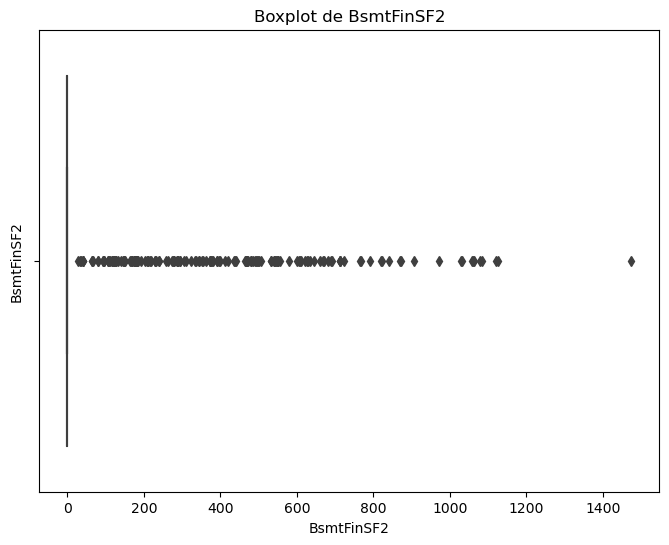

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


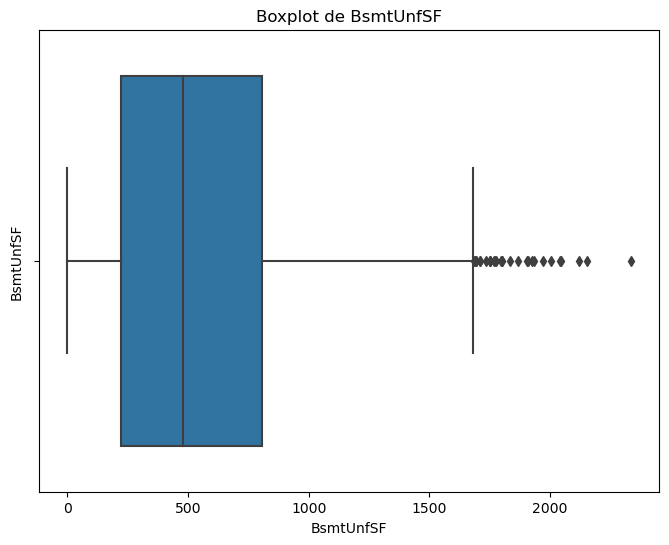

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


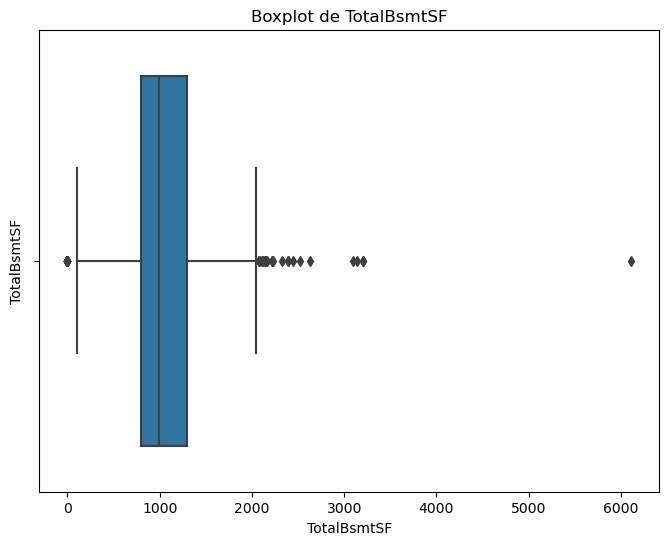

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


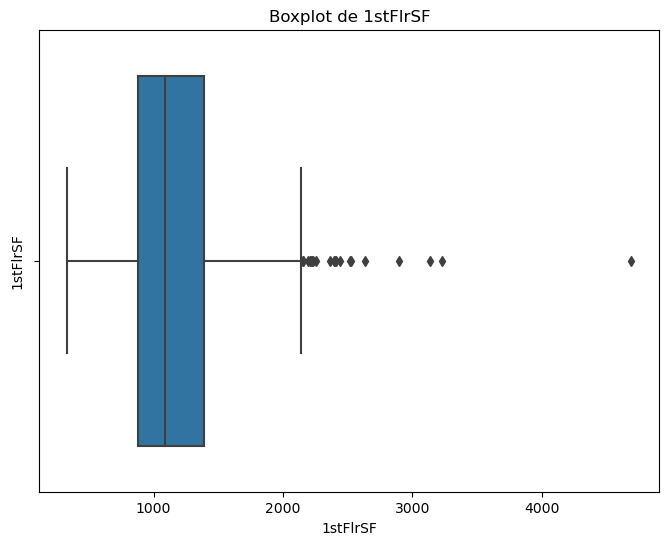

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


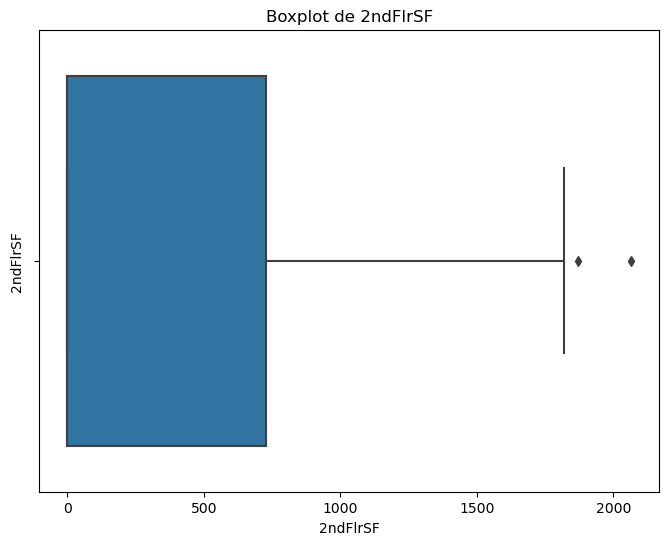

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


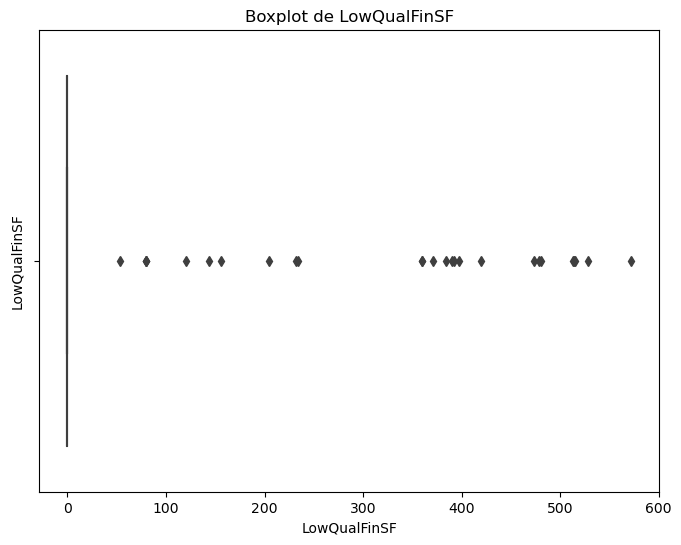

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


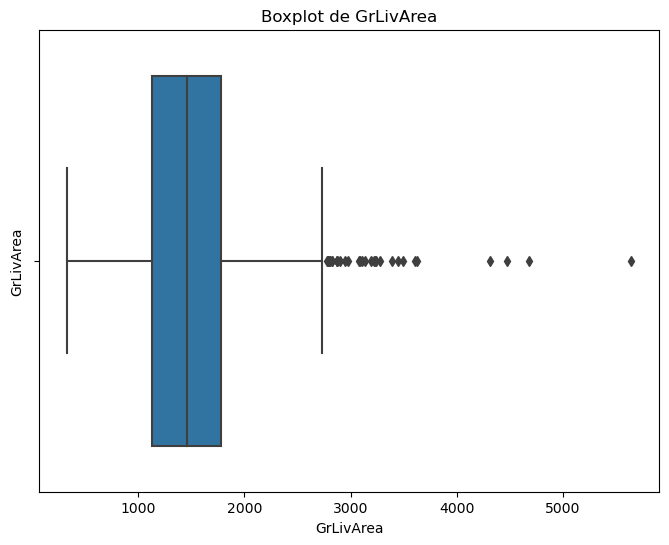

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


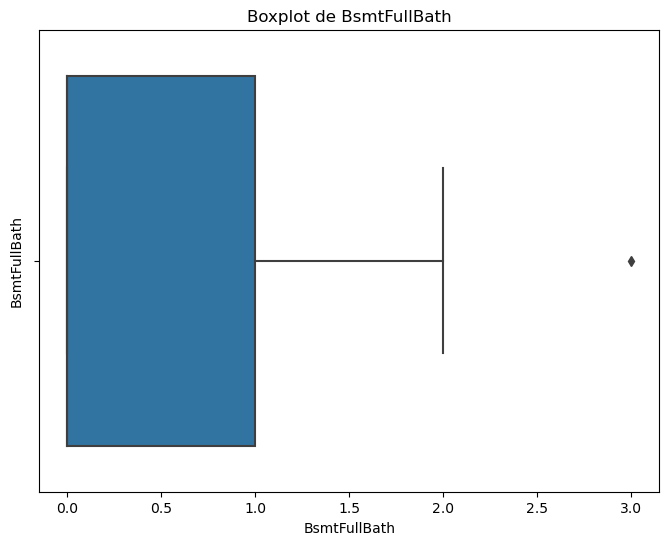

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


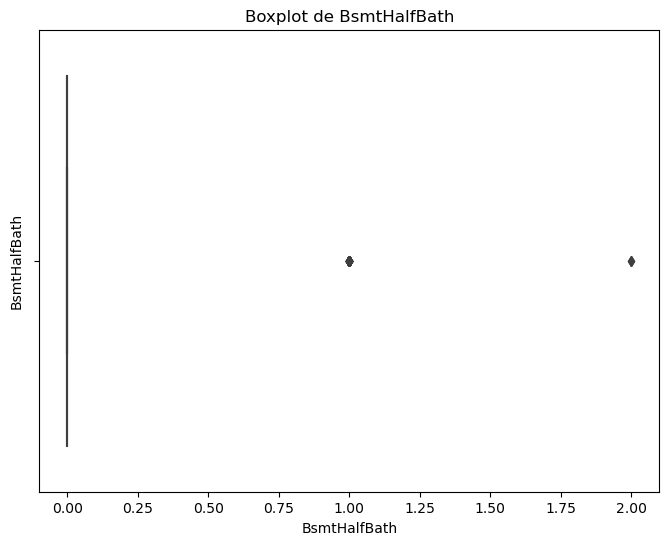

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


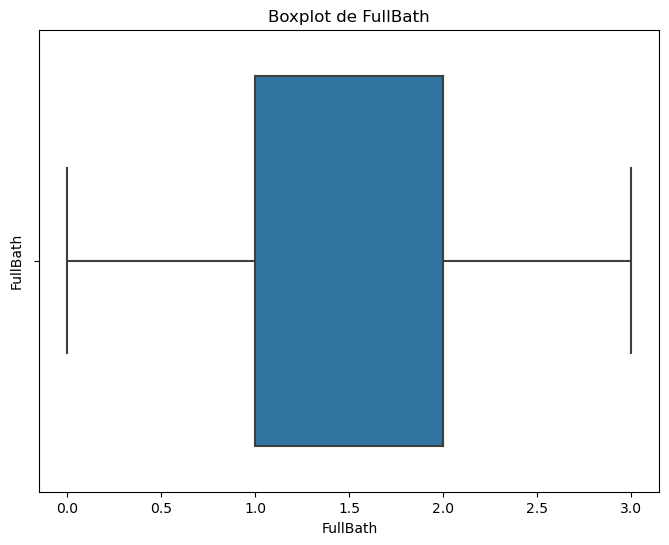

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


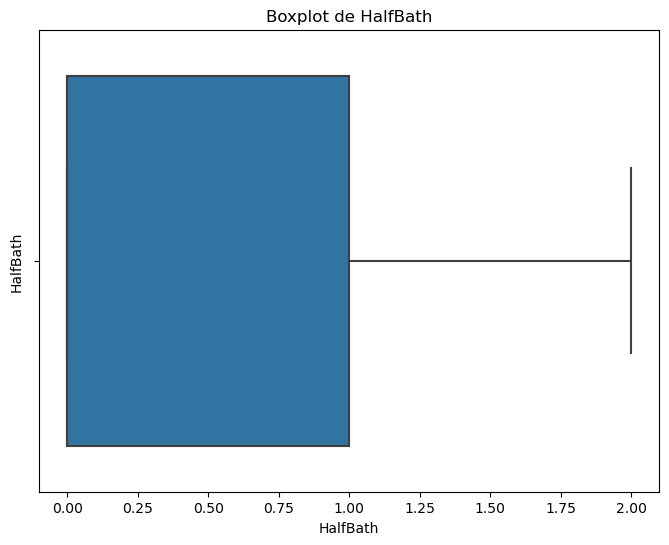

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


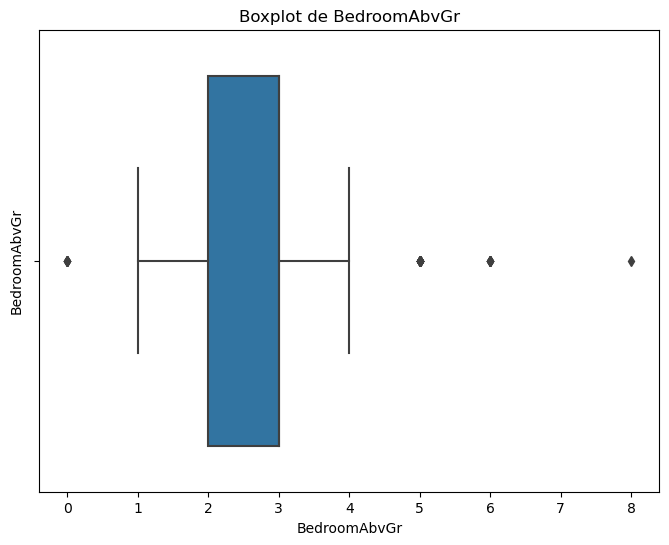

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


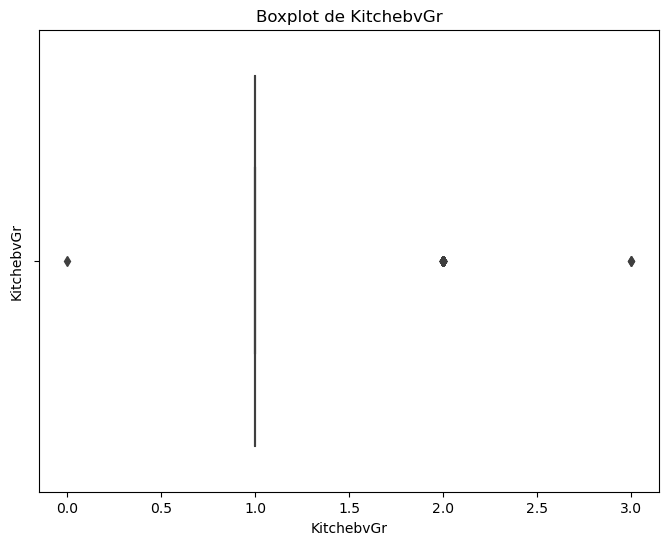

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


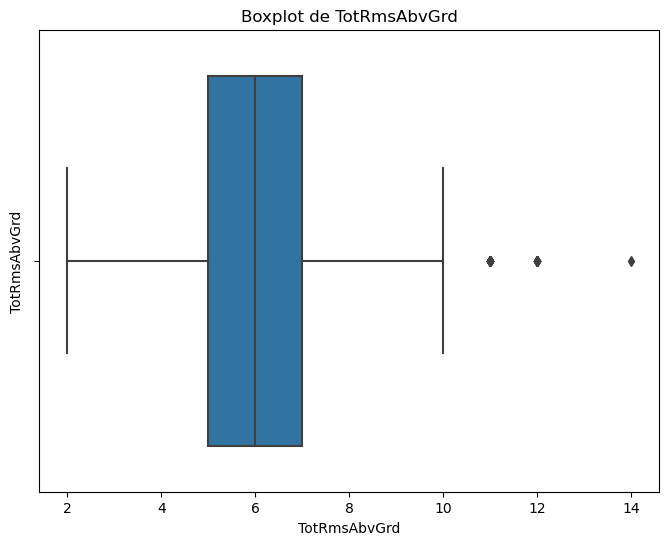

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


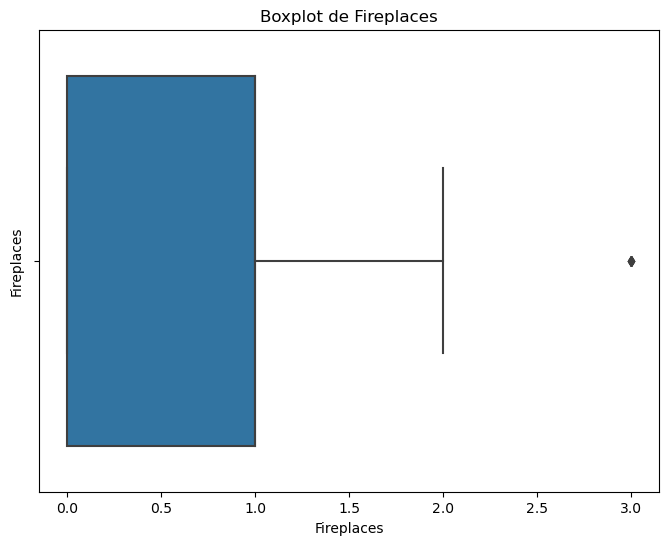

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


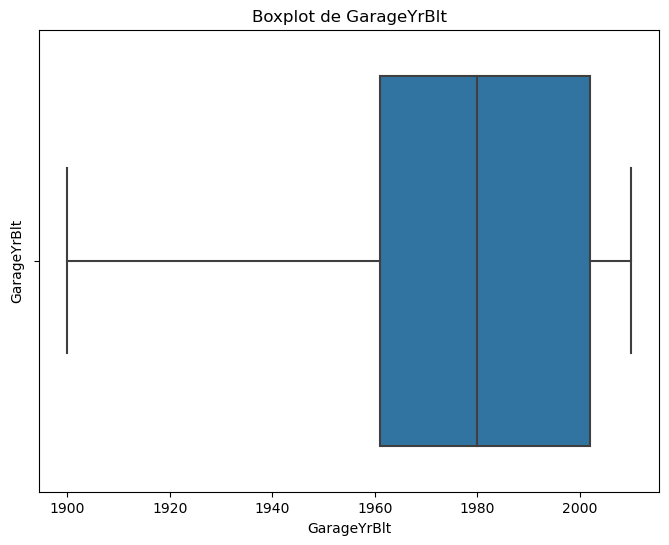

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


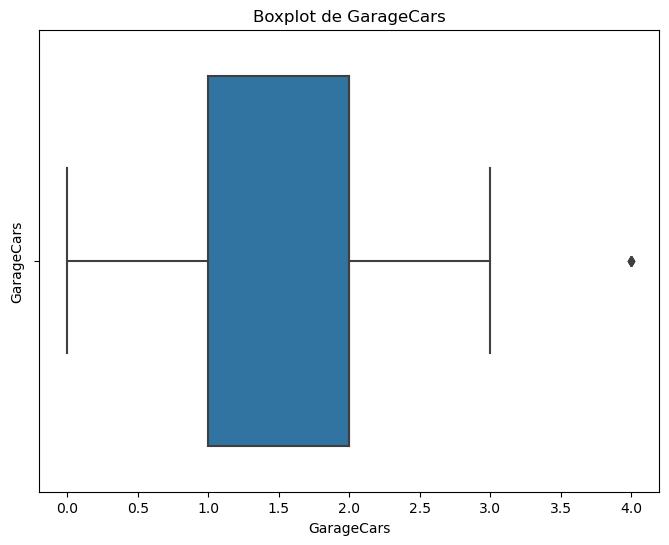

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


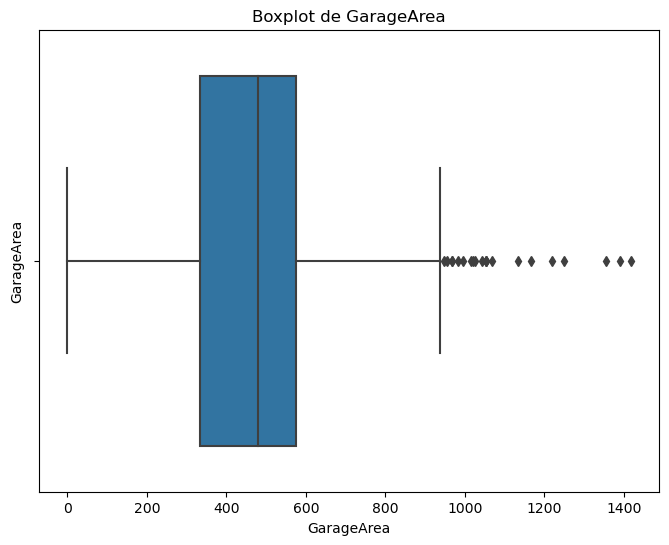

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


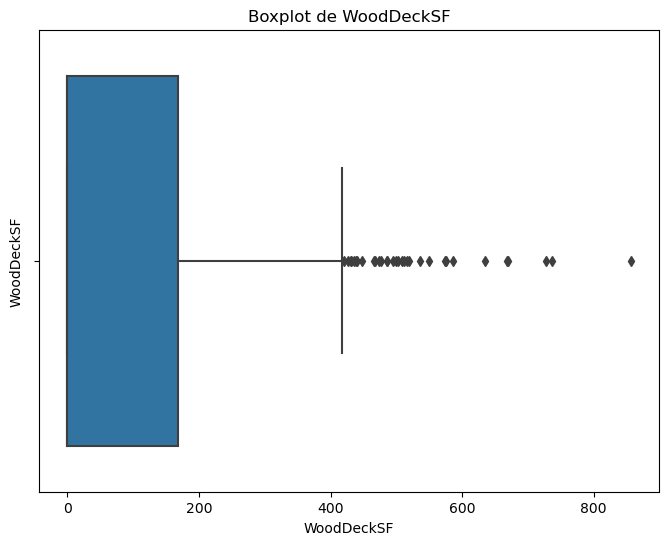

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


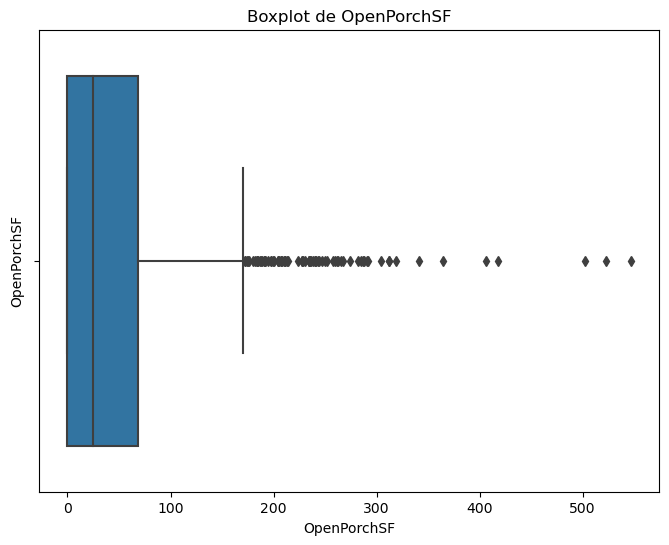

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


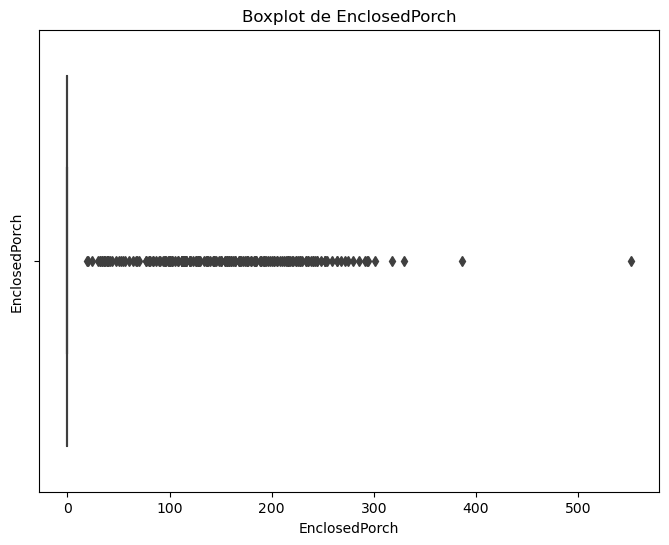

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


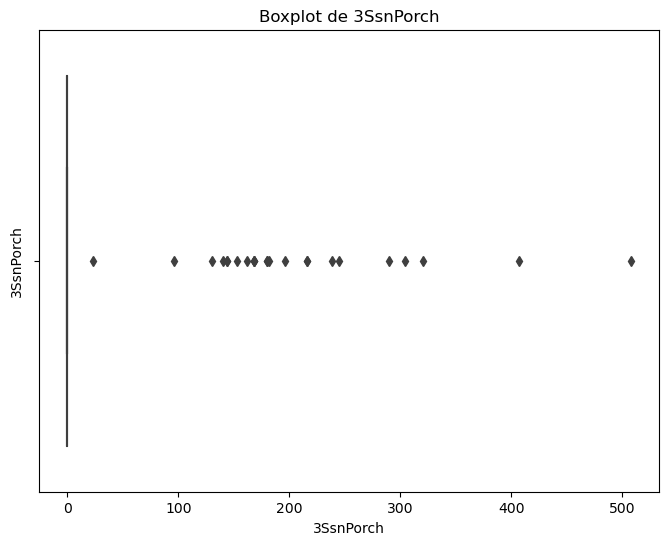

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


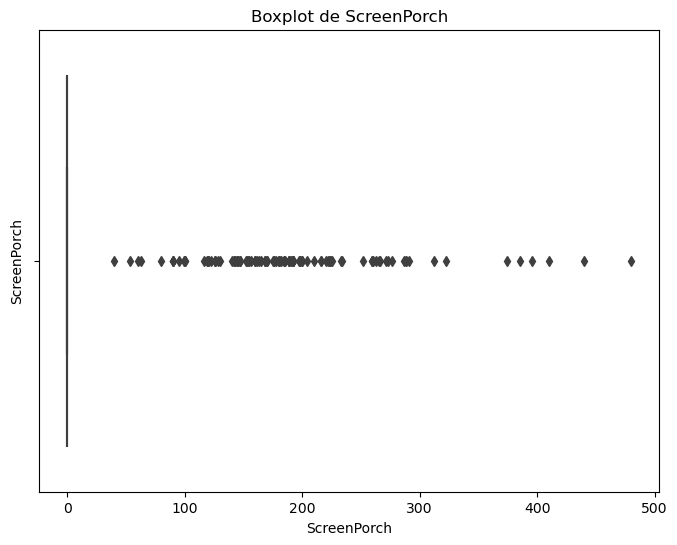

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


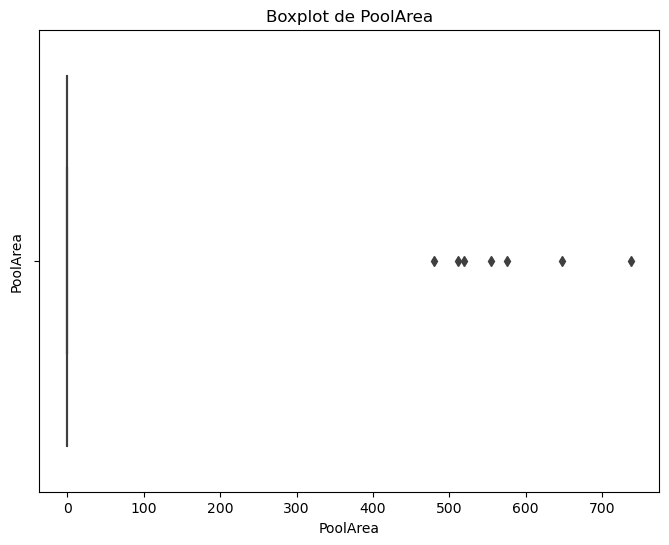

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


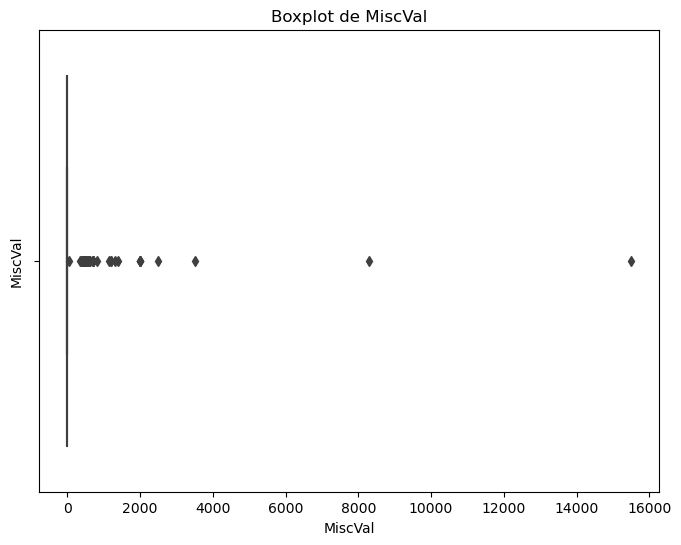

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


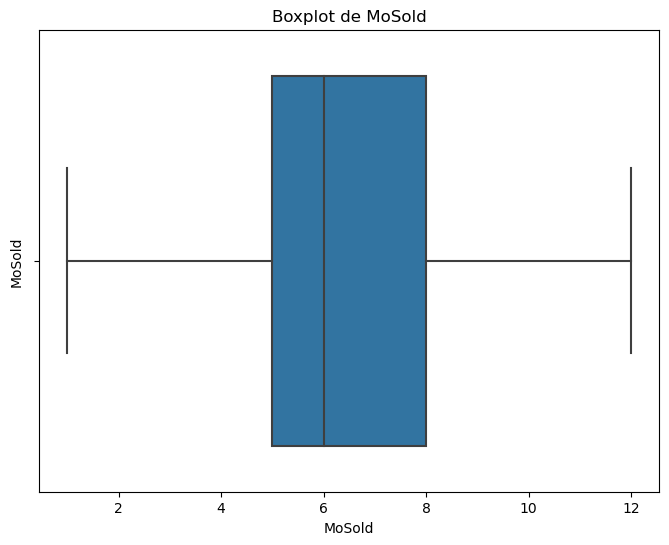

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


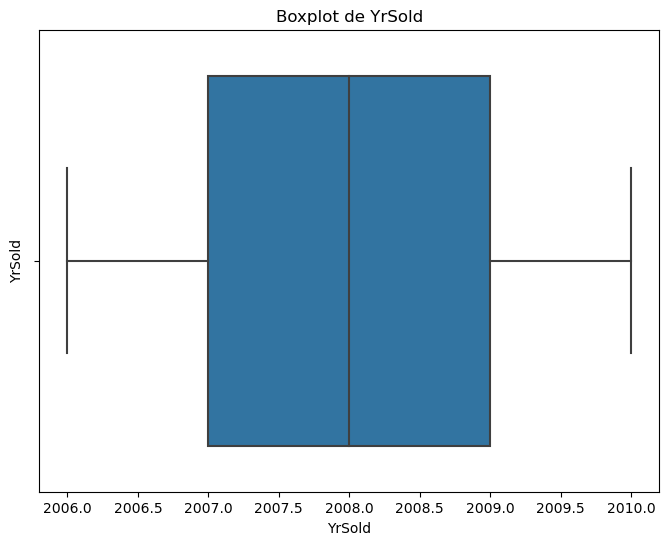

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


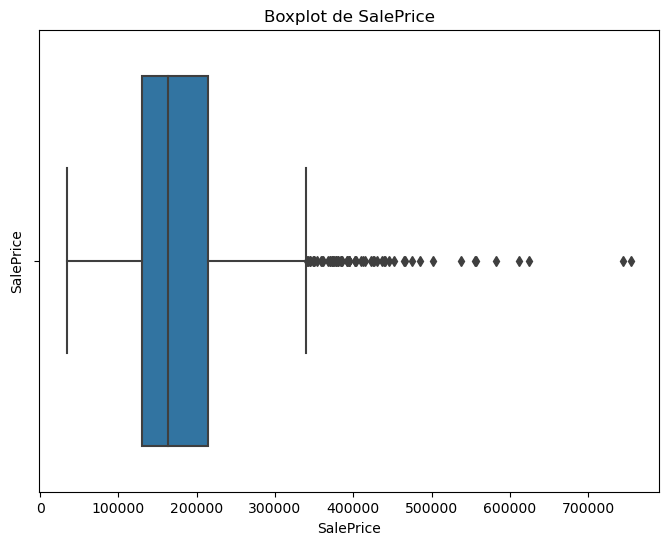

In [11]:
columnas_numericas = df.select_dtypes(include=['number'])

for columna in columnas_numericas.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[columna], orient='vertical')
    plt.title(f'Boxplot de {columna}')
    plt.ylabel(columna)
    plt.show()

<i>Gracias a la visualización de las gráficas podemos observar que nos enfrentaremos con datos atípicos en la gran mayoría de las columnas. Incluso en las gráficas de "BsmtFinSF2", "LowQualFinSF", "BsmtHalfBath", "KitchebvGr", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea" y "MiscVal" no se esta graficando la caja que representa el IQR, solo se ven puntos dispersos, lo que podria significar que la mayoría de los datos están muy concentrados en un rango estrecho, y los datos atípicos están muy separados de esta concentración. 
Así que debería de analizar más a fondo para determinar si son errores que deben corregirse, o si son datos legítimos, pero inusuales, que proporcionan información valiosa para la variable que deseamos predecir.</i>

<ul>
  <li>Histogramas de las columnas categoricas</li>
</ul>

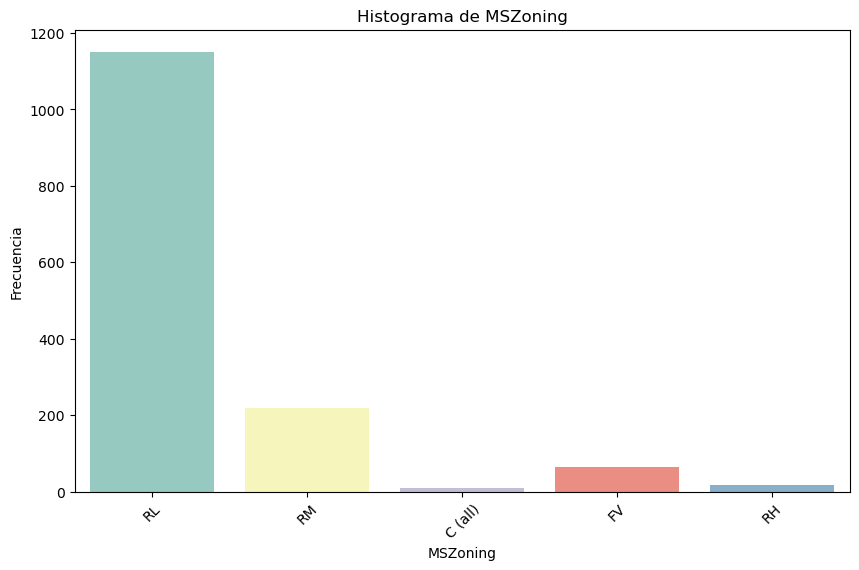

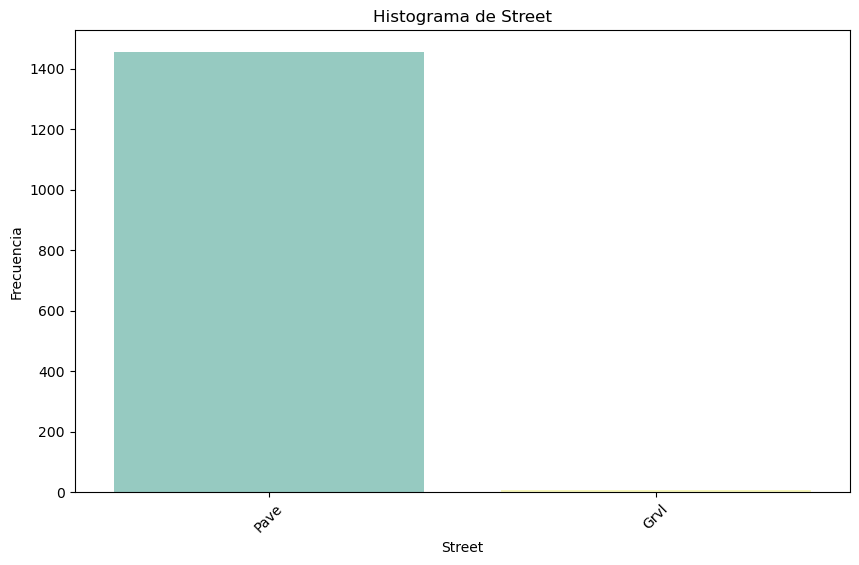

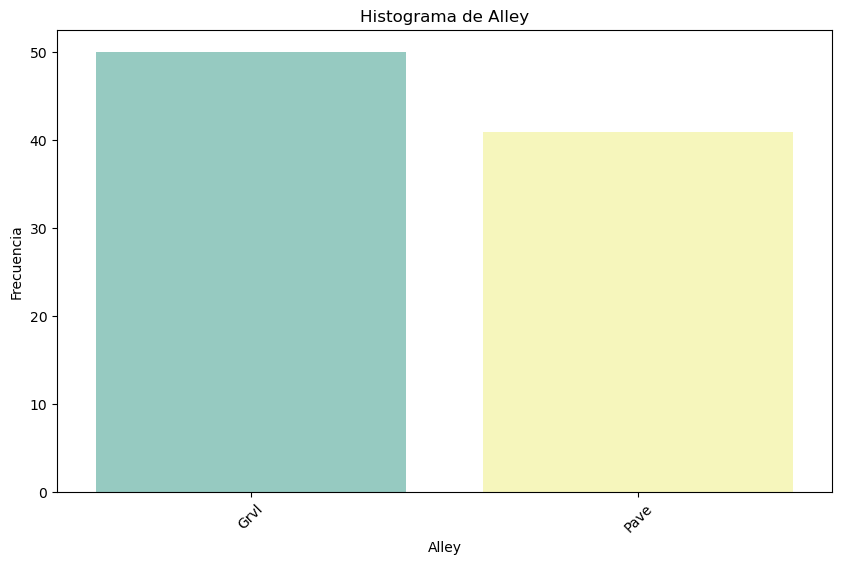

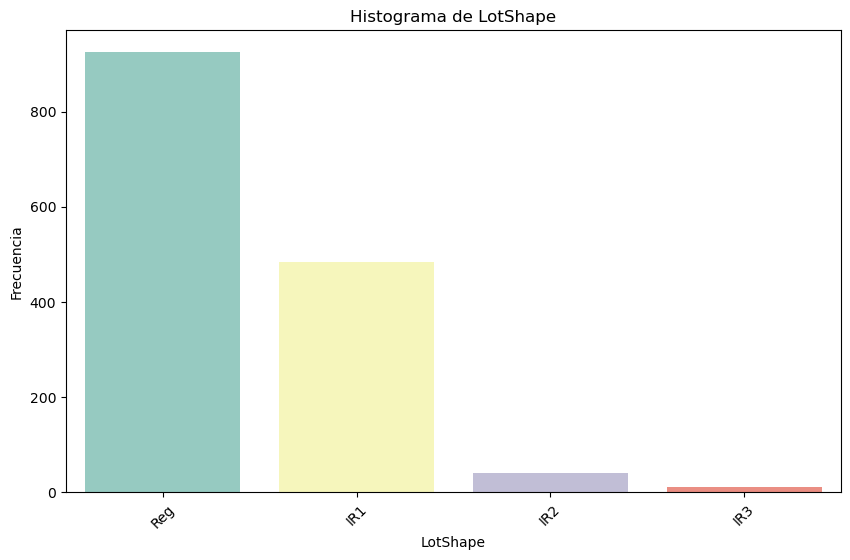

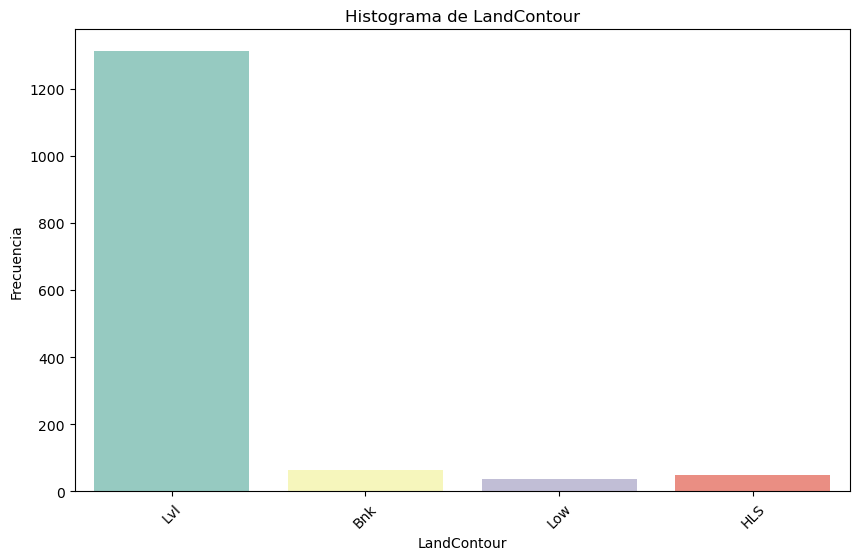

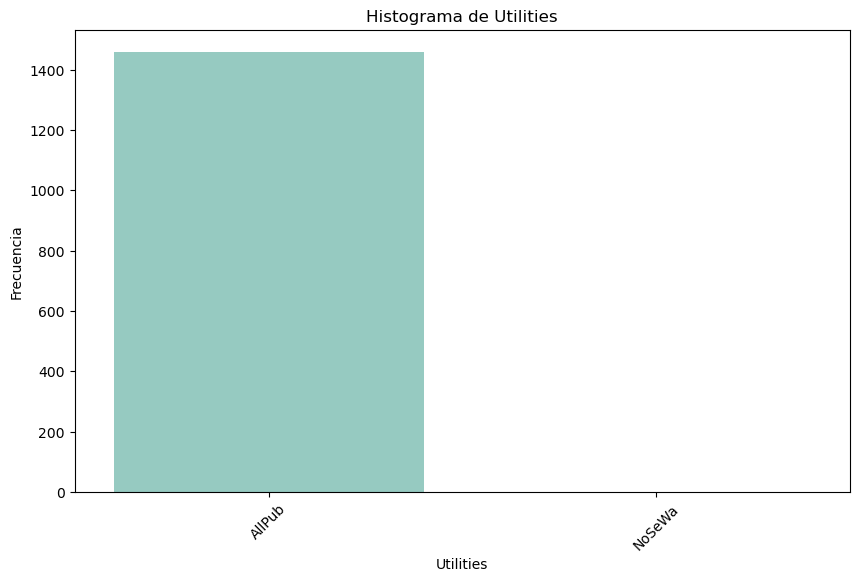

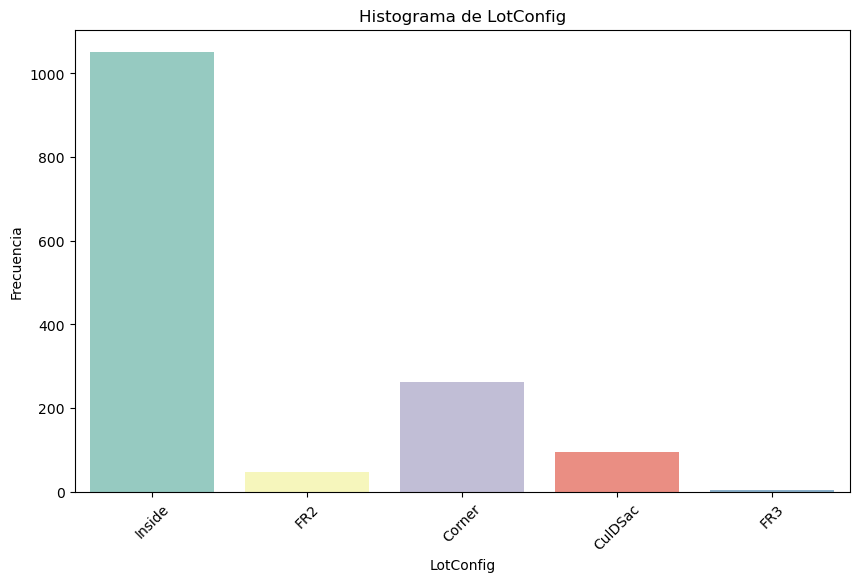

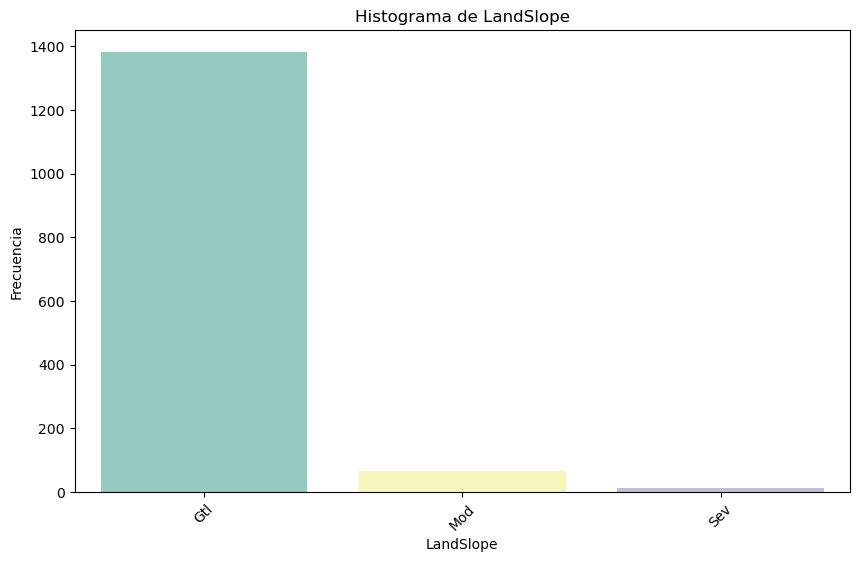

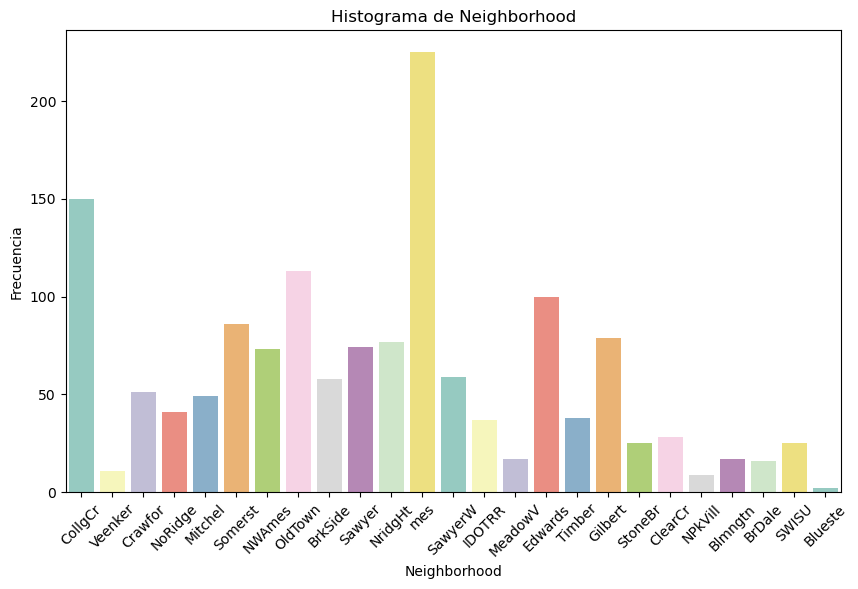

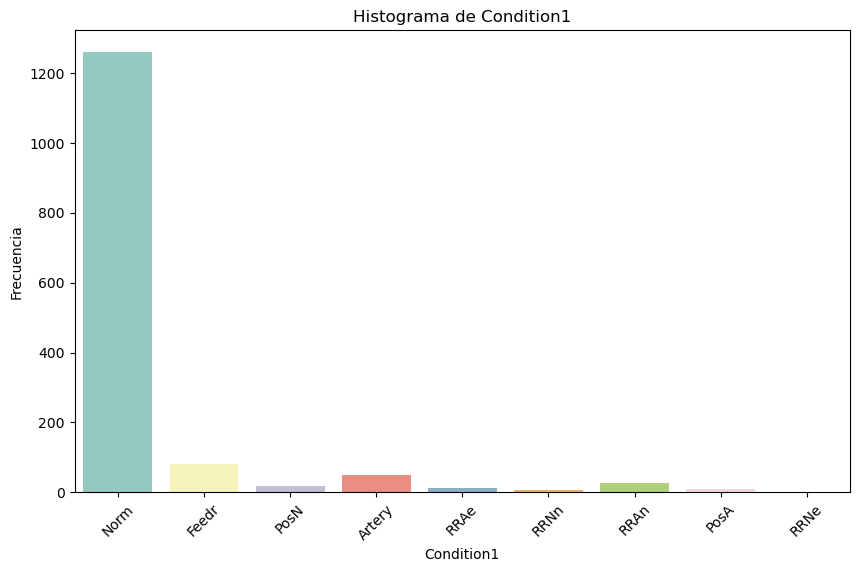

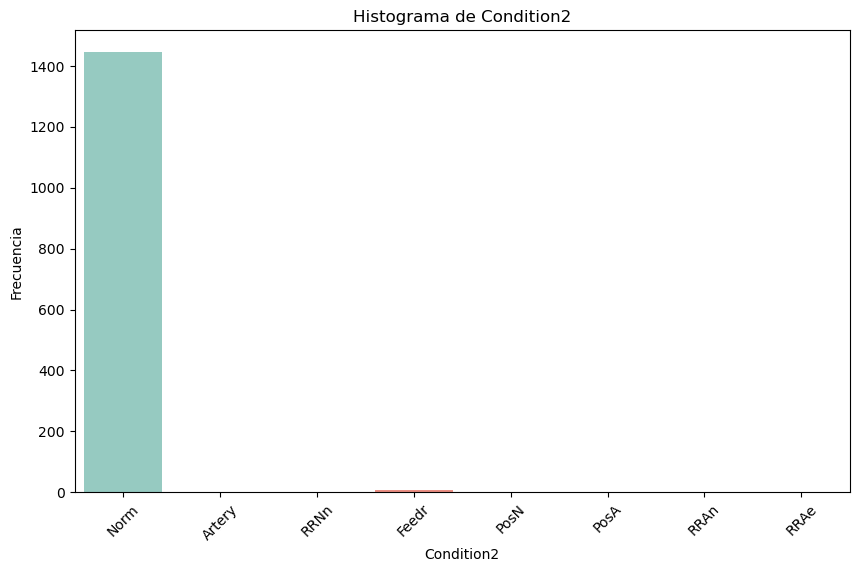

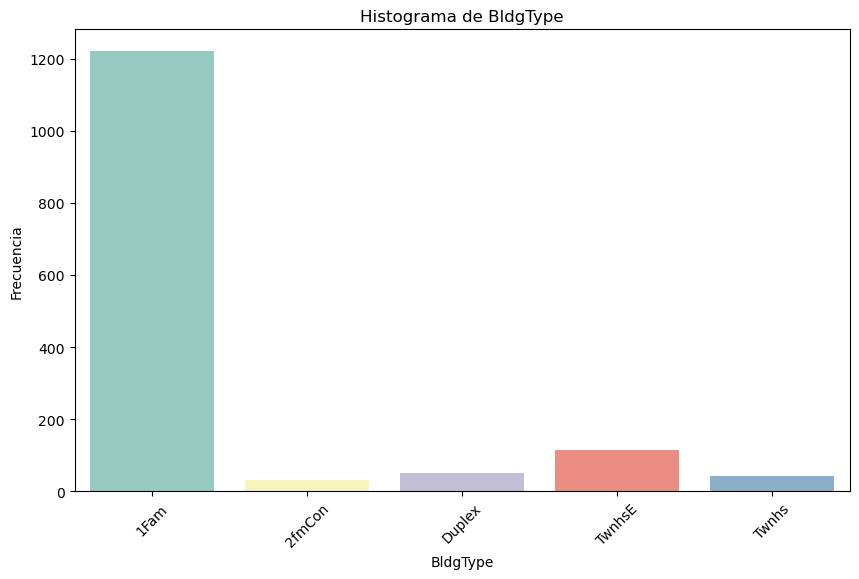

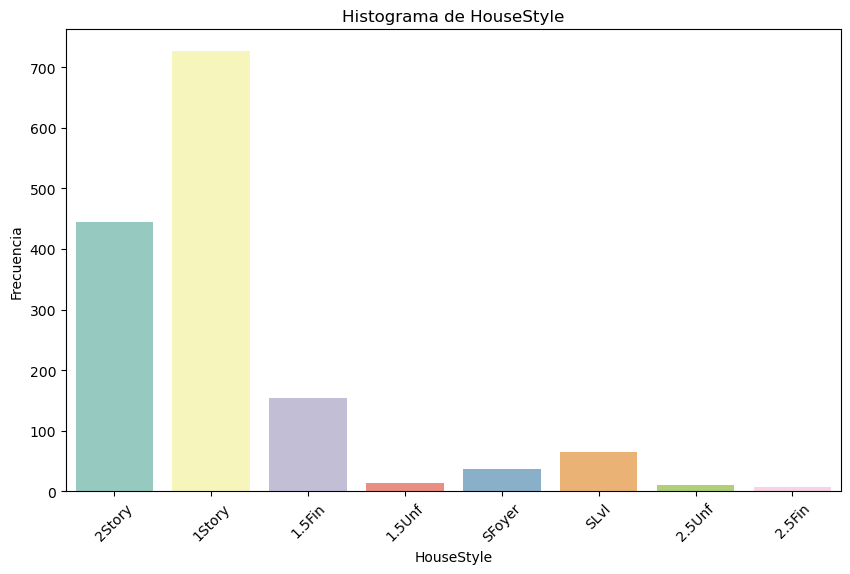

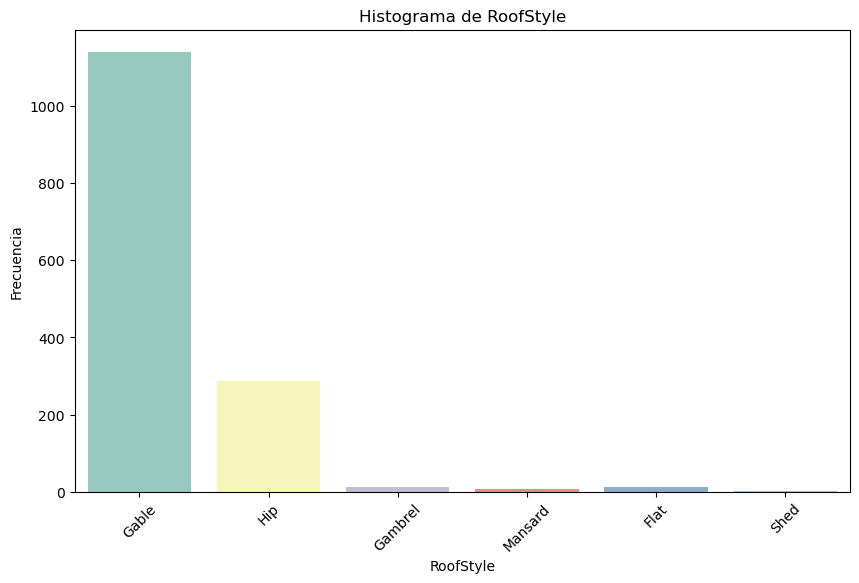

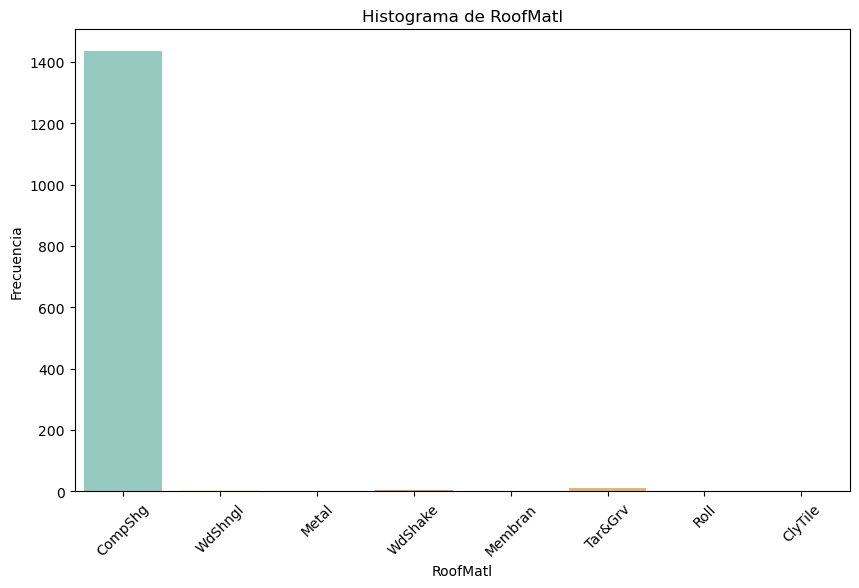

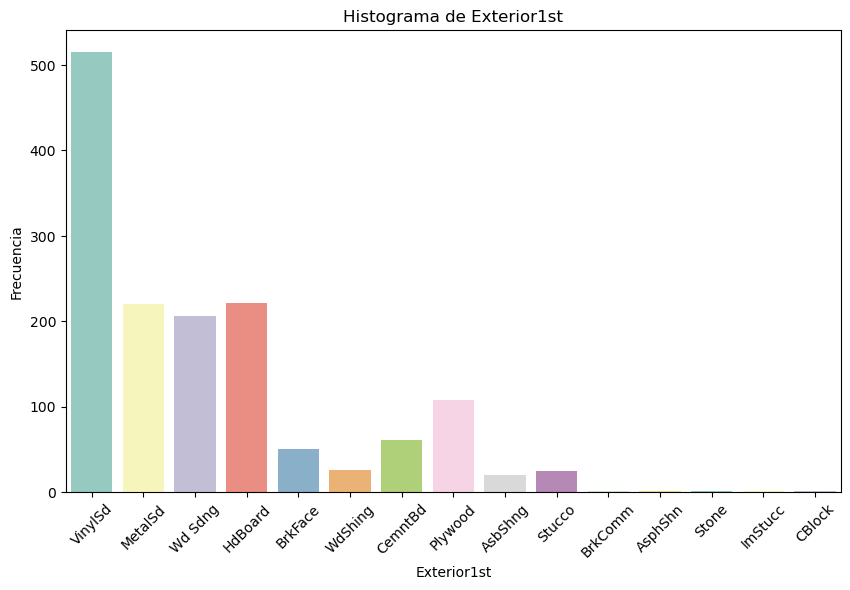

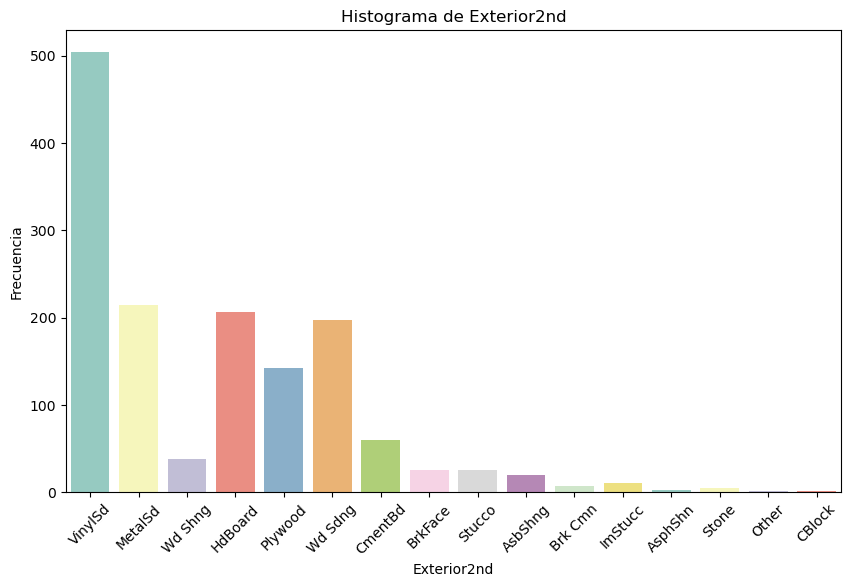

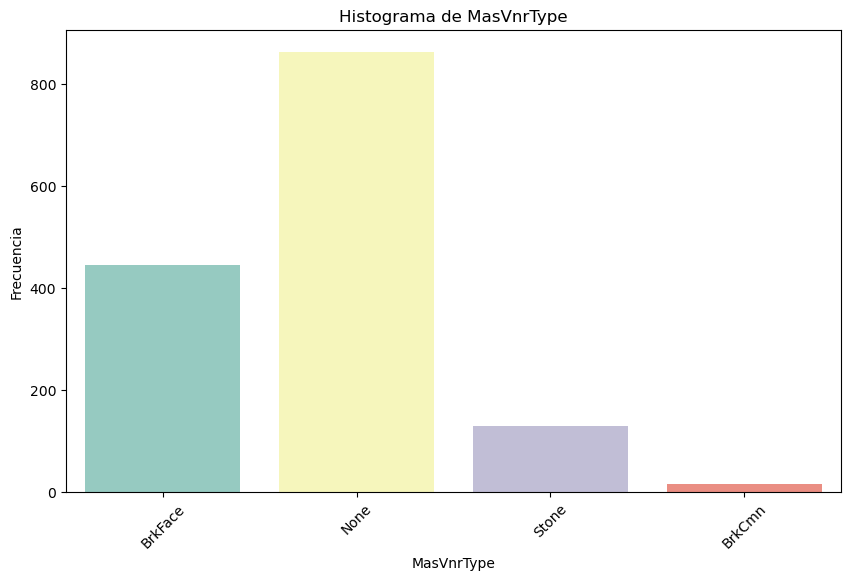

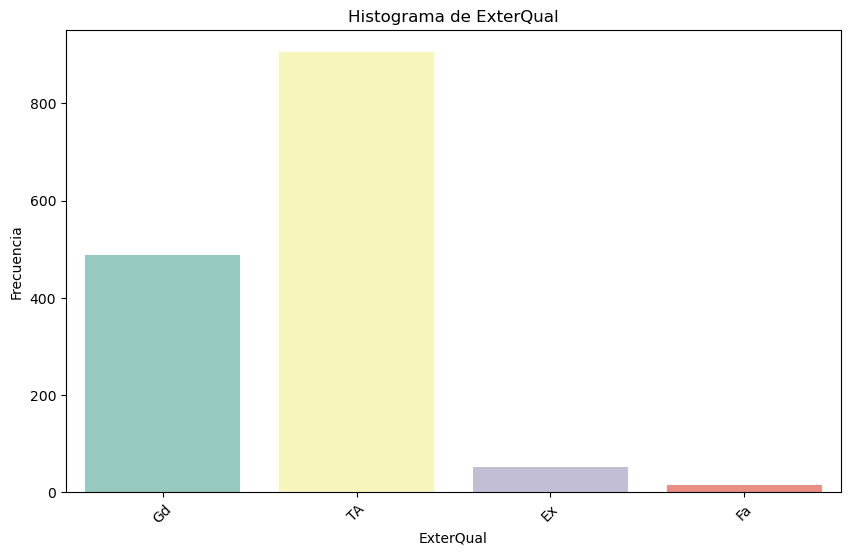

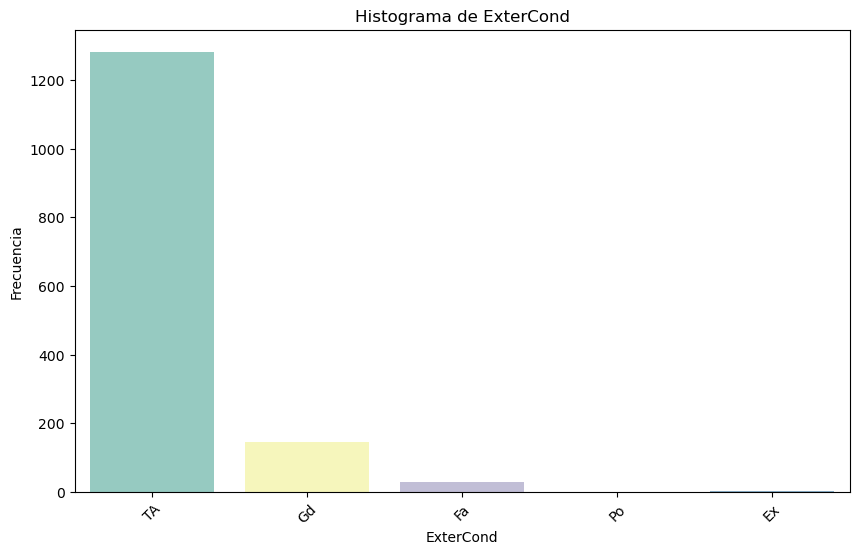

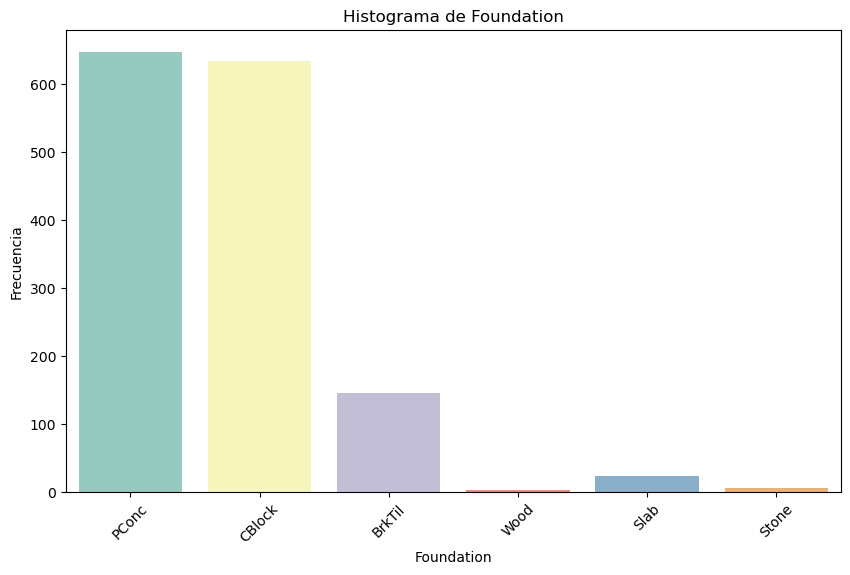

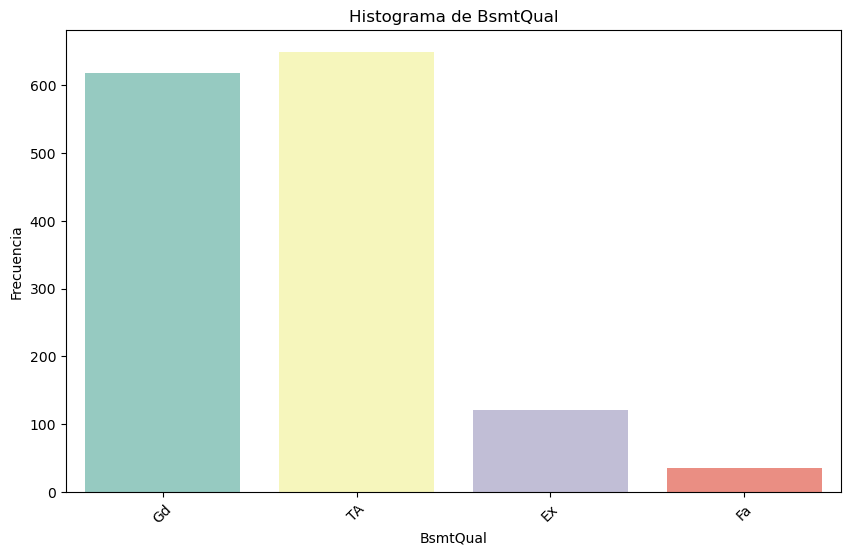

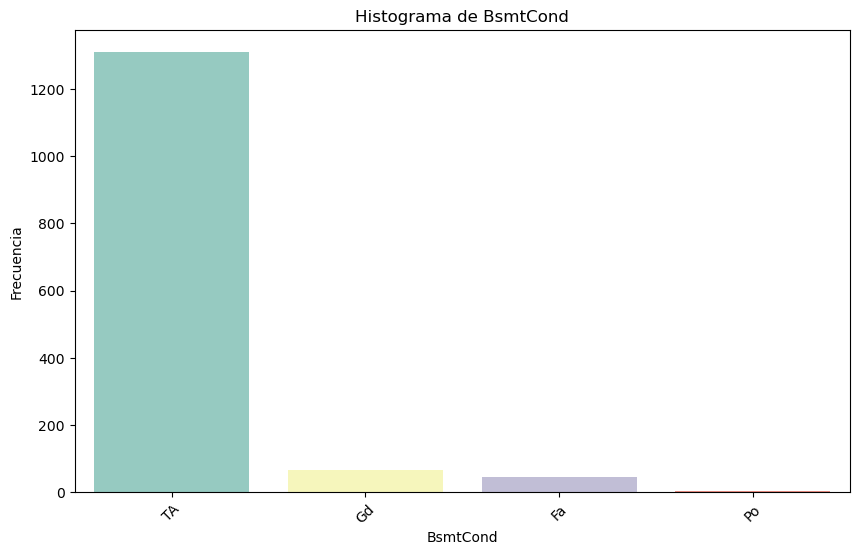

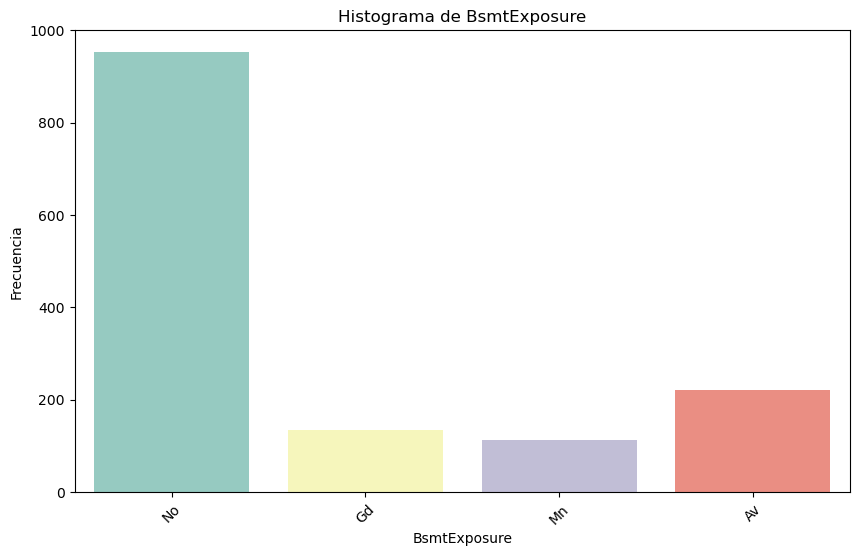

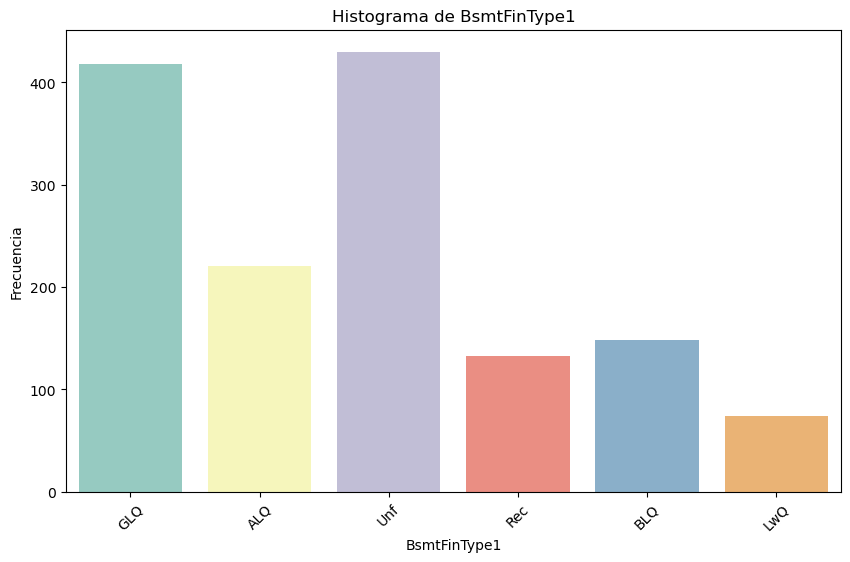

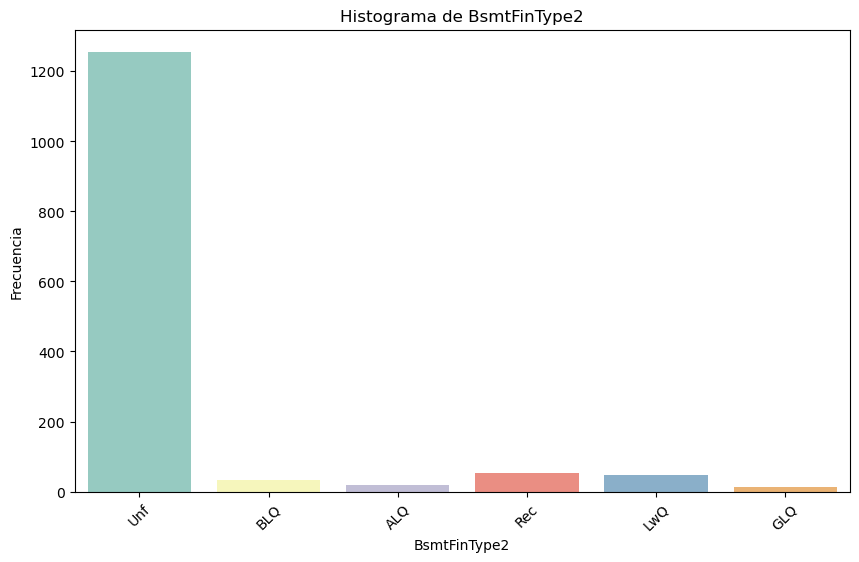

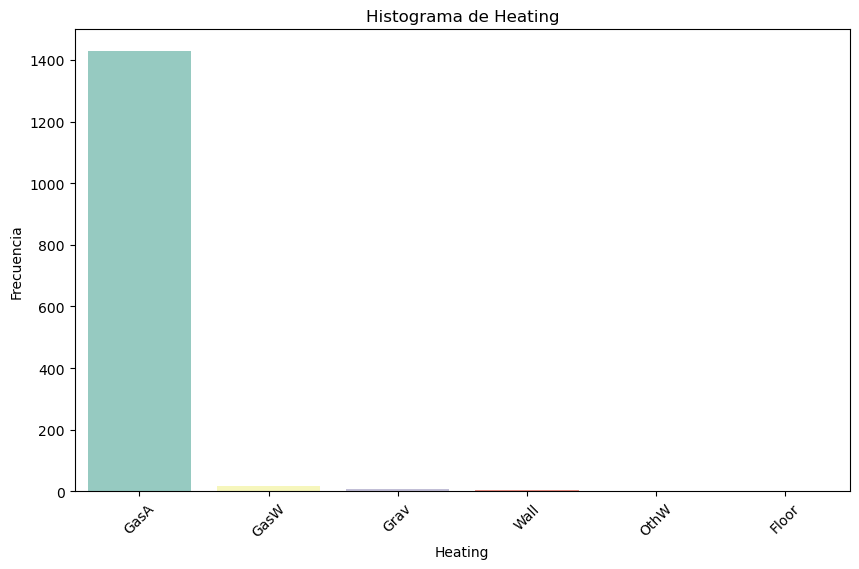

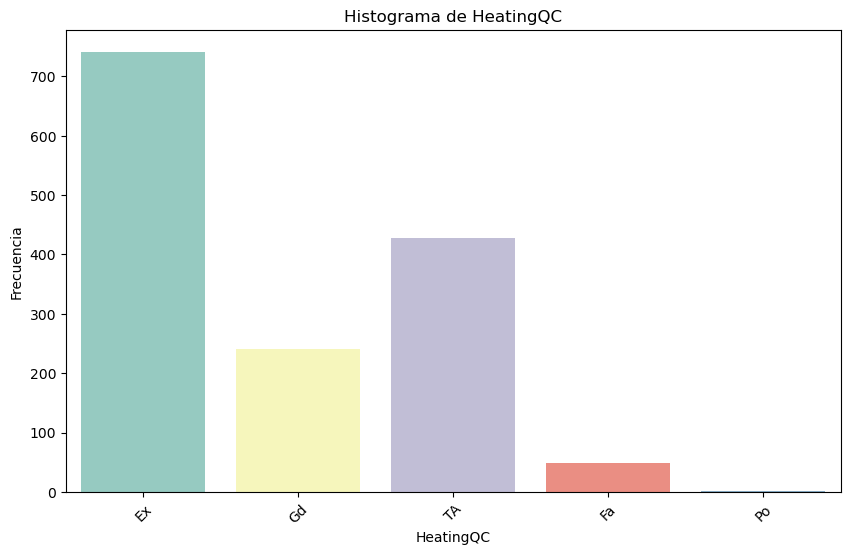

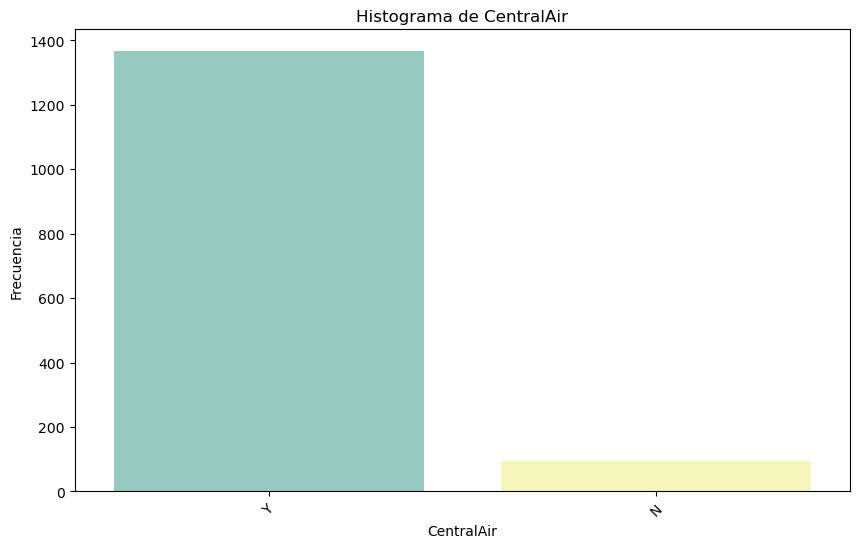

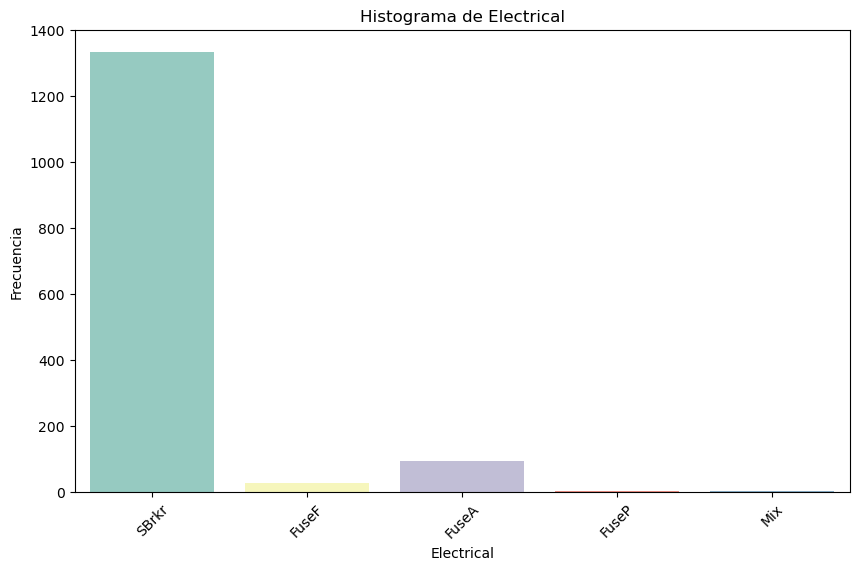

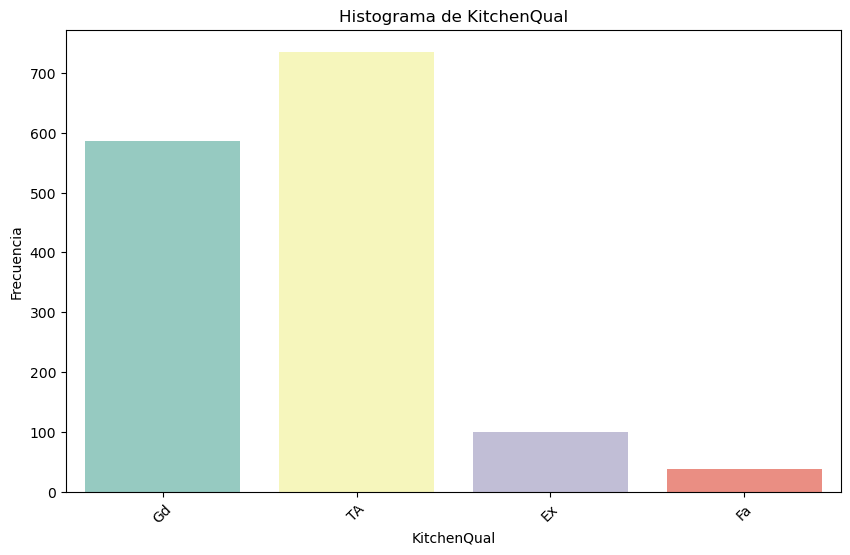

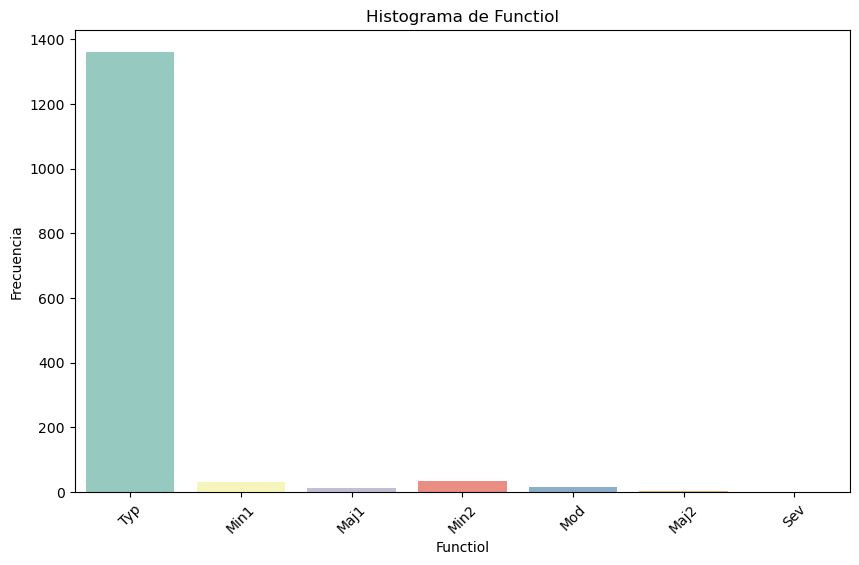

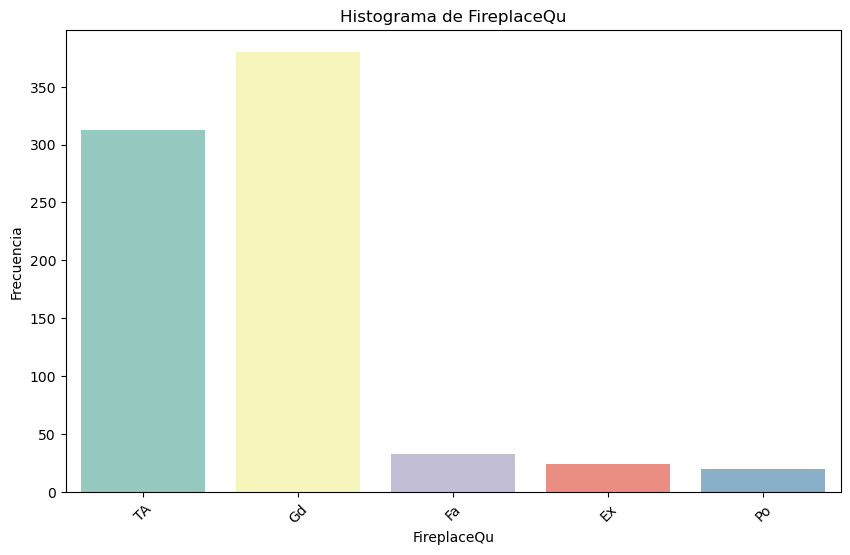

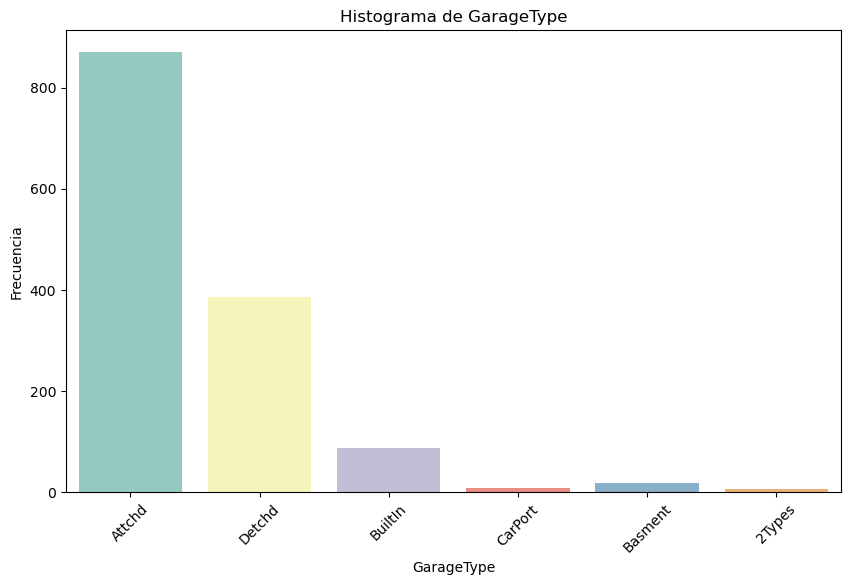

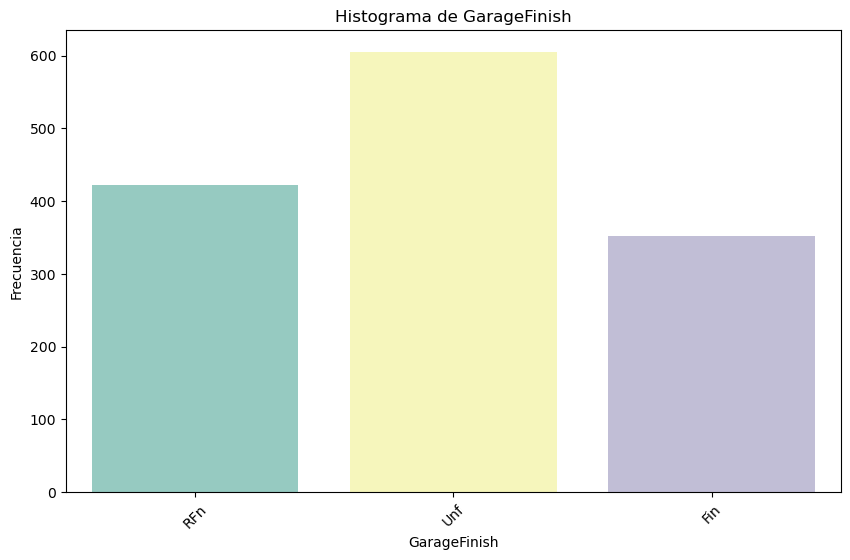

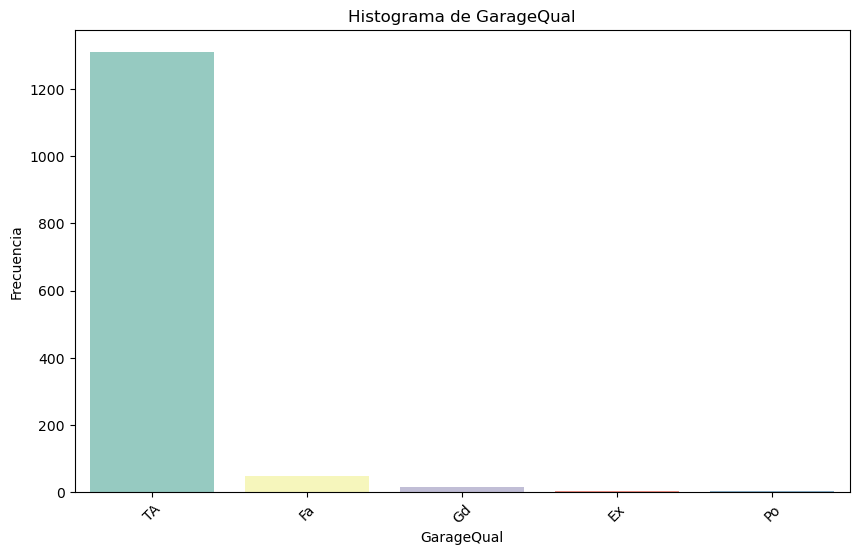

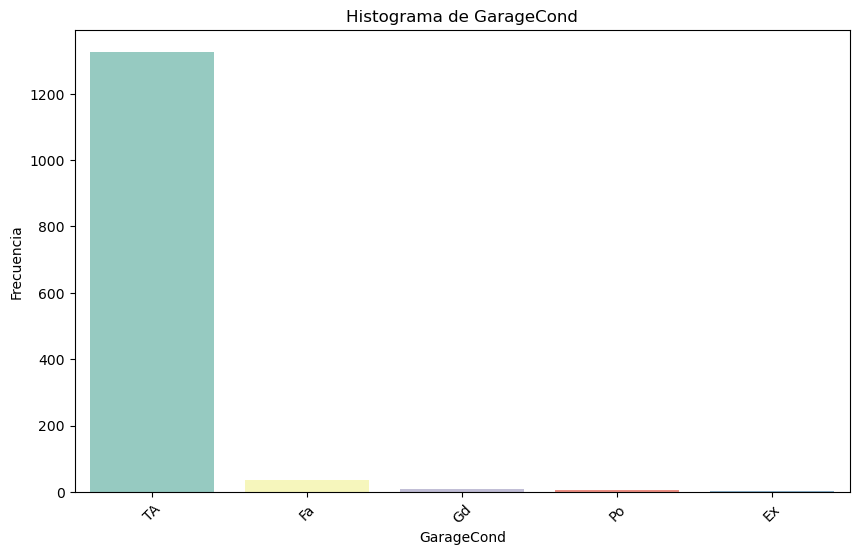

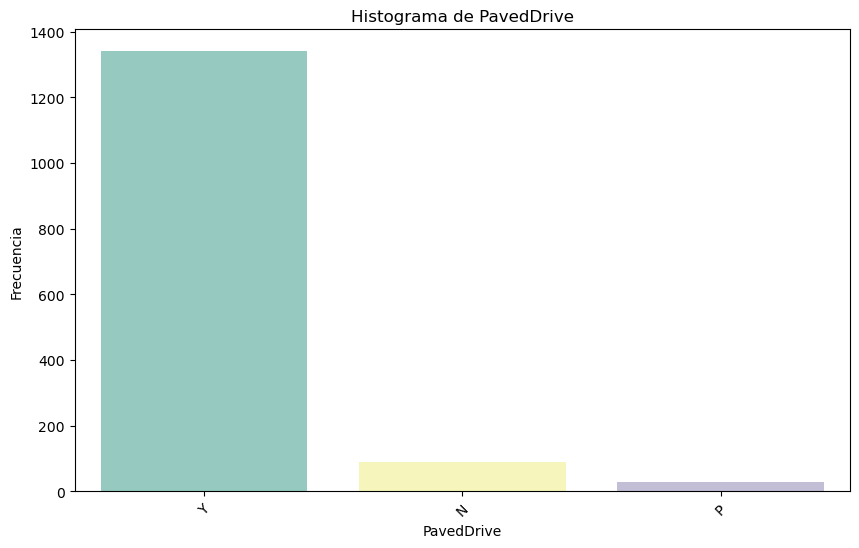

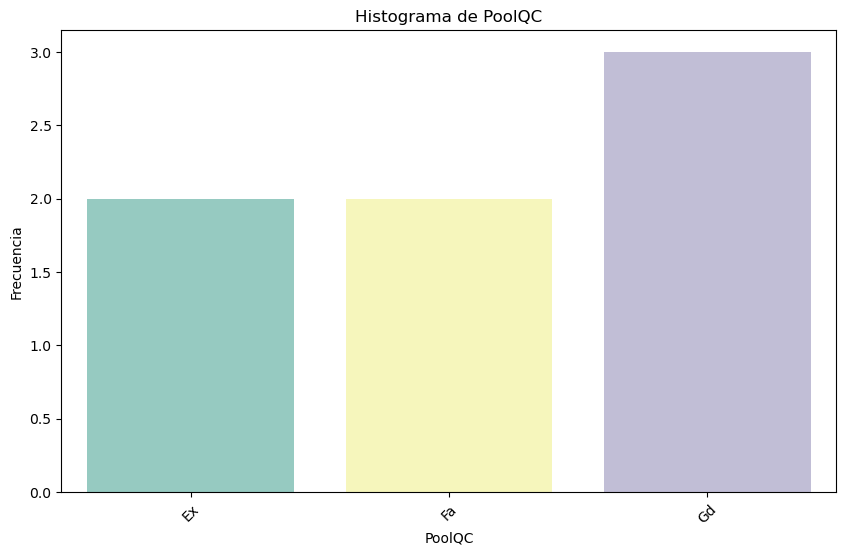

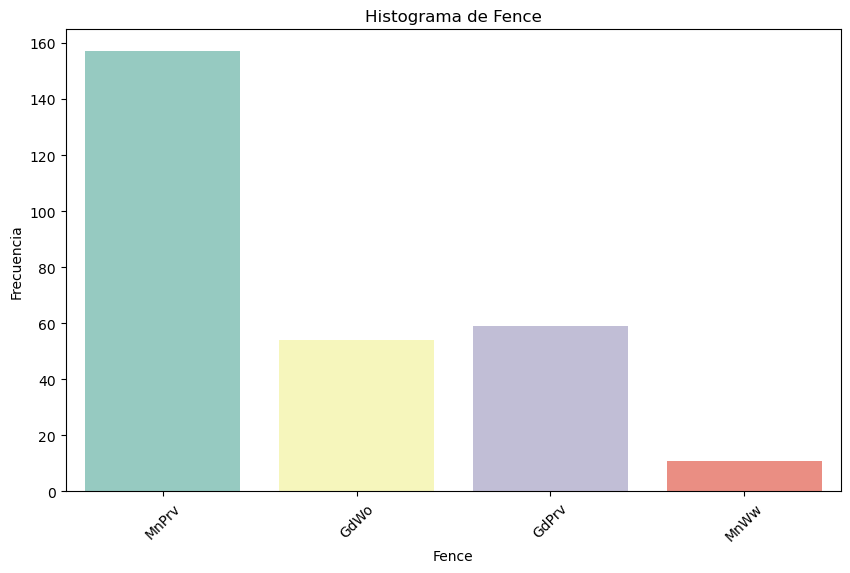

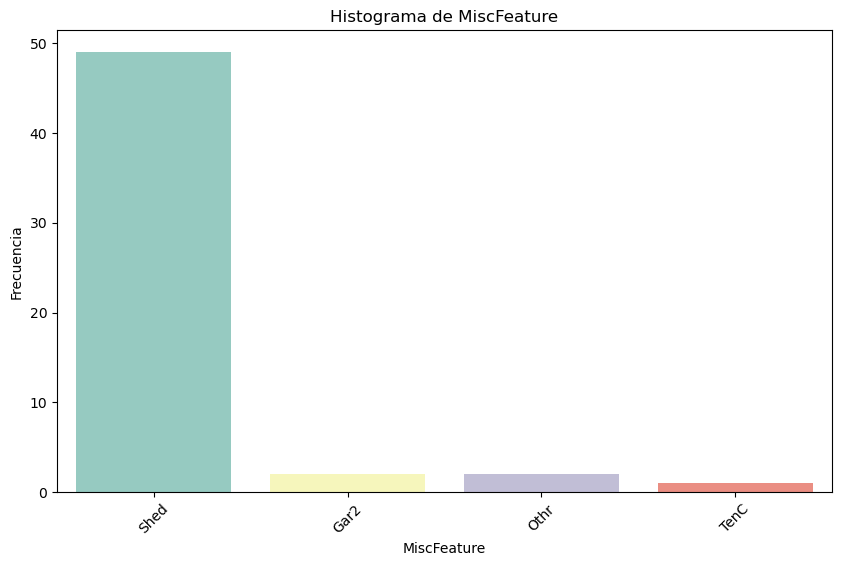

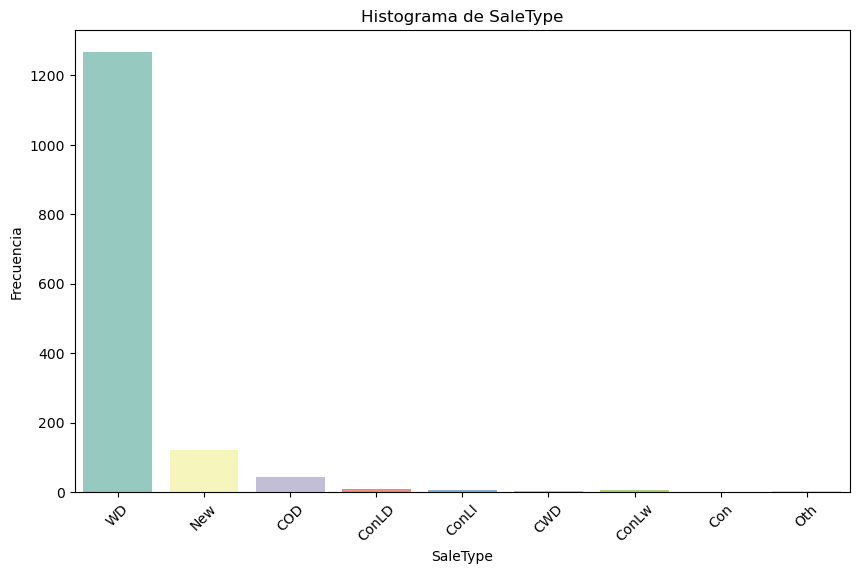

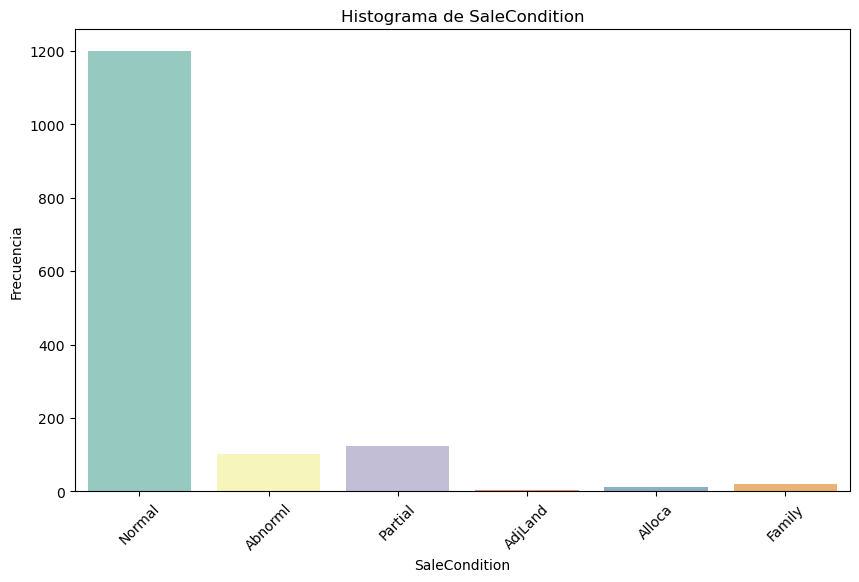

In [12]:
columnas_categoricas = df.select_dtypes(include=['object'])

for columna in columnas_categoricas.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[columna], data=df, palette="Set3")
    plt.title(f'Histograma de {columna}')
    plt.xticks(rotation=45) 
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

<i>Por otro lado, al desplegar los histogramas de las columnas categóricas, podemos observar que existen columnas que presentan una carga de datos masiva en una de muchas categorías, dejando prácticamente en 0  los demás valores que presentan, por ejemplo "Street", "Utilities", "LandSlope", "Condition 1", "Condition 2", "RoofMatl", "Heating".</i>
<br>
<i>Habría que valorar si esta carga masiva a un valor en especial es normal, o si existen inconsistencias y que por esa razón los demás valores no contengan datos. </i>

## Tratamiento de los datos.

### Paso 1: Crear un límite para eliminar los datos nulos, mostrar las variables que harán eliminación a sus nulos y mostrar los conteos antes, eliminar los datos nulos y mostrar los conteos de nuevo.

<ul>
<li>Mostrar el conteo de datos nulos</li>
</ul>

In [13]:
print(df.isna().sum().sort_values(ascending=False))

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64


<ul>
<li>Crear el limite</li>
</ul>

In [14]:
limite = len(df) * 0.05
print(f"El límite será {limite}")

print("Columnas que superan el limite")
print("")
columnas_a_imputar = df.columns[df.isna().sum() >=limite]
print(columnas_a_imputar)

print("Columnas que no superan el limite")
print("")
columnas_a_eliminar = df.columns[df.isna().sum() <= limite]
print(columnas_a_eliminar)

El límite será 73.0
Columnas que superan el limite

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
Columnas que no superan el limite

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'Half

<i>Como ya se había comentado anteriormente, dentro de nuestro data set contamos con pocas columnas con datos nulos, y la mayoría de estas no superan el 5% recomendado para eliminarlos. Así que se realizara la eliminación de dichos registros en todas las columnas que no excedan el límite.</i>

In [15]:
df_limpio = df.dropna(subset=columnas_a_eliminar).copy()
print(df_limpio.isna().sum().sort_values(ascending=False))

PoolQC         1405
MiscFeature    1361
Alley          1323
Fence          1135
FireplaceQu     657
               ... 
ExterQual         0
MasVnrArea        0
MasVnrType        0
Exterior2nd       0
SalePrice         0
Length: 81, dtype: int64


<i>Por otro, contamos con las columnas "PoolQC", "MiscFeature", "Alley" y "Fence" columnas categóricas que tienen más del 50% de datos nulos, por lo cual es recomendable checar la correlación que tienen con la variable objetivo y si esta no es fuerte, podríamos considerar eliminarlas por completo.</i>

In [16]:
df_copia = df_limpio.copy()

# Seleccionar las columnas categóricas para aplicar one-hot encoding
columnas_categoricas = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']

# Aplicar one-hot encoding a las columnas categóricas
df_copia = pd.get_dummies(df_copia, columns=columnas_categoricas, drop_first=True)

# Agregar 'SalePrice' a las columnas a considerar
columnas_categoricas_encoded = list(df_copia.columns)
columnas_categoricas_encoded.append('SalePrice')

# Calcular la matriz de correlación
correlation_matrix = df_copia[columnas_categoricas_encoded].corr()

# Mostrar la matriz de correlación con SalePrice
print(correlation_matrix['SalePrice'])

                  SalePrice  SalePrice
Id                -0.024651  -0.024651
MSSubClass        -0.082281  -0.082281
LotFrontage        0.350134   0.350134
LotArea            0.264803   0.264803
OverallQual        0.786765   0.786765
OverallCond       -0.093567  -0.093567
YearBuilt          0.518736   0.518736
YearRemodAdd       0.500266   0.500266
MasVnrArea         0.474525   0.474525
BsmtFinSF1         0.368849   0.368849
BsmtFinSF2        -0.020196  -0.020196
BsmtUnfSF          0.188959   0.188959
TotalBsmtSF        0.611084   0.611084
1stFlrSF           0.614753   0.614753
2ndFlrSF           0.317948   0.317948
LowQualFinSF      -0.028428  -0.028428
GrLivArea          0.711080   0.711080
BsmtFullBath       0.208756   0.208756
BsmtHalfBath      -0.022093  -0.022093
FullBath           0.575604   0.575604
HalfBath           0.270145   0.270145
BedroomAbvGr       0.170174   0.170174
KitchebvGr        -0.105743  -0.105743
TotRmsAbvGrd       0.545540   0.545540
Fireplaces         0.4629

C:\Users\brend\AppData\Local\Temp\ipykernel_1088\110992706.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_copia[columnas_categoricas_encoded].corr()


<i>Podemos notar que no existe una correlación fuerte con nuestra variable objetivo, por lo cual, vamos a eliminar la columna completa.</i>

In [17]:
# Lista de columnas a eliminar
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']

# Elimina las columnas
df_limpio.drop(columns=columns_to_drop, axis=1, inplace=True)

In [18]:
print(df_limpio.isna().sum().sort_values(ascending=False))

FireplaceQu     657
LotFrontage     251
GarageFinish     74
GarageYrBlt      74
GarageQual       74
               ... 
MasVnrArea        0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
SalePrice         0
Length: 77, dtype: int64


### Paso 2: Si existen nulos aún, dependiendo de la gráficas anteriores, determinar si hay que imputar por medio de la moda, la mediana o la media; realizar la imputación.

In [19]:
print(df_limpio.isna().sum().sort_values(ascending=False))

FireplaceQu     657
LotFrontage     251
GarageFinish     74
GarageYrBlt      74
GarageQual       74
               ... 
MasVnrArea        0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
SalePrice         0
Length: 77, dtype: int64


<i>Para la columna categórica no es posible utilizar otro dato estadístico que no sea la moda, por lo cual, "FireplaceQu", "GarageFinish", "GarageQual" serán imputados con la moda.    
Por otro lado, "GarageYrBlt", "LotFrontage", parece ser simetrica, por cuál, imputaremos con la media. </i>

In [20]:
# Seleccionar columnas categóricas
col_categoricas = df_limpio.select_dtypes(include=['object']).columns

# Verificar nulos en columnas categóricas
for col in col_categoricas:
    if df_limpio[col].isnull().sum() > 0:
        # Imputar con la moda
        moda = df_limpio[col].mode()[0]
        df_limpio[col].fillna(moda, inplace=True)

# Imputar GarageYrBlt con la mediana
df_limpio['GarageYrBlt'].fillna(df_limpio['GarageYrBlt'].median(), inplace=True)

# Imputar LotFrontage con la mediana
df_limpio['LotFrontage'].fillna(df_limpio['LotFrontage'].median(), inplace=True)


In [21]:
print(df_limpio.isna().sum().sort_values(ascending=False))

Id             0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functiol       0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 77, dtype: int64


### Paso 3: Analizar los datos numéricos, determinar si hay anomalías y utilizar el rango intercuartílico para tratarlos, mostrar gráficos antes y después del tratamiento, debe verse si la distribución se vio afectada.

<ul>
    <li>Graficos antes del tratamiento</li>
</ul>

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


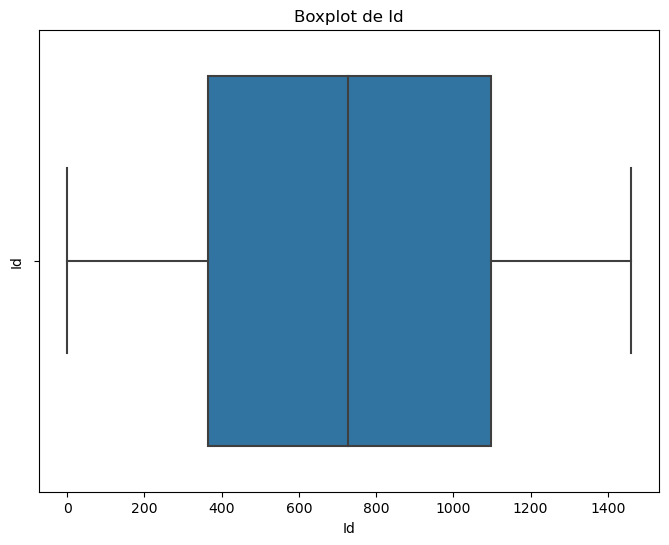

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


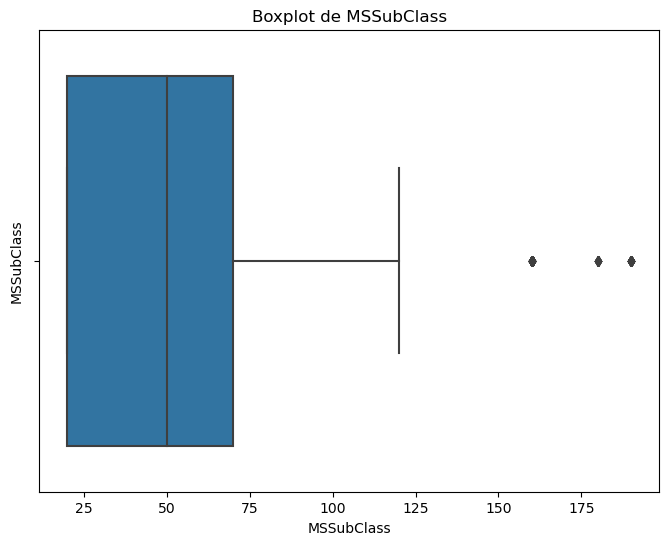

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


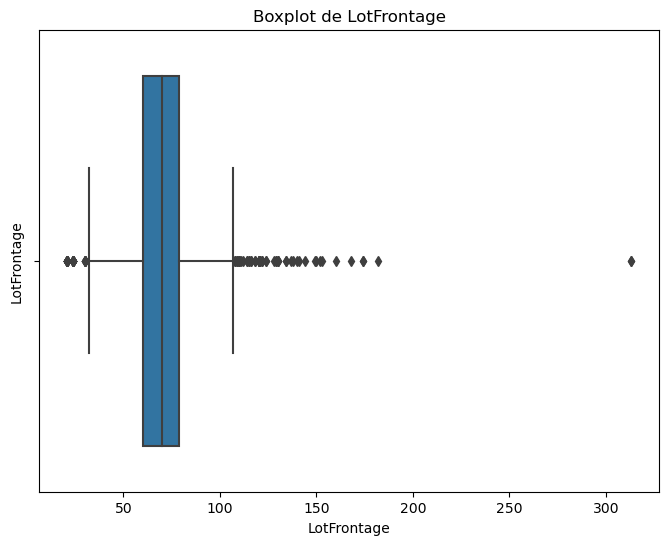

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


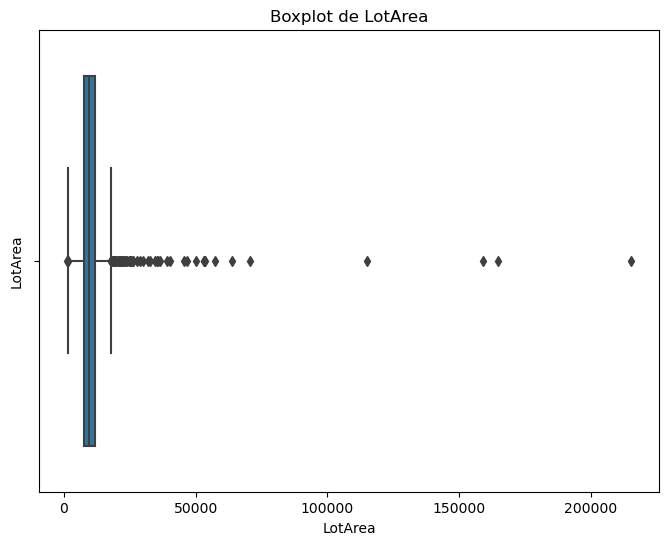

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


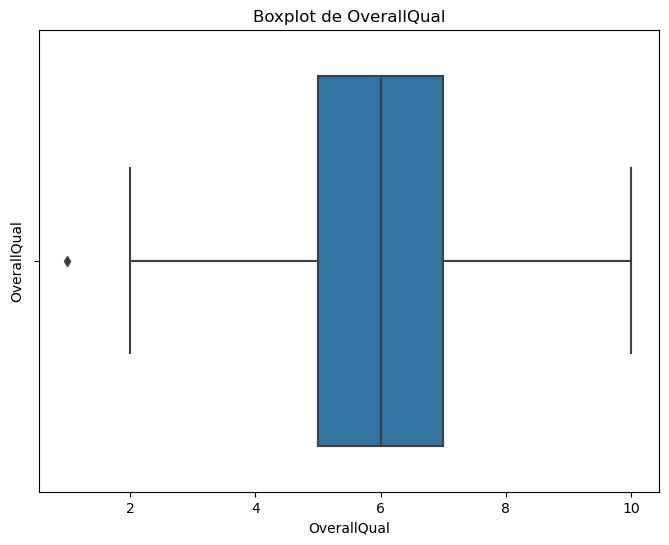

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


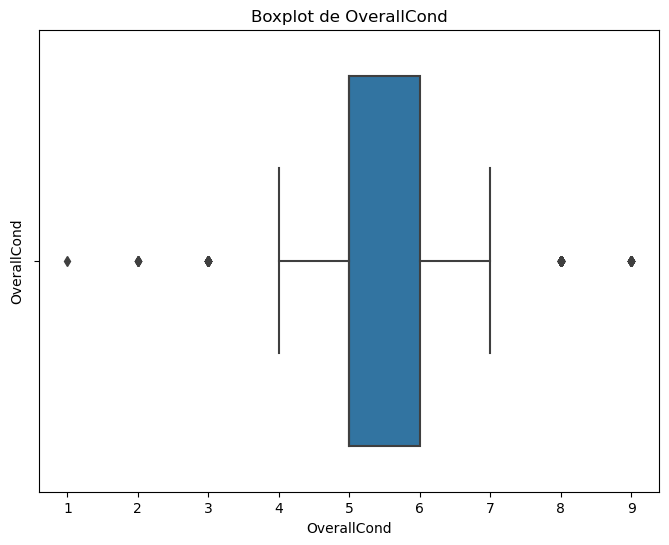

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


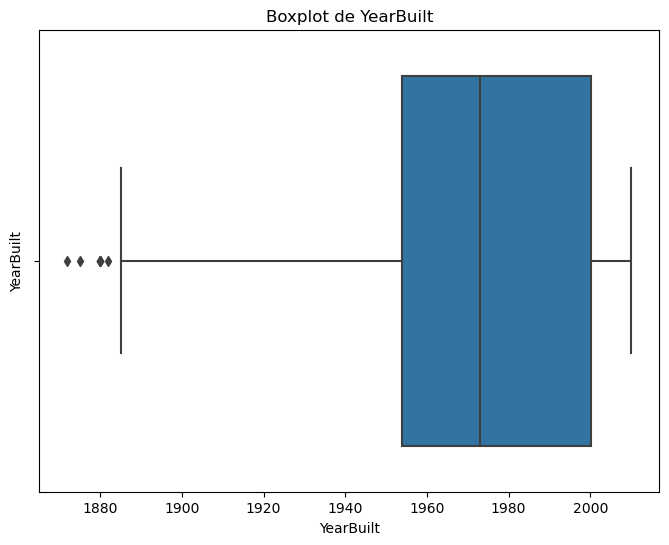

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


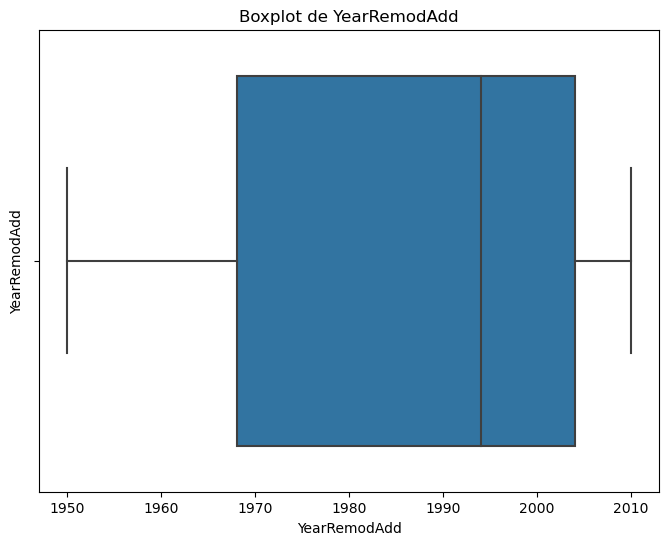

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


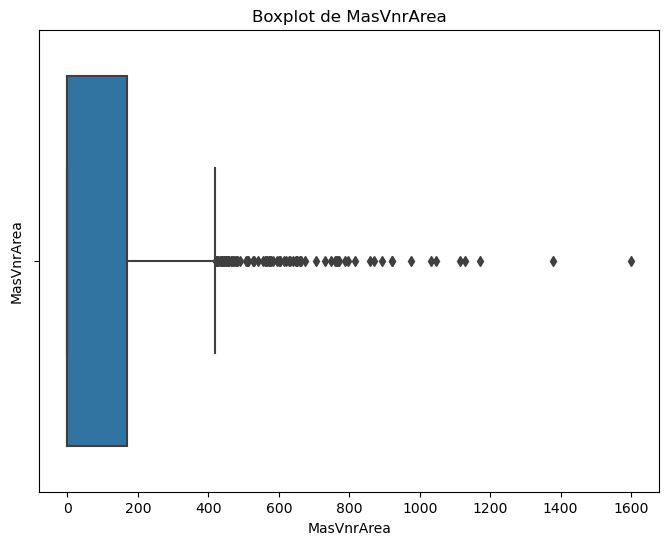

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


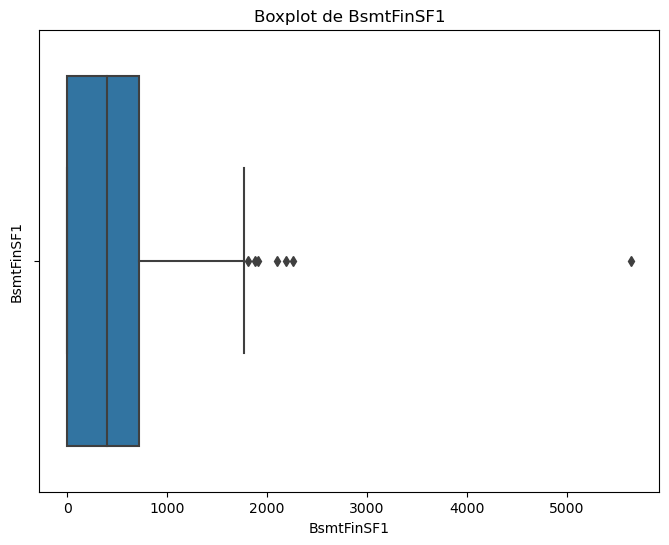

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


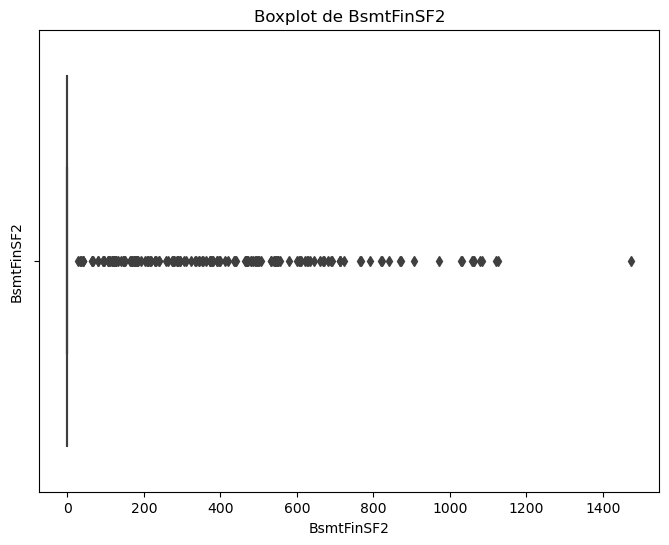

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


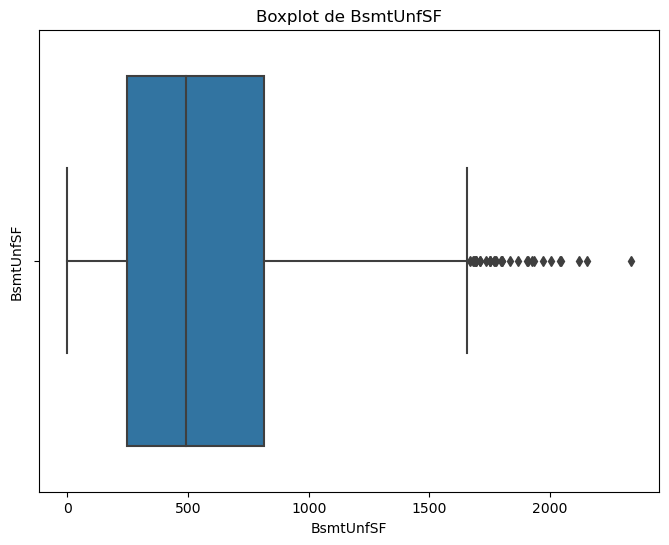

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


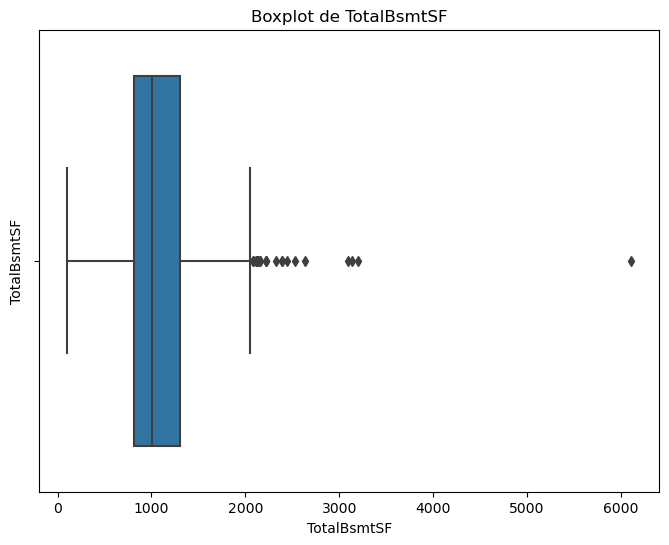

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


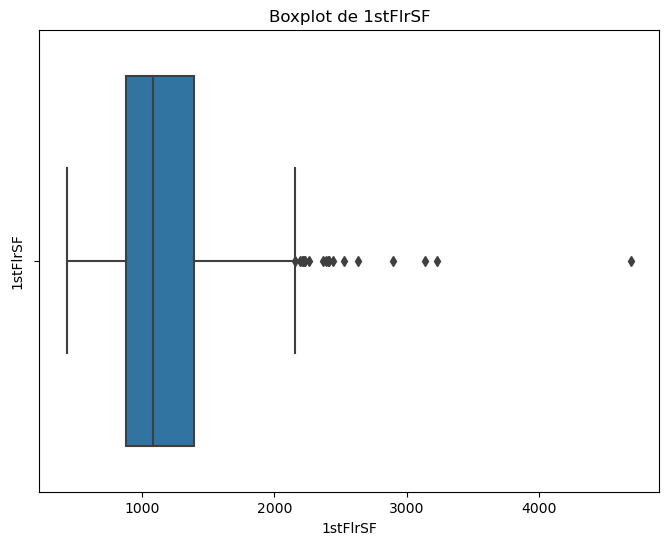

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


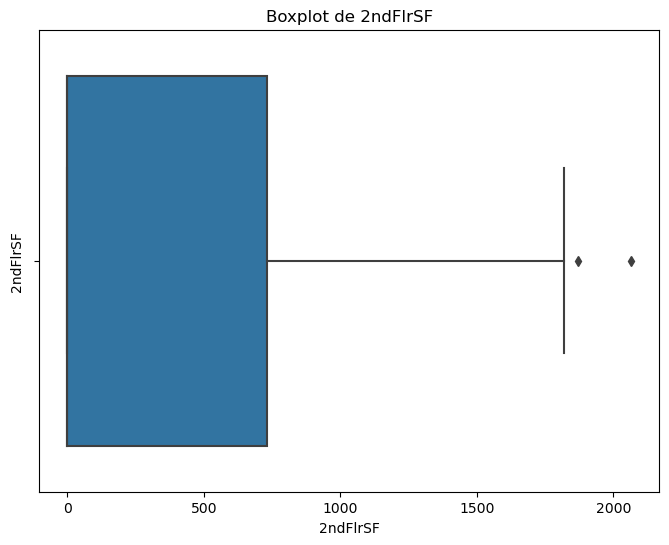

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


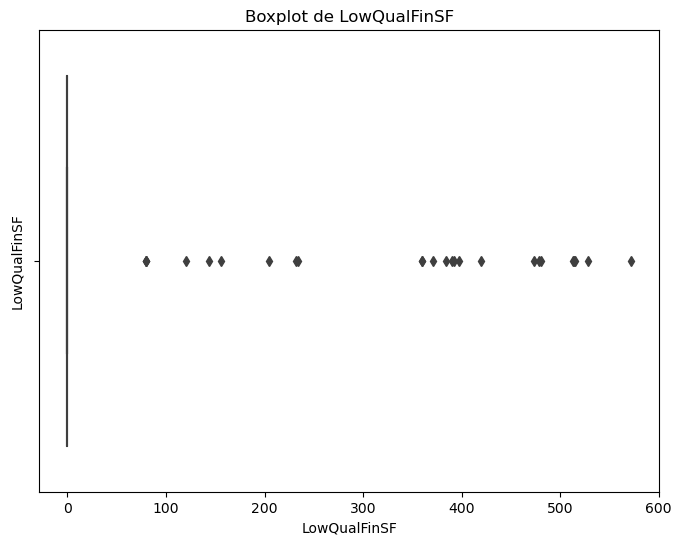

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


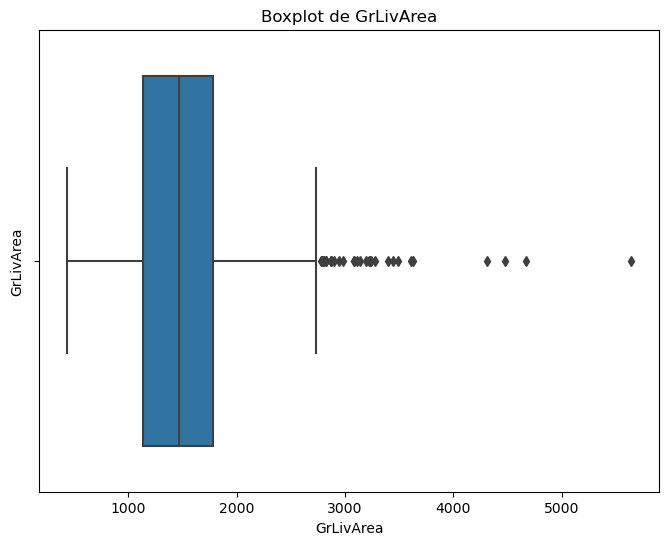

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


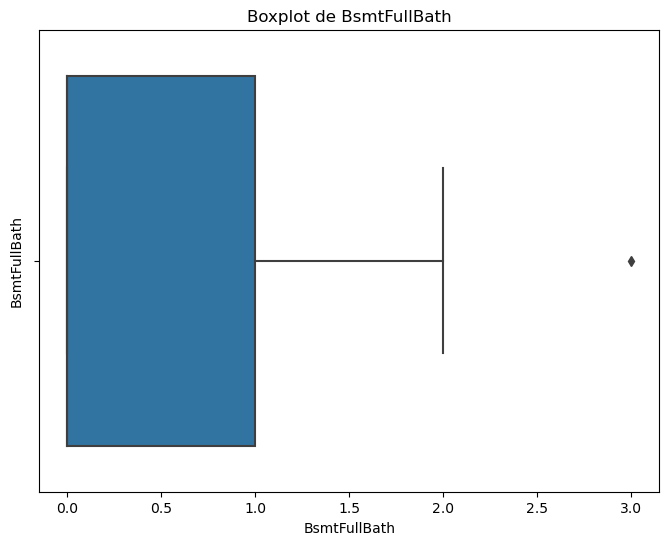

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


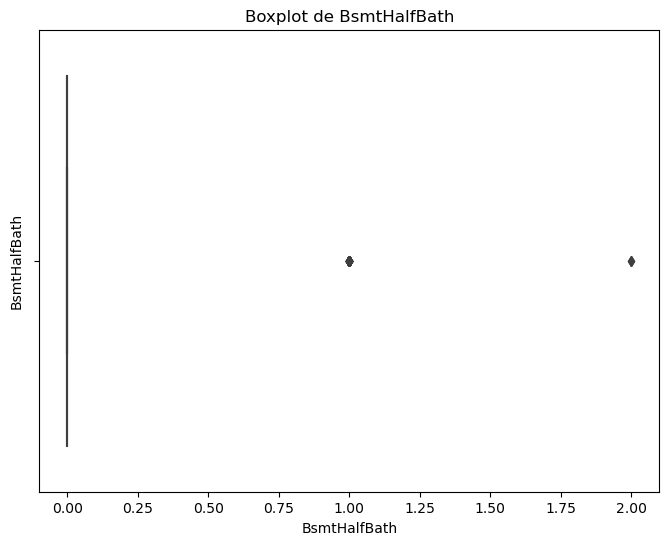

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


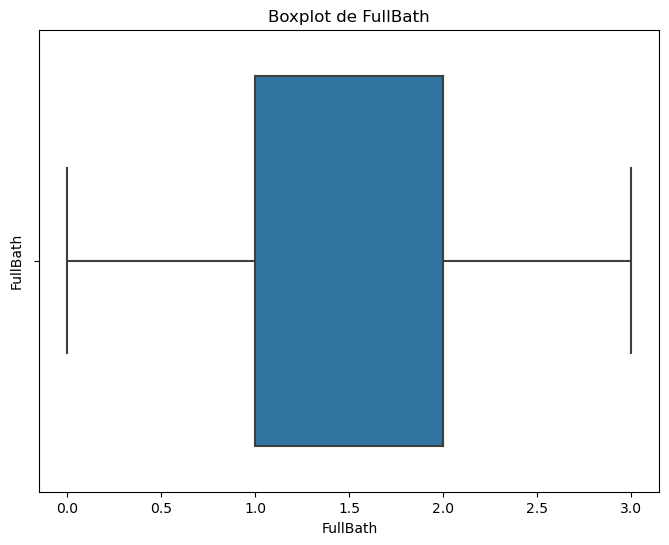

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


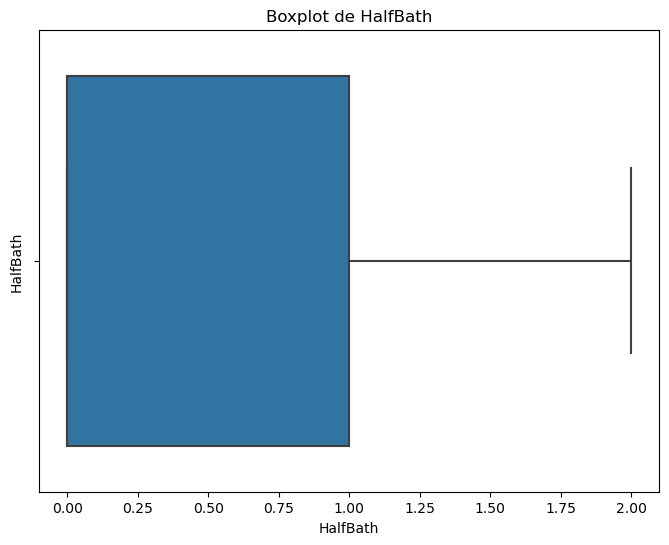

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


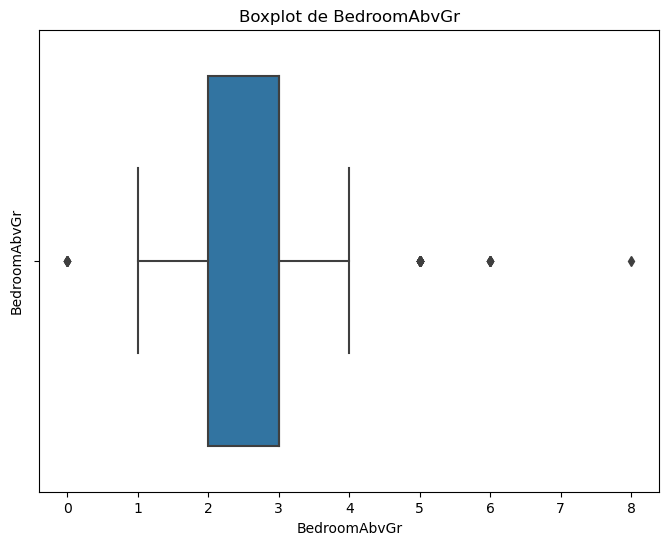

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


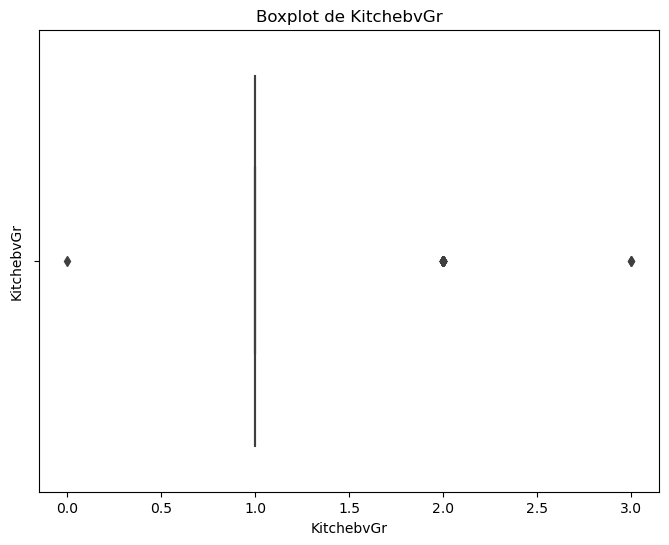

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


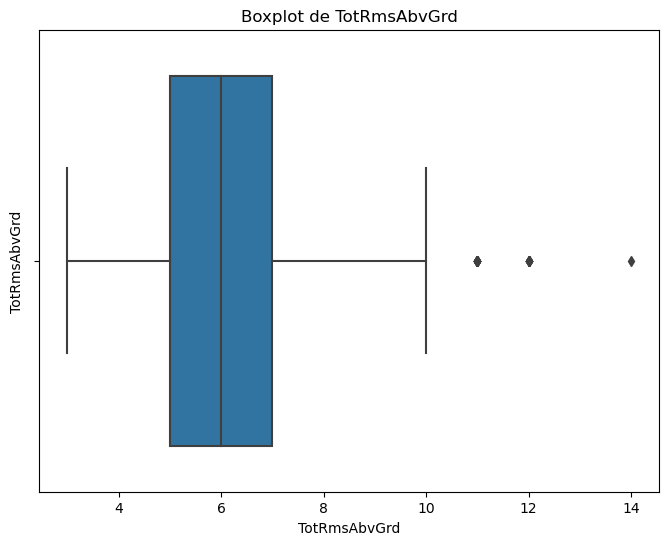

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


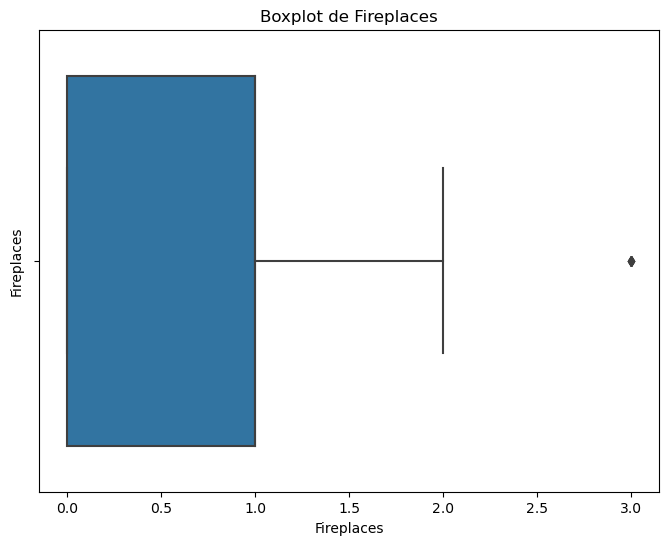

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


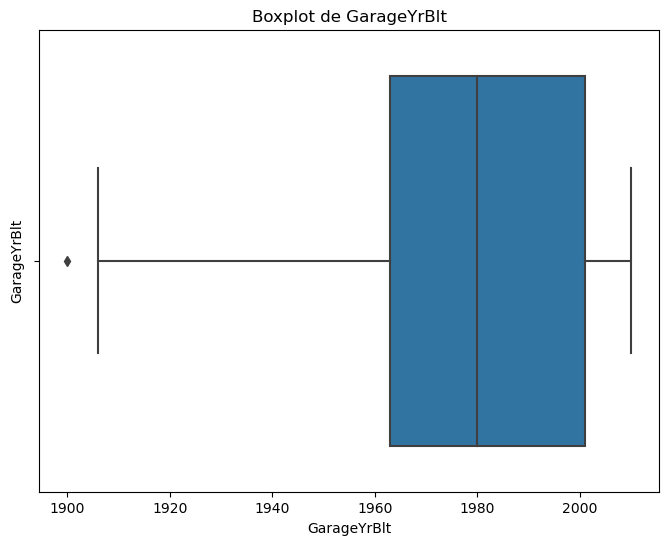

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


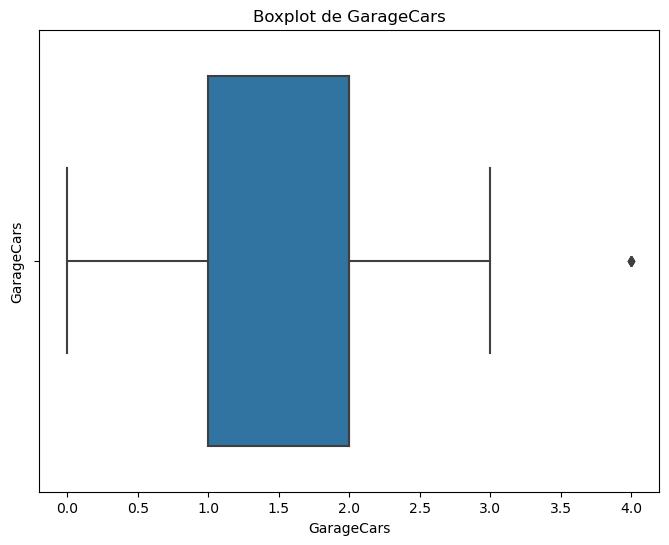

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


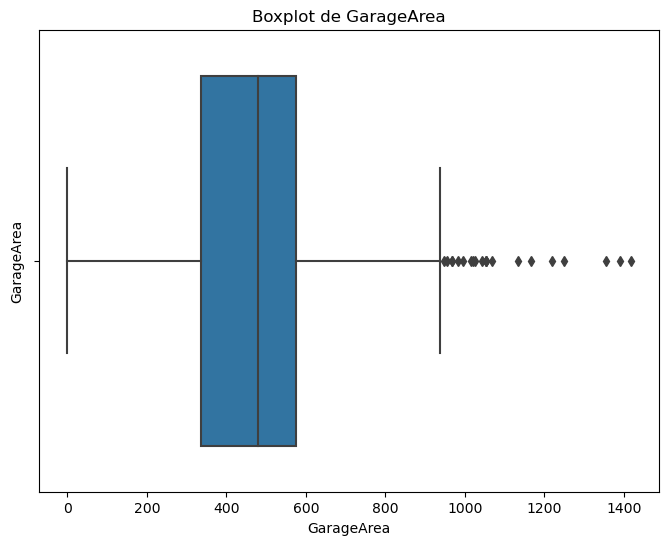

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


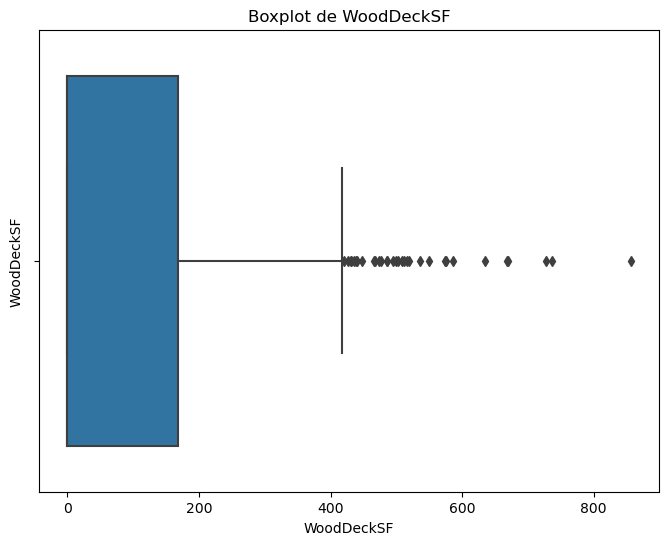

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


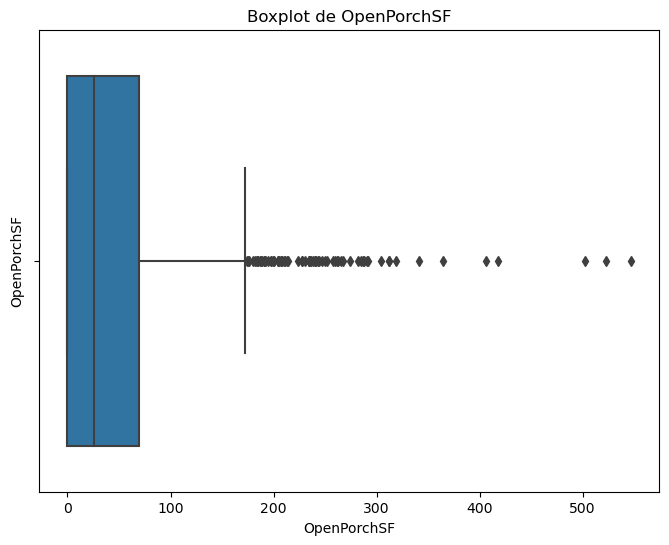

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


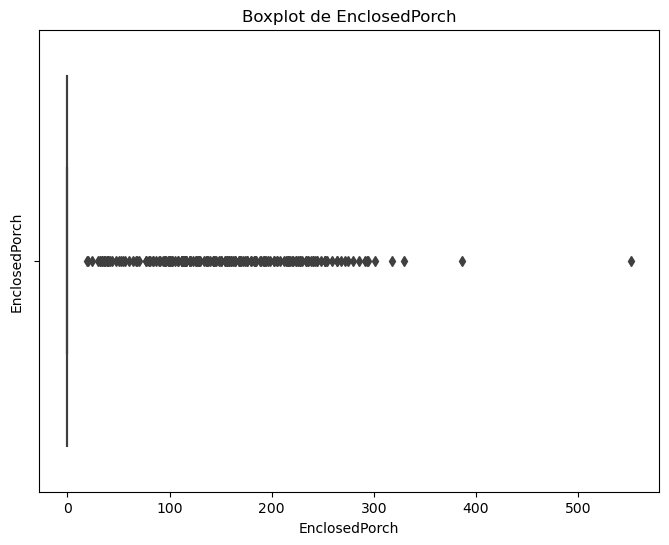

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


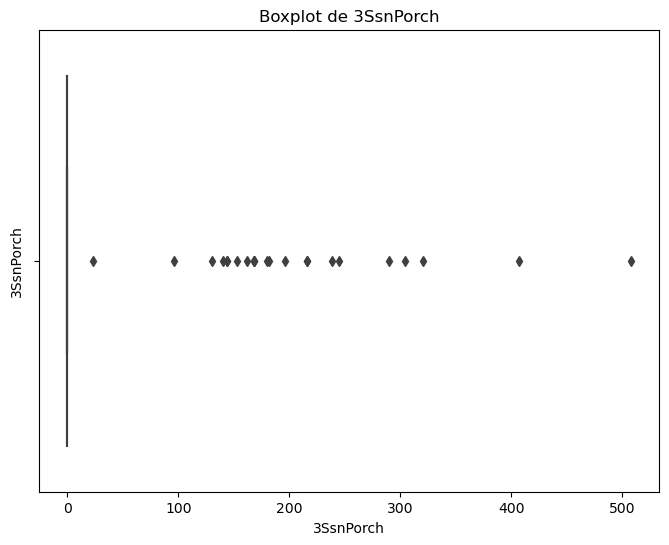

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


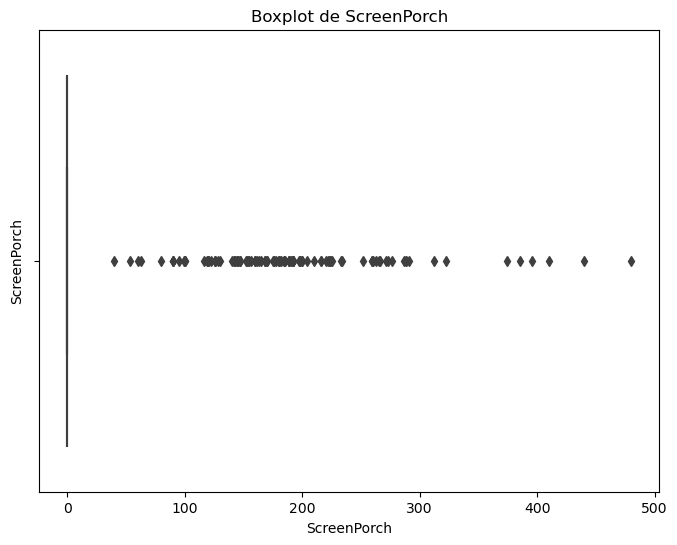

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


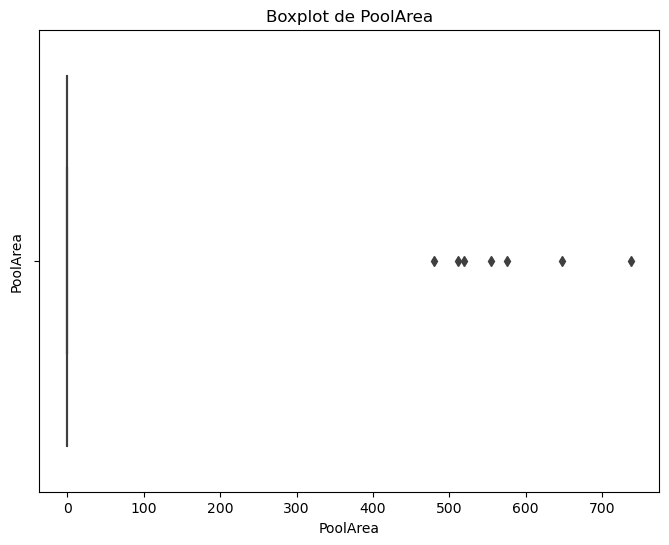

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


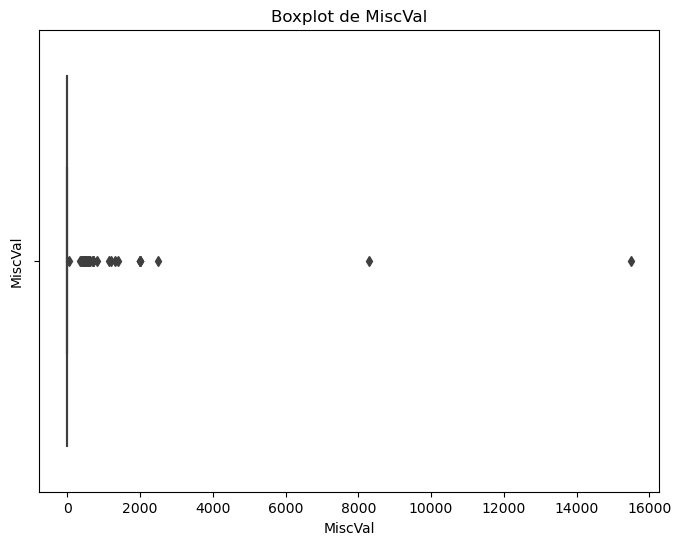

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


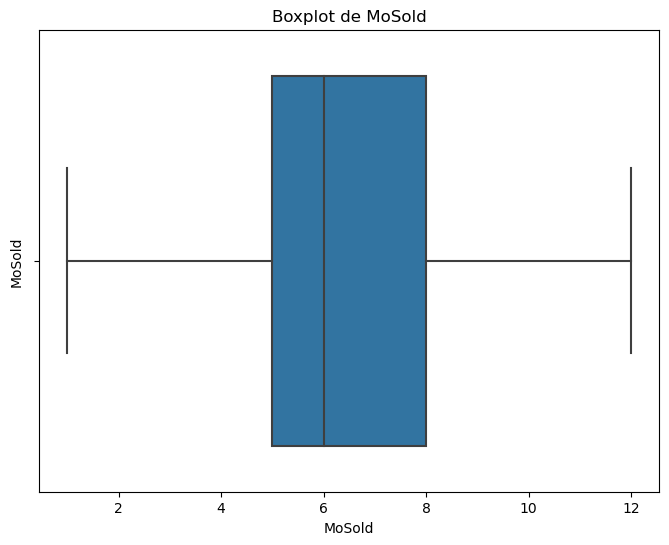

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


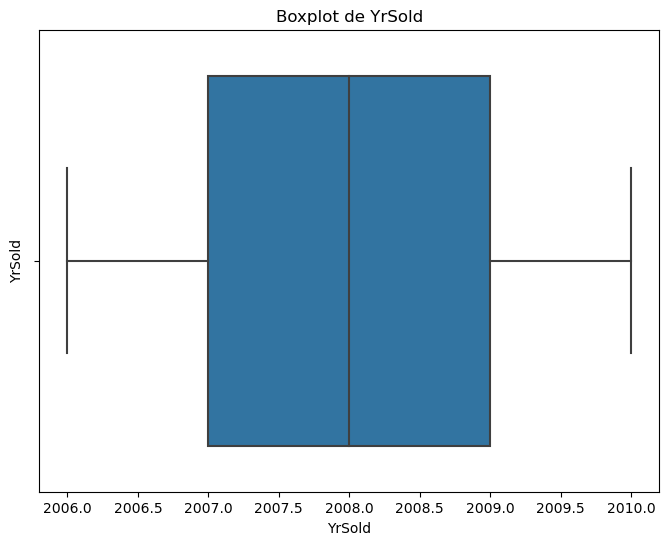

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


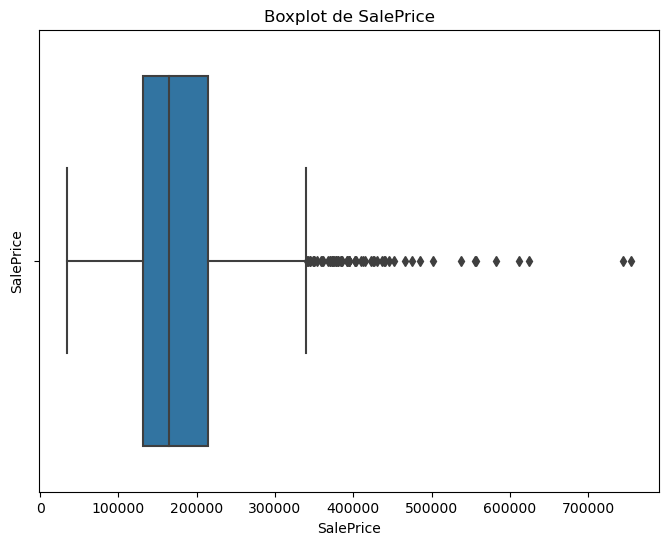

In [22]:
columnas_numericas = df_limpio.select_dtypes(include=['number'])

for columna in columnas_numericas.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_limpio[columna], orient='vertical')
    plt.title(f'Boxplot de {columna}')
    plt.ylabel(columna)
    plt.show()

<i>Aplicaremos el método del rango intercuartílico a todos las columnas numéricas que reflejan datos atípicos en se grafica, exceptuando las columnas "LowQualFinSF", "BsmtHalfBath", "KitchebvGr", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea" y "MiscVal", las cuales ni siquiera presentan los cuartiles y de aplicar este método en estas columnas, perderíamos la totalidad de los registros de nuestro data set.  
Es importante que conservemos estas columnas, ya que necesitamos profundizar en el análisis si estos datos son producto de un error o son importantes para la predicción de la variable o se pueden corregir aplicando algún otro método.</i>

In [23]:
def aplicar_iqr_a_columnas(df):
    # Aplicar el rango intercuartílico para cada columna numérica
    for columna in df.select_dtypes(include=['number']).columns:
        if columna not in ["Id", "YearRemodAdd", "FullBath", "HalfBath", "GarageYrBlt", "MoSold", "YrSold", "LowQualFinSF", "BsmtFinSF2", "BsmtHalfBath" ,"KitchebvGr", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal" ]:
            q3 = df[columna].quantile(0.75)
            q1 = df[columna].quantile(0.25)
            iqr = q3 - q1
            lsuperior = q3 + (1.5 * iqr)
            linferior = q1 - (1.5 * iqr)
            df = df[(df[columna] > linferior) & (df[columna] < lsuperior)]

    return df

# Aplicar el método del rango intercuartílico a columnas numéricas excluyendo las especificadas
df_limpio = aplicar_iqr_a_columnas(df_limpio)

<ul>
    <li>Graficos antes despues del tratamiento</li>
</ul>

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


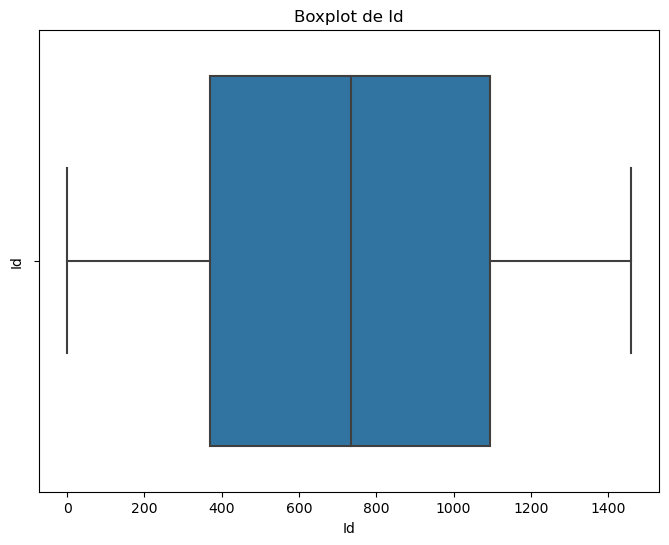

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


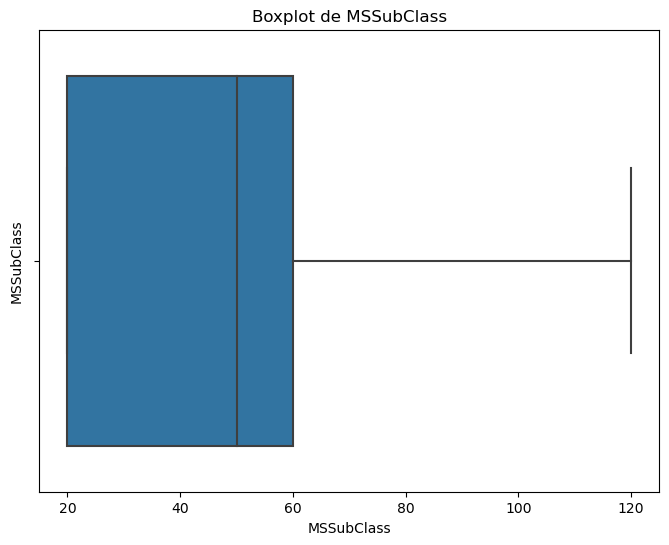

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


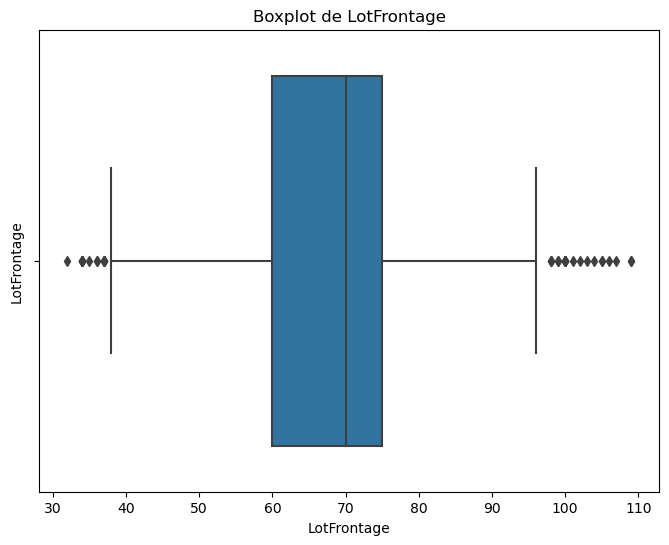

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


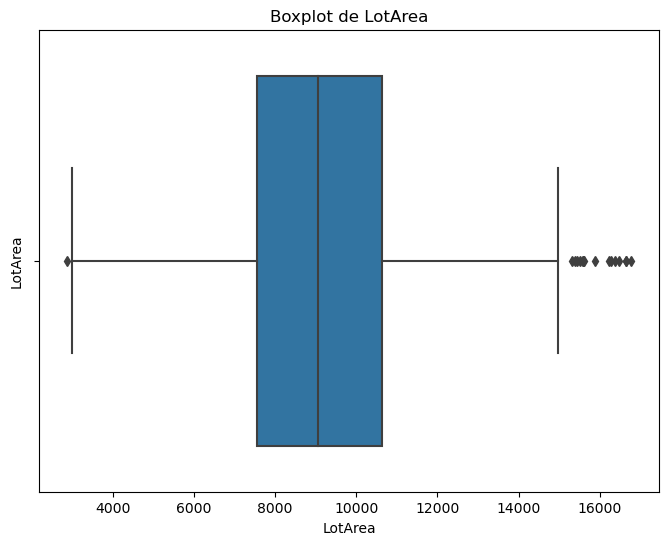

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


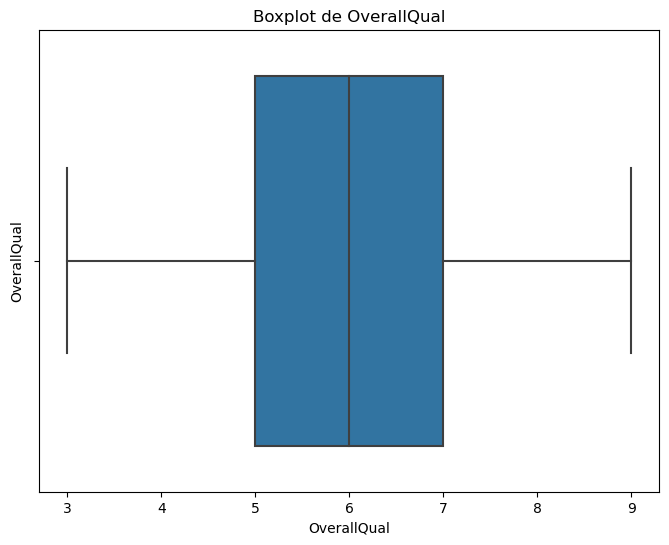

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


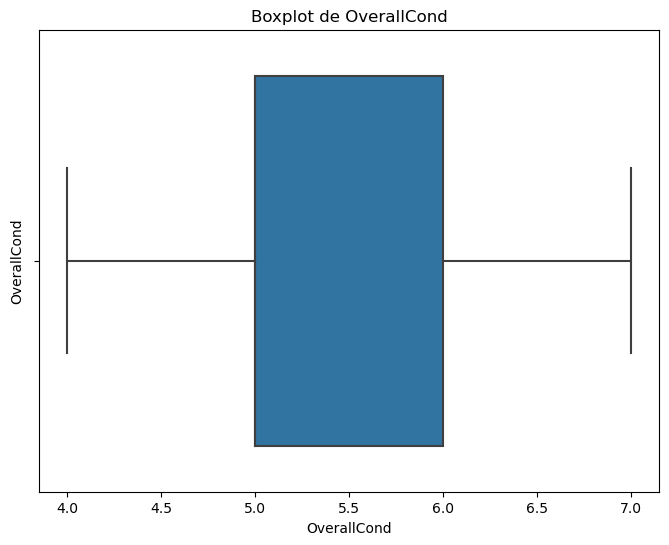

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


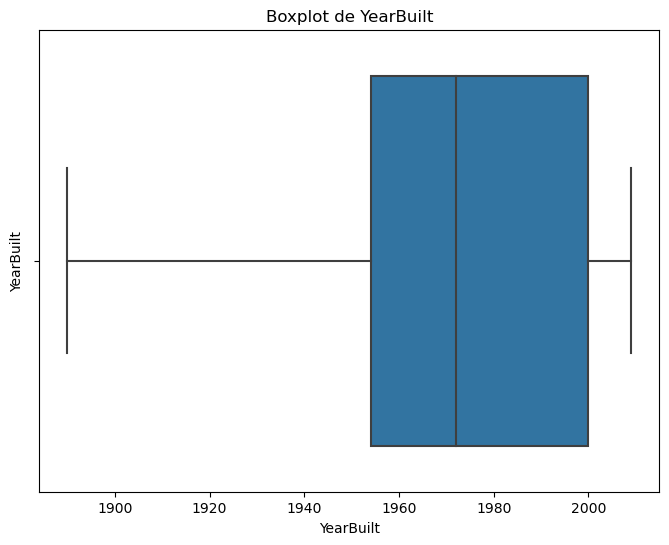

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


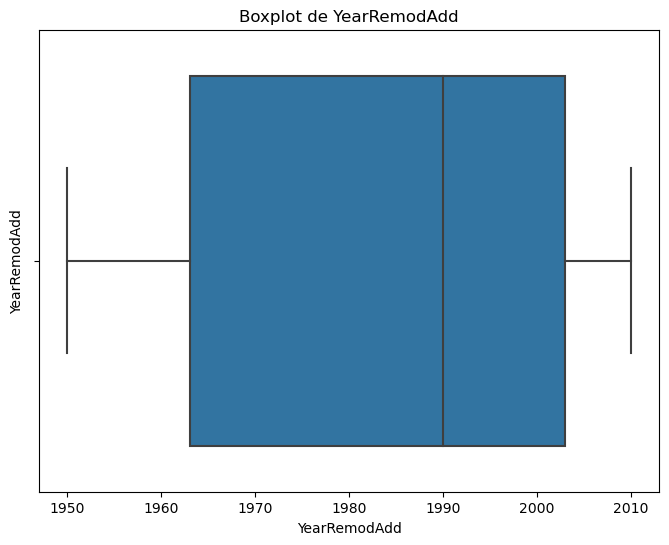

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


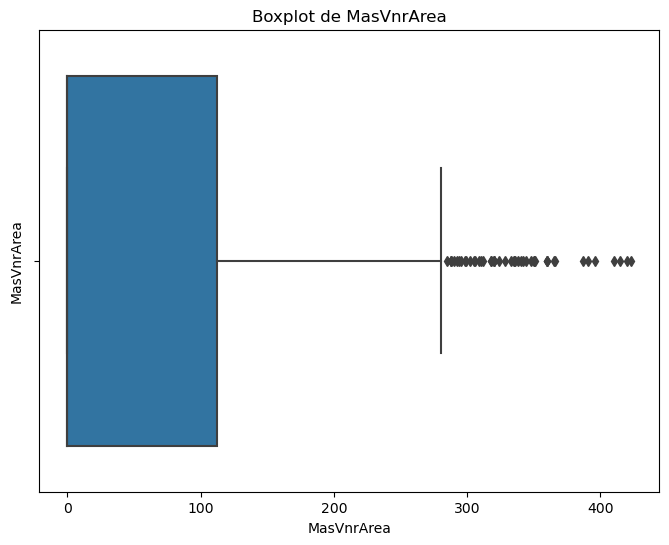

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


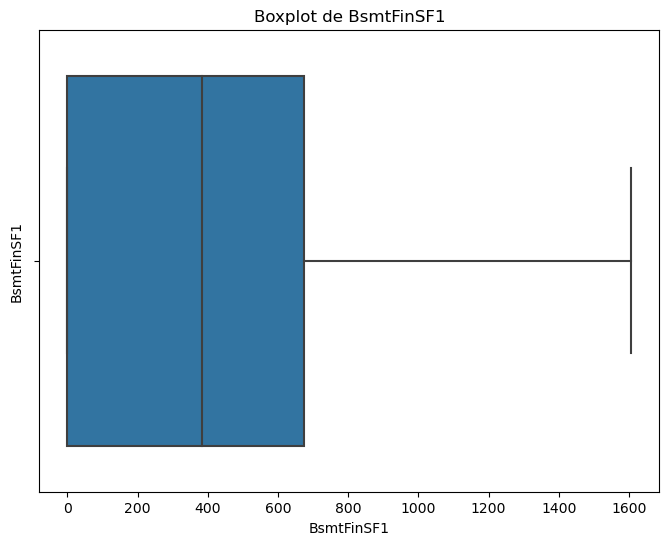

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


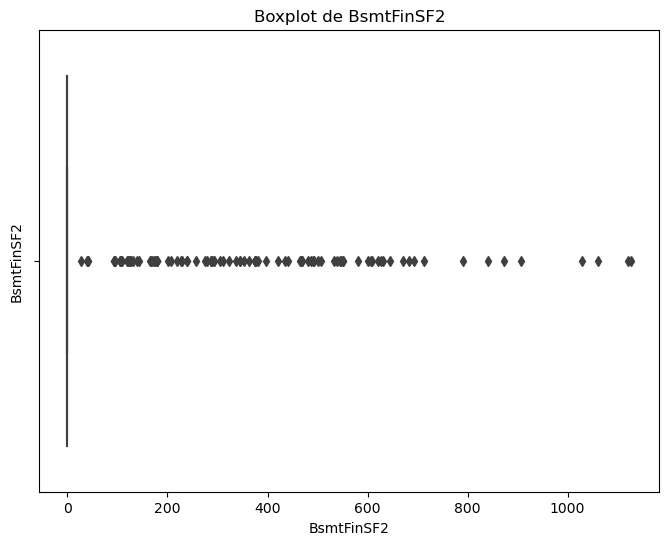

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


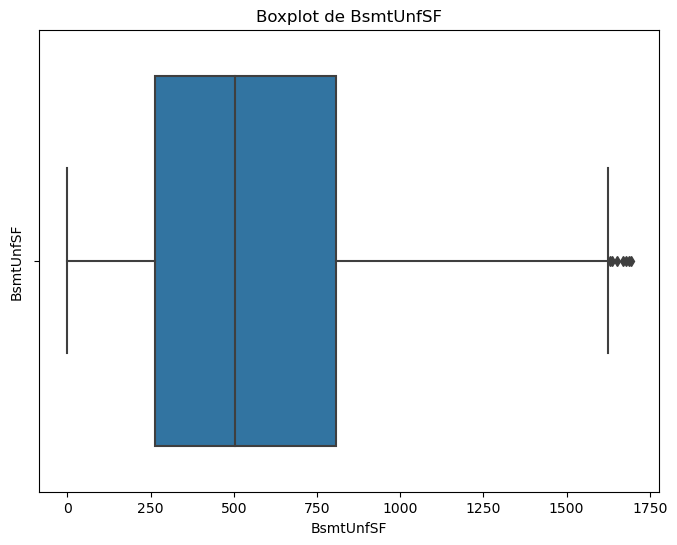

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


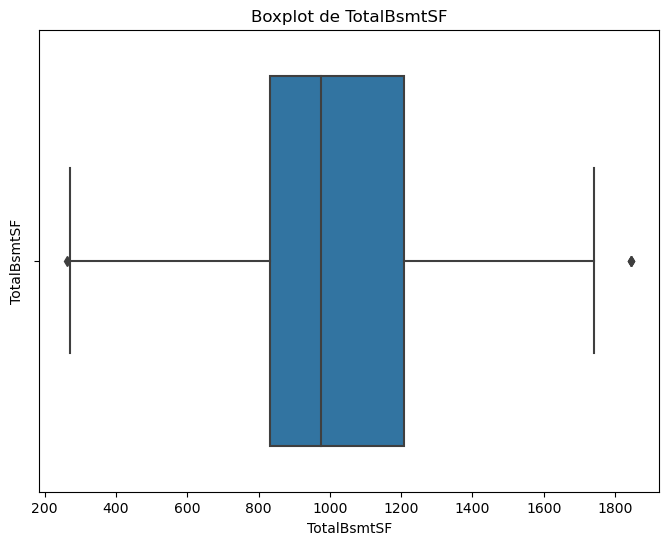

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


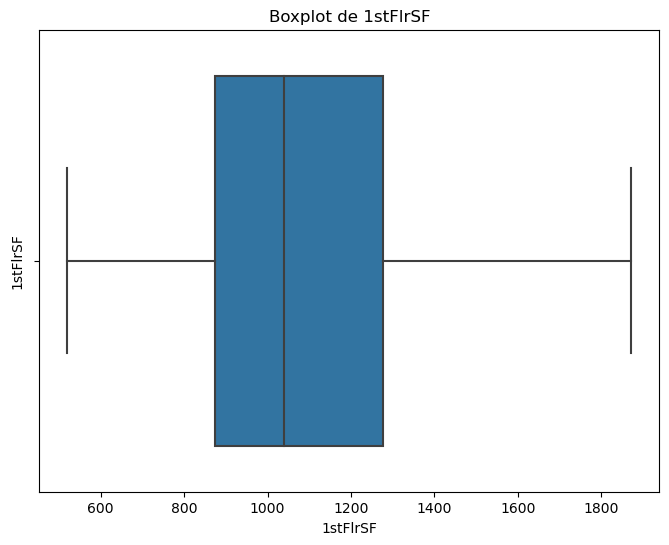

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


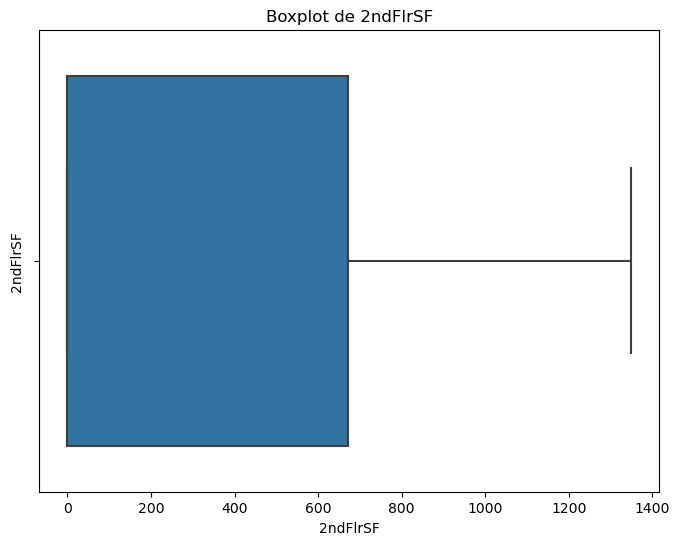

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


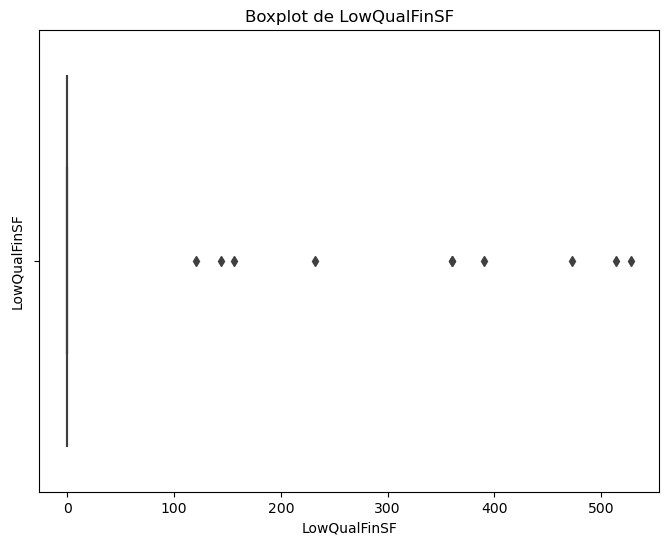

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


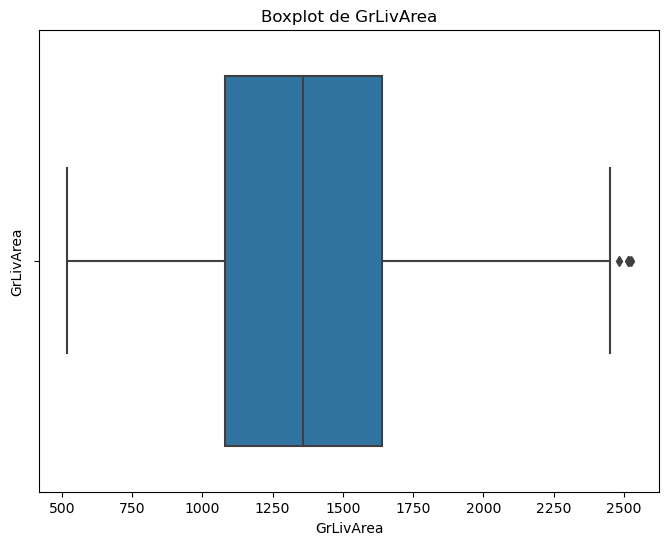

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


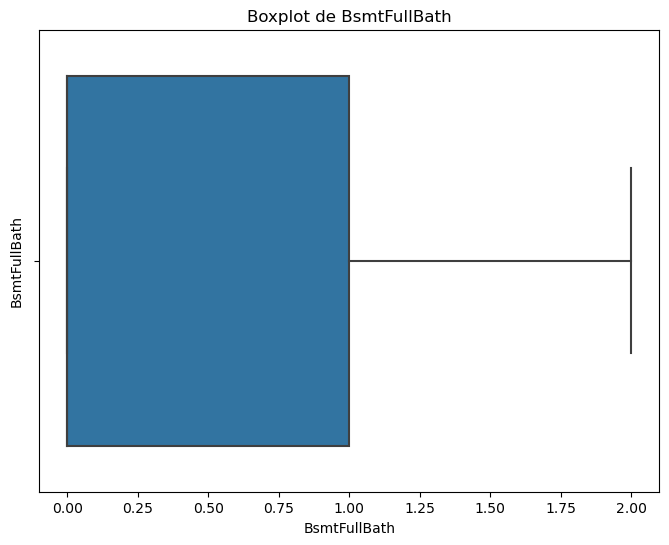

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


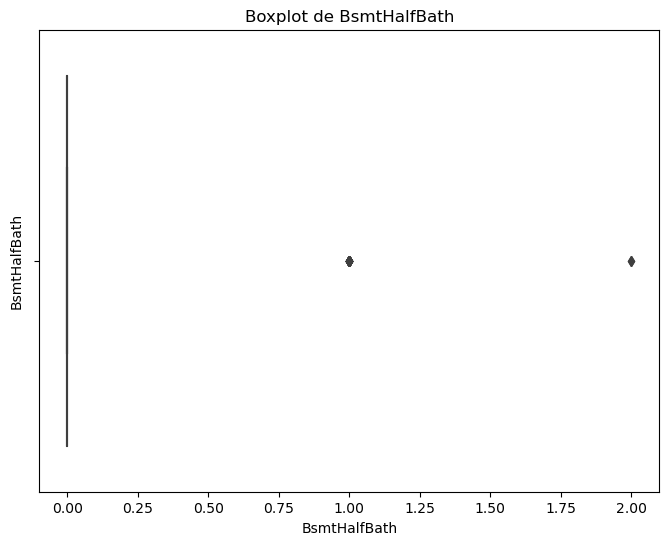

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


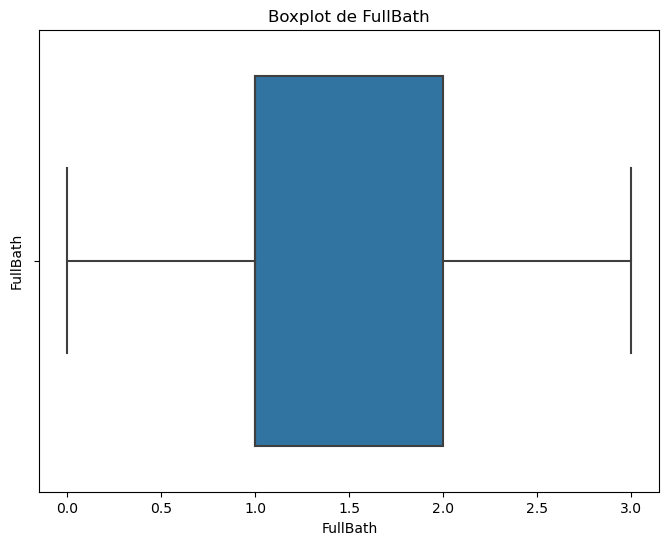

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


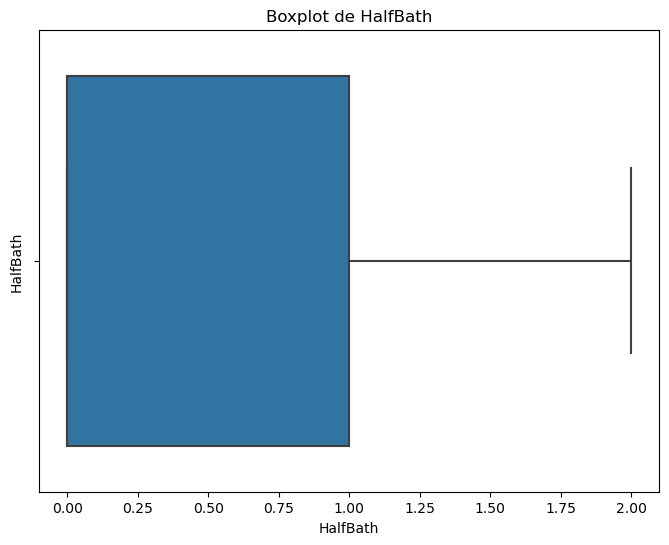

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


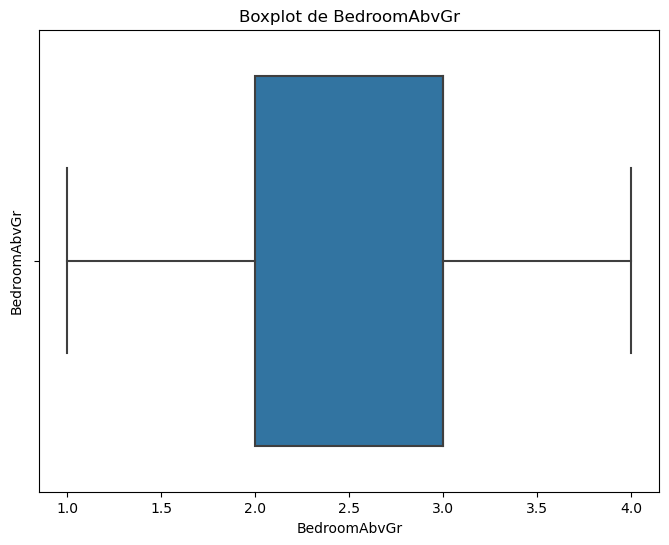

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


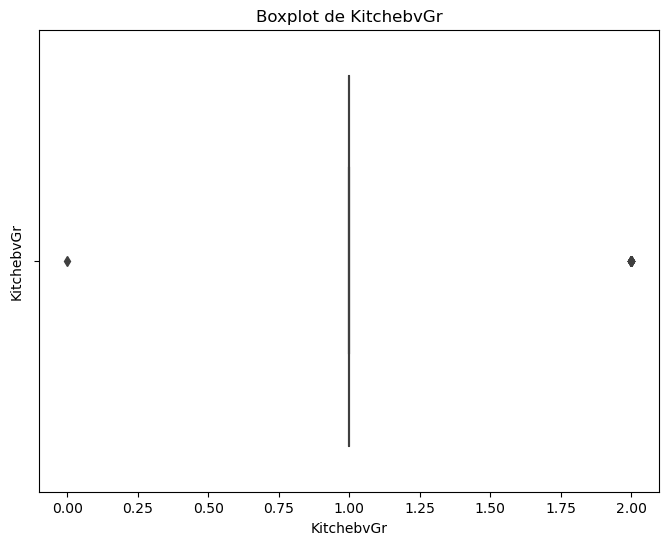

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


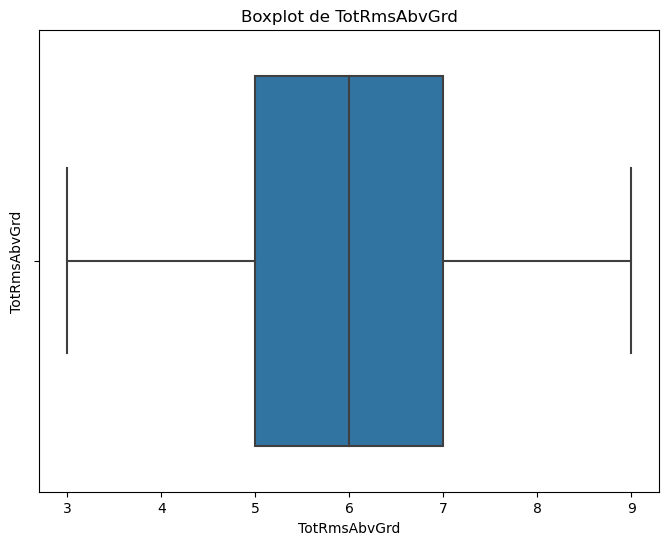

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


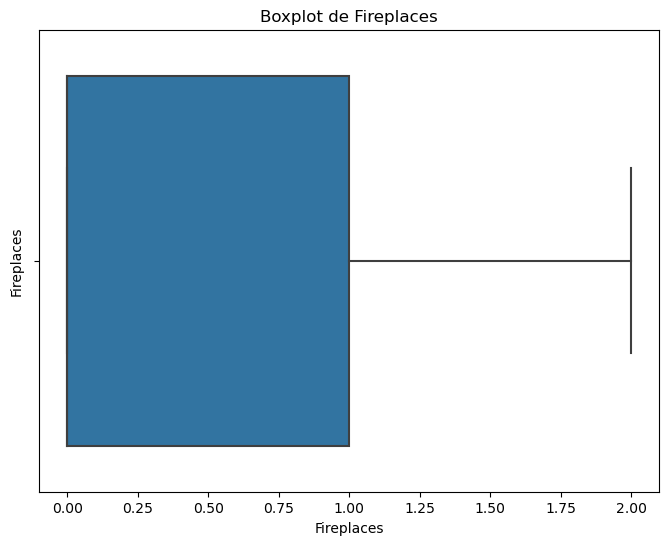

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


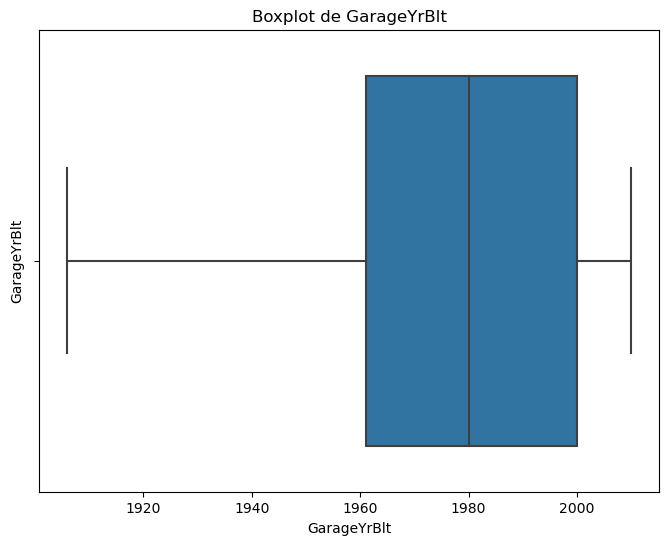

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


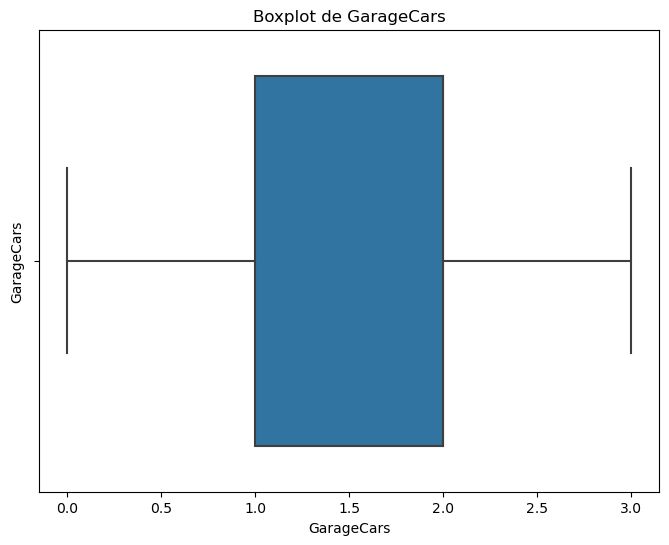

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


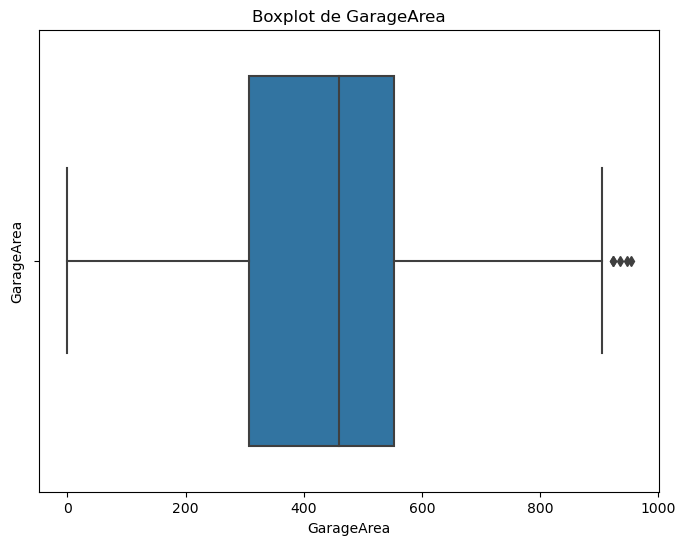

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


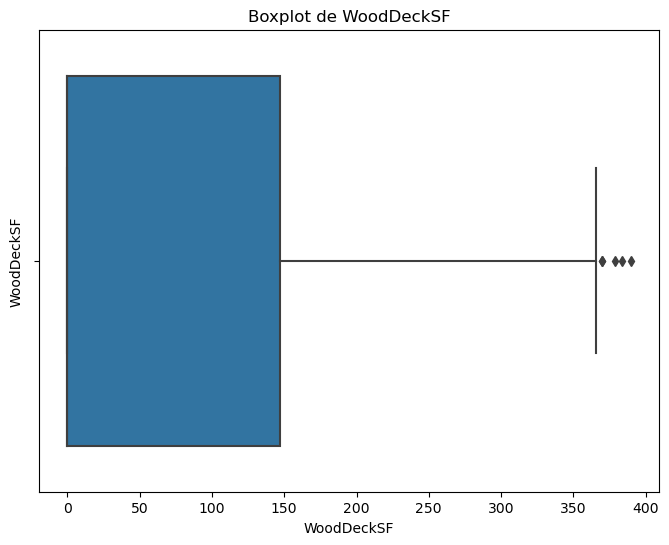

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


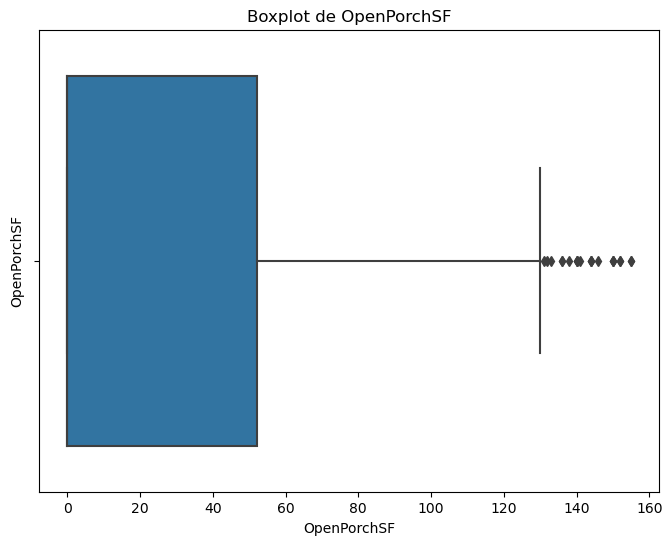

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


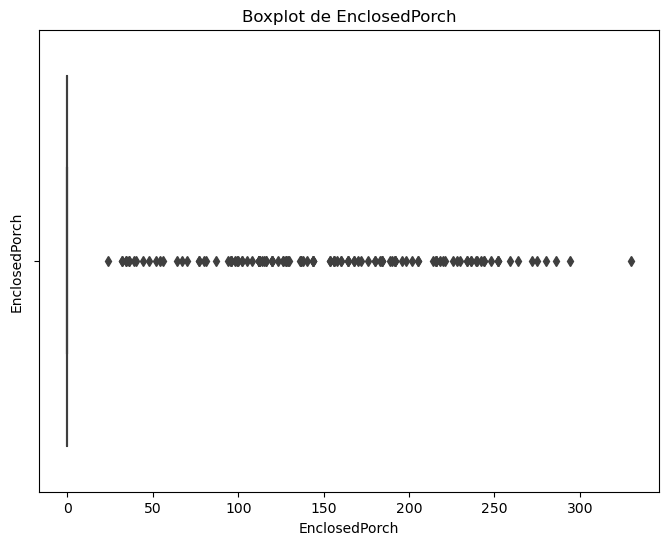

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


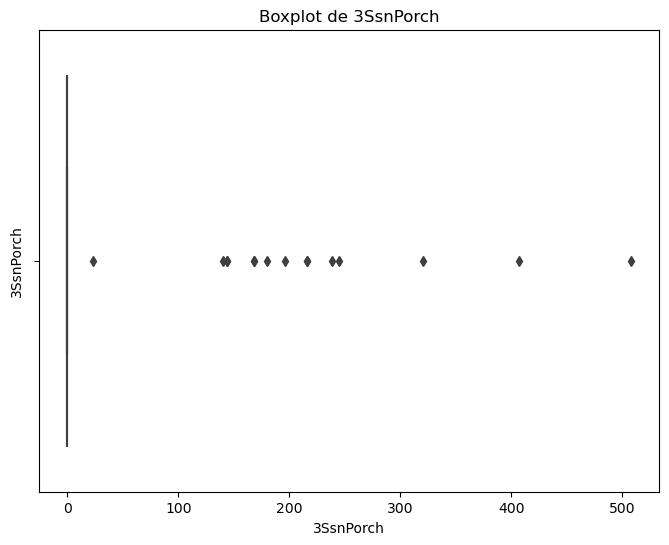

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


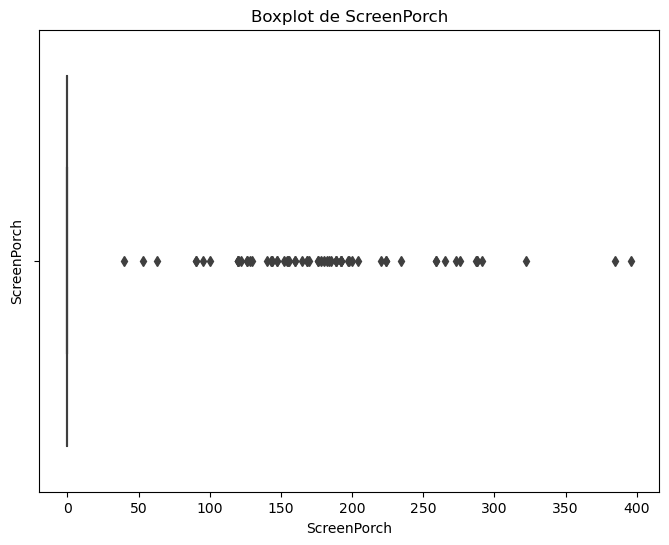

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


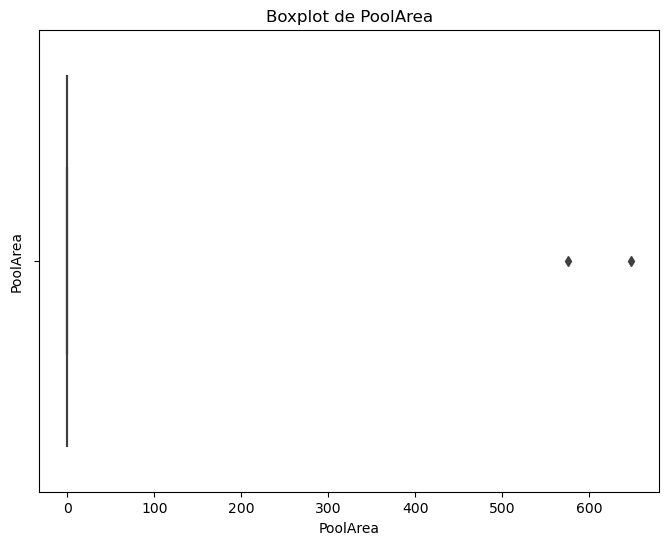

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


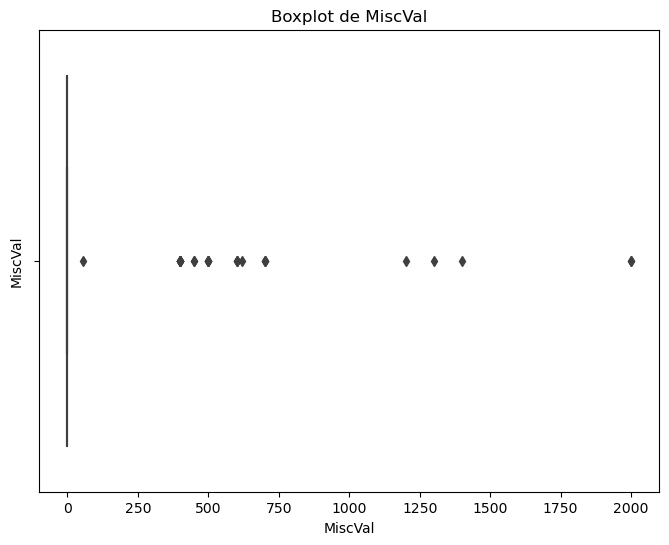

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


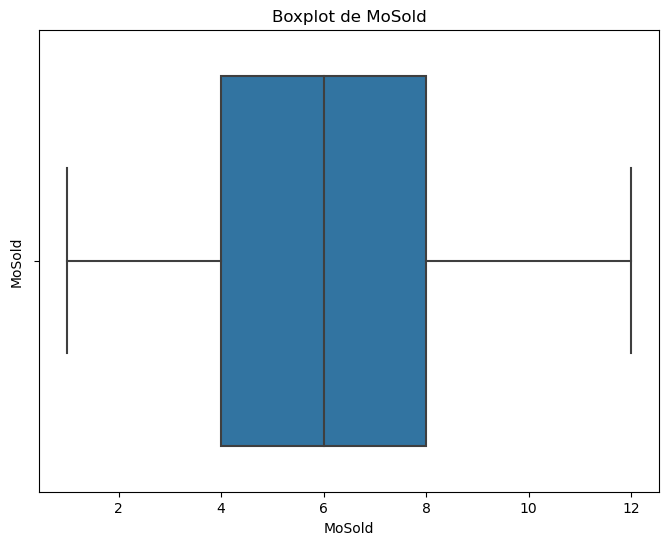

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


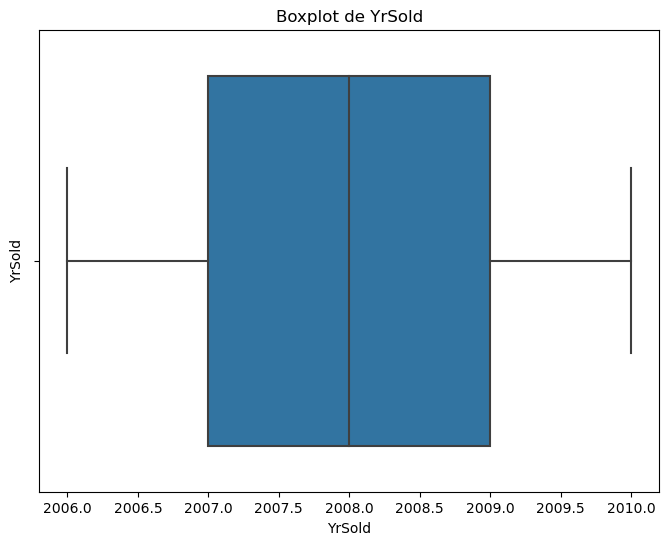

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


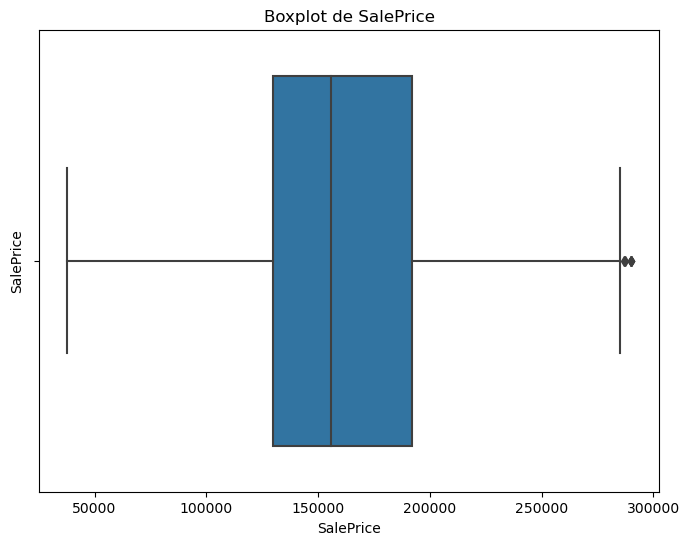

In [24]:
columnas_numericas = df_limpio.select_dtypes(include=['number'])

for columna in columnas_numericas.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_limpio[columna], orient='vertical')
    plt.title(f'Boxplot de {columna}')
    plt.ylabel(columna)
    plt.show()

<i>Podemos observar que aún existe la presencia de datos anómalos en columnas a las cuales se les realizó el tratamiento, pero la gran mayoría si eliminaros estos datos atípicos, por otro lado, hubo una perdida significativa de datos.  </i>

### Paso 4: En base a la exploración previa (paso 3 del análisis y exploración), determinar si alguna columna puede ser categorizada y realizar la categorización.

<ul>
<li>Determinar si es viable la categorizacion</li>
</ul>

In [25]:
col_categoricas = df_limpio.select_dtypes(include=['object']).columns

for col in col_categoricas:
     print(f"Informacion de la columna {col}")
     print(f"Cantidad de datos unicos en la columna:",df_limpio[col].nunique())
     print('Lista de valores unicos: ')
     print(df_limpio[col].unique().tolist())
     print('')

Informacion de la columna MSZoning
Cantidad de datos unicos en la columna: 5
Lista de valores unicos: 
['RL', 'RM', 'C (all)', 'FV', 'RH']

Informacion de la columna Street
Cantidad de datos unicos en la columna: 2
Lista de valores unicos: 
['Pave', 'Grvl']

Informacion de la columna LotShape
Cantidad de datos unicos en la columna: 4
Lista de valores unicos: 
['Reg', 'IR1', 'IR2', 'IR3']

Informacion de la columna LandContour
Cantidad de datos unicos en la columna: 4
Lista de valores unicos: 
['Lvl', 'Bnk', 'HLS', 'Low']

Informacion de la columna Utilities
Cantidad de datos unicos en la columna: 1
Lista de valores unicos: 
['AllPub']

Informacion de la columna LotConfig
Cantidad de datos unicos en la columna: 5
Lista de valores unicos: 
['Inside', 'Corner', 'FR2', 'CulDSac', 'FR3']

Informacion de la columna LandSlope
Cantidad de datos unicos en la columna: 3
Lista de valores unicos: 
['Gtl', 'Mod', 'Sev']

Informacion de la columna Neighborhood
Cantidad de datos unicos en la columna:

<i>Sí, ya que la gran mayoría de columnas presentan valores únicos bajos, si es viable la categorización en la gran mayoría, en aquellas columnas cuyos valores únicos rondan de entre 10 a los 30  es complicado considerar si es posible categorizar para diminuir el número, porque la columna cuenta con abreviaturas las cuales complican el proceso.</i>

<br>

<i>Ya que nuestro objetivo es transformar a numérico, categorizaré todas las columnas vuyo valores unico no sea mayor a 5 y más adelante, trataremos las restantes. </i>

In [26]:
def categorizar_columnas_objeto(df):
    col_objeto = df.select_dtypes(include=['object']).columns

    for col in col_objeto:
        # Verificar si la columna tiene de 1 a 5 valores únicos
        if 1 <= df[col].nunique() <= 5:
            df[col] = df[col].astype('category')

    return df


df_limpio = categorizar_columnas_objeto(df_limpio)

In [27]:
print(df_limpio.dtypes)

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
MoSold              int64
YrSold              int64
SaleType           object
SaleCondition      object
SalePrice           int64
Length: 77, dtype: object


### Paso 5: De las columnas categorizadas, buscar si hay inconsistencias, en caso de que las haya, hay que mostrarlas y tratarlas.

<i>Esta parte es una de las más complicadas del análisis, el data set está muy abreviado, y con él no se proporcionó diccionarios para saber el significado.
Así que a simple vista es muy complicado determinar si alguno de los valores presentado es inconsistente, retomando un poco los histogramas que observamos anteriormente, existen columnas que presentan pocos datos en los valores categóricos que presentan, las cargas de datos recen en una sola categoría, por lo cual se debería de analizar si a fondo si estos comportamientos son normales o nos encontramos ante un data set con datos que no son de calidad. </i>

<br>

<i>Por ejemplo, en las columnas donde esperaríamos únicamente un (Y o N) como un "YES" o "NO", columna "PavedDrive" se cuela una tercera categoria denominada "P", pero a ciencia cierta no podemos determinar que estamos ante una inconsistencia porque este dato podría tal vez representar un "Parcialmente".</i>

<i>Decidí conservar las categorías que se presentan esperando que el proceso de transformación a numérico no se complique más adelante.</i>

## Manipulación y preparación de los datos.

### Paso 1: Mostrar la matriz de correlación de nuevo, identificar las columnas que más esté correlacionadas con "SalePrice", mostrar numéricamente las 10 variables que estén correlacionadas más fuertemente a la variable objetivo.

<ul>
<li>Matriz de correlacion</li>
<ul>

<Axes: >

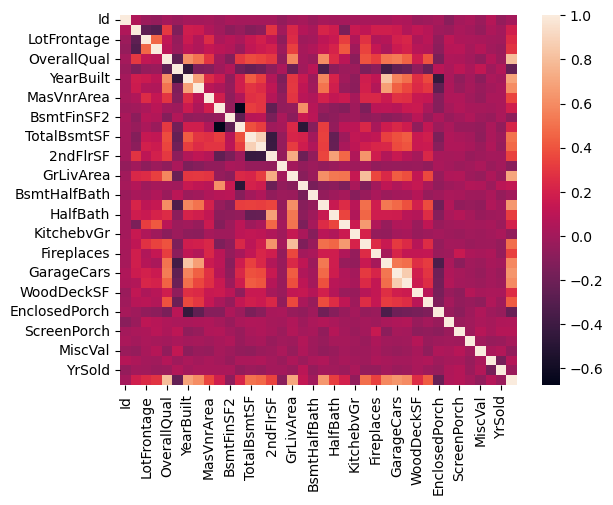

In [28]:
sns.heatmap(df_limpio.corr(numeric_only=True))

<ul>
<li>Identificar las 10 variables mas correlacionadas con "SalePrice" </li>
<ul>

In [29]:
# Calcular la matriz de correlación
correlation_matrix = df_limpio.corr()

# Obtener las correlaciones con respecto a "SalePrice" y ordenarlas en orden descendente
correlations_with_saleprice = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Mostrar numéricamente las 10 variables más correlacionadas con "SalePrice"
top_correlations = correlations_with_saleprice[1:11]  # Excluimos "SalePrice" de la lista
print(top_correlations)

OverallQual     0.797365
GrLivArea       0.705481
YearBuilt       0.686693
FullBath        0.641272
GarageCars      0.637506
YearRemodAdd    0.600937
GarageArea      0.595094
GarageYrBlt     0.581372
TotalBsmtSF     0.503292
TotRmsAbvGrd    0.493020
Name: SalePrice, dtype: float64


C:\Users\brend\AppData\Local\Temp\ipykernel_1088\3092454504.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_limpio.corr()


### Paso 2: Responder las preguntas.
1. ¿Con las variables numéricas que se tienen es suficiente para predecir la variable objetivo?
2. ¿Alguna de las variables categóricas servirá realmente para determinar la variable objetivo?


1. ¿Con las variables numéricas que se tienen es suficiente para predecir la variable objetivo?

<i>Al listar las 10 variables más correlacionadas podemos deducir que entre los factores que más influyen en el precio de la casa/ vivienda son:
"OverallQual", la calidad general, tiene una correlación muy fuerte con el precio de venta, lo cual es esperado, ya que la calidad general de una casa suele estar relacionada con su precio. "YearBuilt", el año en que se construyó la casa. Las casas más nuevas suelen tener un precio más alto, "FullBath" el número de baños completos, "GarageCars" la Capacidad de la cochera. Un garaje con mayor capacidad suele asociarse con un precio de venta más alto. Imagino que "YearRemodAdd",  es el año en el que ocurrió la última remodelación, por lo general, las remodelaciones recientes pueden aumentar el valor de una casa.

entre otras como "GarageArea", "GarageYrBlt", "TotalBsmtSF" "TotRmsAbvGrd", que en general que son variables que representan la capacidad, tamaño y antiguedad de la casa. <br>

Factores que sin duda son de mucha ayuda, así que sí, considero que podrían ser suficientes para predecir la variable objetivo.</i>

<br>
2. ¿Alguna de las variables categóricas servirá realmente para determinar la variable objetivo?
<br>
<i>Sí, yo creo que aunque con las numéricas sería suficiente para realizar una buena predicción, tener información acerca de la calle, el vecindario y la zona (Columnas categóricas) en la que se ubica la casa/ vivienda podrían ser factores que influyan fuertemente en el costo de la misma.
Sin embargo, no podemos afirmar esto hasta que se realizase el proceso pertinente y checar la correlación que surja entre estas y la variable objetivo. </i>


### Paso 3: Conversión de categórico a numérico. Hay que seleccionar las columnas que ya fueron categorizadas y hay que sacar su valor con un "one-hot encoder", luego hay que agregarlas al dataset y eliminar su columna categórica. Hay que mostrar de nuevo las correlaciones para ver si cambiaron las variables más correlacionadas con la variable objetivo.

In [30]:
# Obtener columnas categóricas
columnas_categoricas = df_limpio.select_dtypes(include='category').columns

# Crear DataFrame 
df_limpio_V2 = df_limpio.copy()

# Aplicar one-hot encoding a todas las columnas categóricas
df_categoricas_encoded = pd.get_dummies(df_limpio_V2[columnas_categoricas])

# Concatenar las columnas codificadas al DataFrame original
df_limpio_V2 = pd.concat([df_limpio_V2, df_categoricas_encoded], axis=1)

# Eliminar las columnas categóricas originales
df_limpio_V2.drop(columns=columnas_categoricas, inplace=True)

In [31]:
print(df_limpio_V2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845 entries, 0 to 1458
Columns: 157 entries, Id to PavedDrive_Y
dtypes: float64(3), int64(35), object(11), uint8(108)
memory usage: 419.2+ KB
None


<i>Como era de esperarse, el one-hot encoder  agrego muchísimas columnas nuevas, pasamos de tener un data set con alrededor de 81 columnas, a tener un data set con 157 columnas, tanto que ahora es más difícil tratar de interpretar la matriz de correlación.</i>

<Axes: >

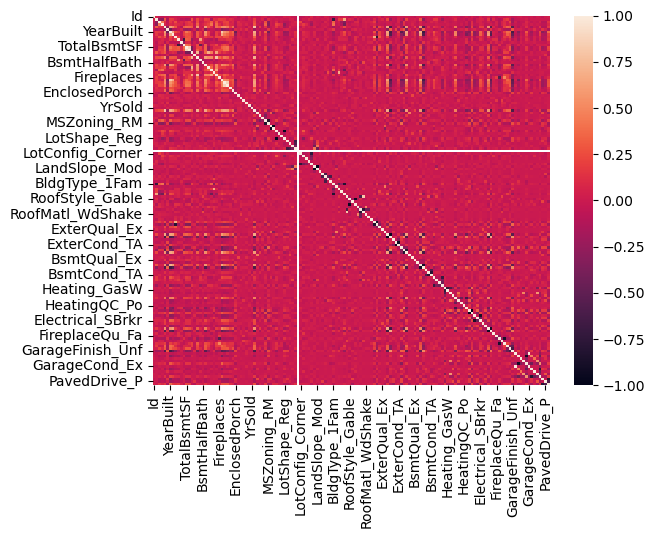

In [32]:
sns.heatmap(df_limpio_V2.corr(numeric_only=True))

In [33]:
corr = df_limpio_V2.corr()['SalePrice'].sort_values(ascending=False)
print("Correlaciones después de la conversión a numérico:")
print(corr)

Correlaciones después de la conversión a numérico:
SalePrice           1.000000
OverallQual         0.797365
GrLivArea           0.705481
YearBuilt           0.686693
ExterQual_Gd        0.671274
                      ...   
KitchenQual_TA     -0.563054
BsmtQual_TA        -0.605941
GarageFinish_Unf   -0.608105
ExterQual_TA       -0.652533
Utilities_AllPub         NaN
Name: SalePrice, Length: 146, dtype: float64


C:\Users\brend\AppData\Local\Temp\ipykernel_1088\2516155872.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_limpio_V2.corr()['SalePrice'].sort_values(ascending=False)


In [34]:
# Calcular la matriz de correlación
corr_matrix = df_limpio_V2.corr()

# Obtener las correlaciones con respecto a "SalePrice" y ordenarlas en orden descendente
corr = corr_matrix['SalePrice'].sort_values(ascending=False)

# Mostrar numéricamente las 10 variables más correlacionadas con "SalePrice"
top_corr = corr[1:11]  # Excluimos "SalePrice" de la lista
print(top_corr)

OverallQual         0.797365
GrLivArea           0.705481
YearBuilt           0.686693
ExterQual_Gd        0.671274
FullBath            0.641272
GarageCars          0.637506
YearRemodAdd        0.600937
GarageArea          0.595094
Foundation_PConc    0.594054
GarageYrBlt         0.581372
Name: SalePrice, dtype: float64


C:\Users\brend\AppData\Local\Temp\ipykernel_1088\1745089805.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_limpio_V2.corr()


<i>Una vez que mostramos las correlaciones más fuertes, vemos que cambiaron con respecto a las que se mostraron más fuertes, cuando solo comparamos las numéricas, se puede decir que "ExterQual_Gd" y "Foundation_PConc" que por la abreviación que tiene no logro descifrar a que sígnica influyen más en el precio que "TotalBsmtSF " y "TotRmsAbvGrd"</i>

### Paso 4: Conversión de las demás columnas objeto a numérico. Para ello se va a requerir un encoder más avanzado, usar la clase "MultiColumnLabelEncoder" vista en clase, el dataframe resultante va a ser la versión consolidada y completamente numérica.

In [35]:
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, x, y=None):
        return self

    def transform(self, x):
        output = x.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, x, y=None):
        return self.fit(x, y).transform(x)


# Obtener columnas categóricas (de tipo 'object')
columnas_categoricas = df_limpio_V2.select_dtypes(include='object').columns

# Crear una copia del DataFrame
df_limpio_V3 = df_limpio_V2.copy()

# Aplicar Label Encoding solo a las columnas que son categóricas
encoder = LabelEncoder()
df_limpio_V3[columnas_categoricas] = df_limpio_V3[columnas_categoricas].apply(encoder.fit_transform)

# Eliminar las columnas originales que fueron transformadas
df_limpio_V3.drop(columns=columnas_categoricas, inplace=True)


### Paso 5: Mostrar la información del nuevo dataframe (numérico), mostrar que no contenga nulos, que todos los datos sean de tipo int/float/uint. Mostrar de nuevo las correlaciones, filtrar para que solo muestre las 10 más correlacionadas a la variable objetivo.

In [36]:
print(df_limpio_V3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845 entries, 0 to 1458
Columns: 146 entries, Id to PavedDrive_Y
dtypes: float64(3), int64(35), uint8(108)
memory usage: 346.6 KB
None


<i>Podemos observar la diferencia de como trabaja el Label encoder a comparación del one-hot encoder, ya que este no agrego más columnas, permaneció con el mismo número porque categorizo en una sola columna. Ocupando el lugar de las columnas "object", es por esta razón que el número de columnas no aumento.</i>

In [37]:
df_limpio_V3.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,1,0,0,0,0,1,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,1,0,0,0,0,1,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,1,0,0,0,0,1,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,1,0,0,0,0,1,0,0,1
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,0,1,0,0,0,0,1,0,0,1


In [38]:
df_limpio_V3.tail()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
1450,1451,90,60.0,9000,5,5,1974,1974,0.0,0,...,0,1,0,0,0,0,1,0,0,1
1451,1452,20,78.0,9262,8,5,2008,2009,194.0,0,...,0,1,0,0,0,0,1,0,0,1
1454,1455,20,62.0,7500,7,5,2004,2005,0.0,410,...,0,1,0,0,0,0,1,0,0,1
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,1,0,0,0,0,1,0,0,1
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,1,0,0,0,0,1,0,0,1


In [39]:
df_limpio_V3.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
                  ...   
GarageCond_Po      uint8
GarageCond_TA      uint8
PavedDrive_N       uint8
PavedDrive_P       uint8
PavedDrive_Y       uint8
Length: 146, dtype: object

In [40]:
print(df_limpio_V3.isnull().sum())

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
                ..
GarageCond_Po    0
GarageCond_TA    0
PavedDrive_N     0
PavedDrive_P     0
PavedDrive_Y     0
Length: 146, dtype: int64


In [41]:
# Calcular la matriz de correlación
corr_matrix = df_limpio_V3.corr()

# Obtener las correlaciones con respecto a "SalePrice" y ordenarlas en orden descendente
corr = corr_matrix['SalePrice'].sort_values(ascending=False)

# Mostrar numéricamente las 10 variables más correlacionadas con "SalePrice"
top_corr = corr[1:11]  # Excluimos "SalePrice" de la lista
print(top_corr)

OverallQual         0.797365
GrLivArea           0.705481
YearBuilt           0.686693
ExterQual_Gd        0.671274
FullBath            0.641272
GarageCars          0.637506
YearRemodAdd        0.600937
GarageArea          0.595094
Foundation_PConc    0.594054
GarageYrBlt         0.581372
Name: SalePrice, dtype: float64


<i>Al final del análisis conseguimos un data frame sin datos nulos, totalmente numérico y conservando las mismas correlaciones positivas, indicando que estos factores podrían ser útiles para predecir el precio de una casa/ vivienda.</i>

## Presentación del proyecto

### Paso 1: Crear un repositorio en GitHub.
### Paso 2: Subir el trabajo a ese repositorio y crear un archivo README.
### Paso 3: En el README, describir el trabajo, así como describir qué resulta de este proyecto.
### Paso 4: Volver público el repositorio, validar acceso desde fuera y guardar el enlace.
### Paso 5: Enviar el enlace y los demás archivos al profesor para su evaluación (a través de Teams).

## Conclusiones acerca del análisis exploratorio y del dataset en general.